# 1. Regression Methods

## 1.1 Processing stock price data in Python

### 1.1.1 Time-series initialisation

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import copy
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Text(0, 0.5, 'SPX Index')

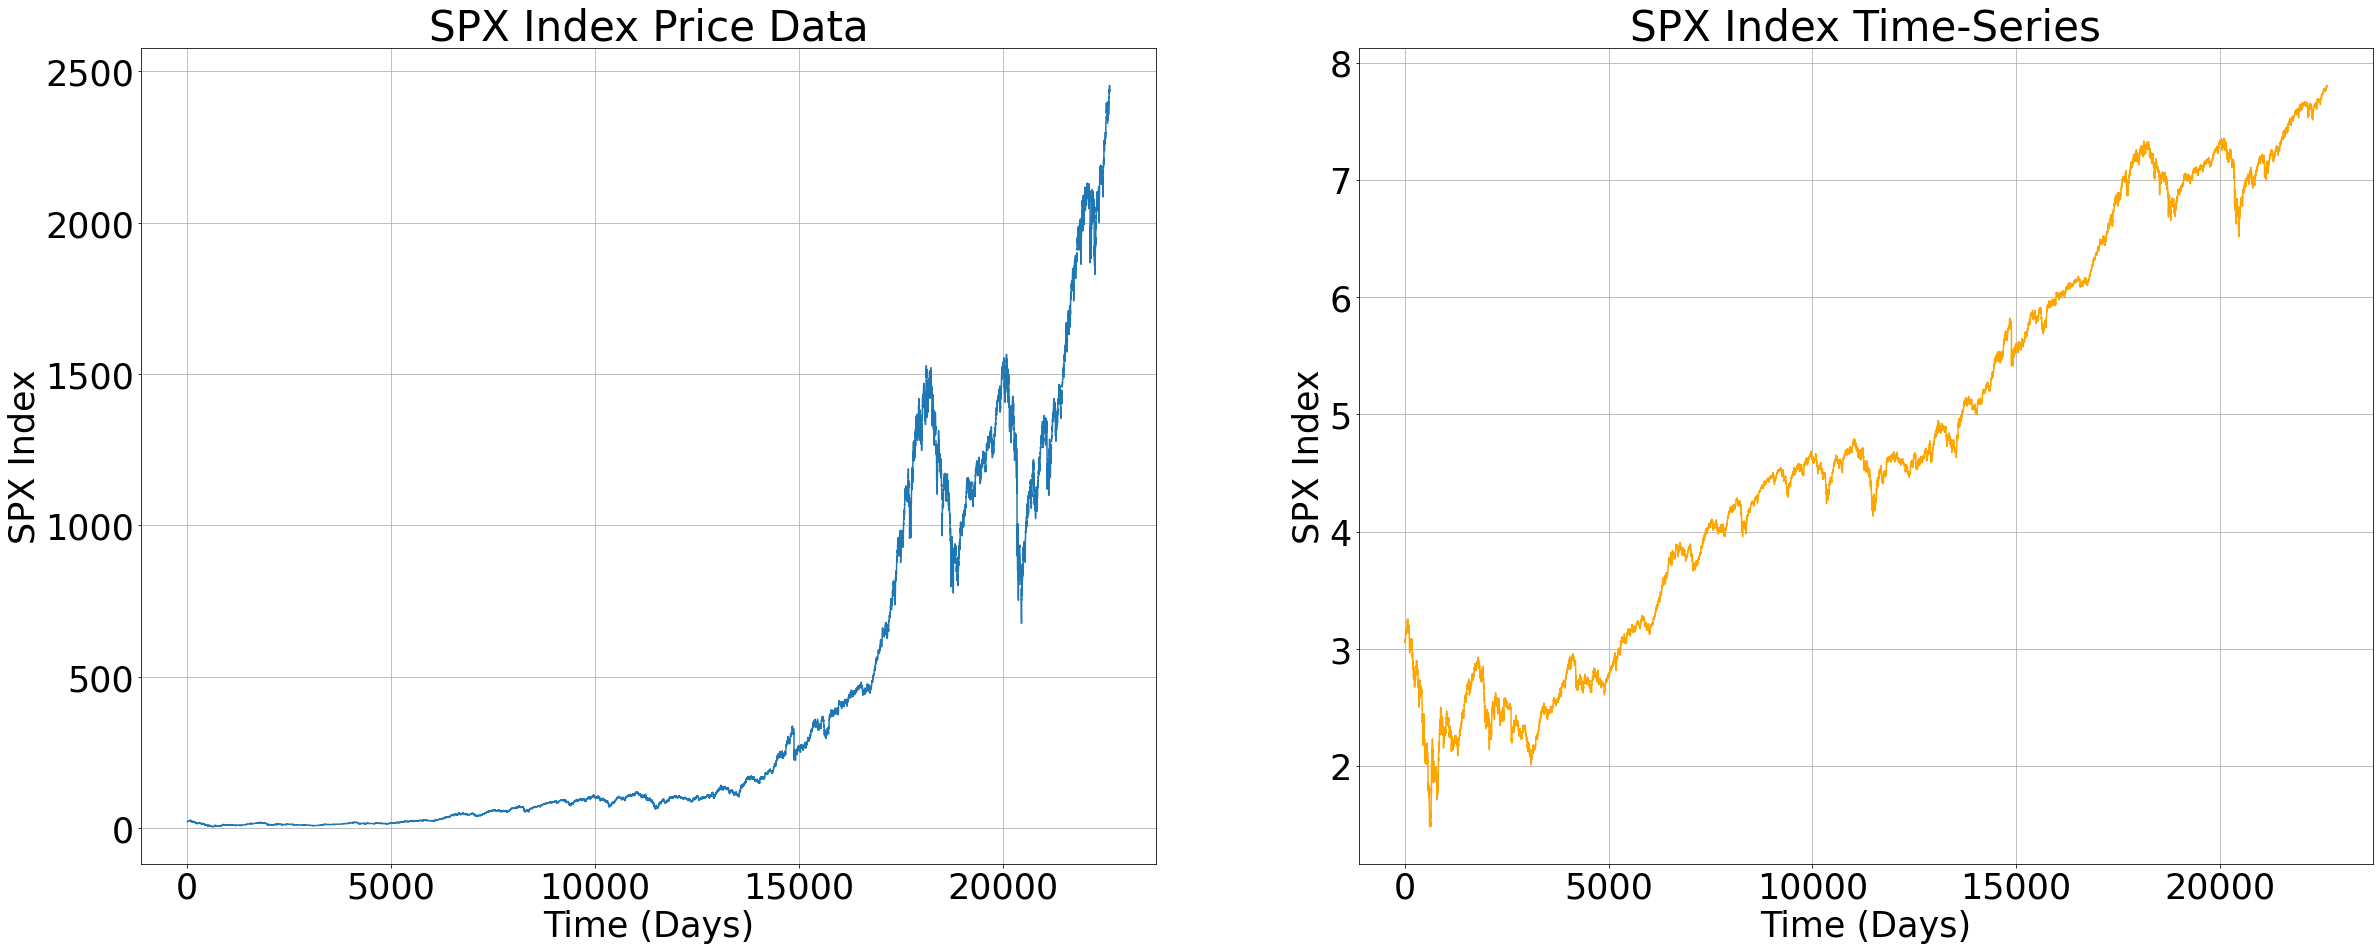

In [2]:
px = pd.read_csv("priceData.csv")
logpx = np.log(px['SPX Index'].interpolate())

fig = plt.gcf()
fig.set_size_inches(40, 15)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(1, 2, 1)
px["SPX Index"].plot(grid=True, title='SPX Index Price Data')
plt.xlabel('Time (Days)')
plt.ylabel('SPX Index')

plt.subplot(1, 2, 2)
logpx.plot(grid=True, title='SPX Index Time-Series', color='orange')
plt.xlabel('Time (Days)')
plt.ylabel('SPX Index')

### 1.1.2 Rolling statistics

Text(0, 0.5, 'SPX Index')

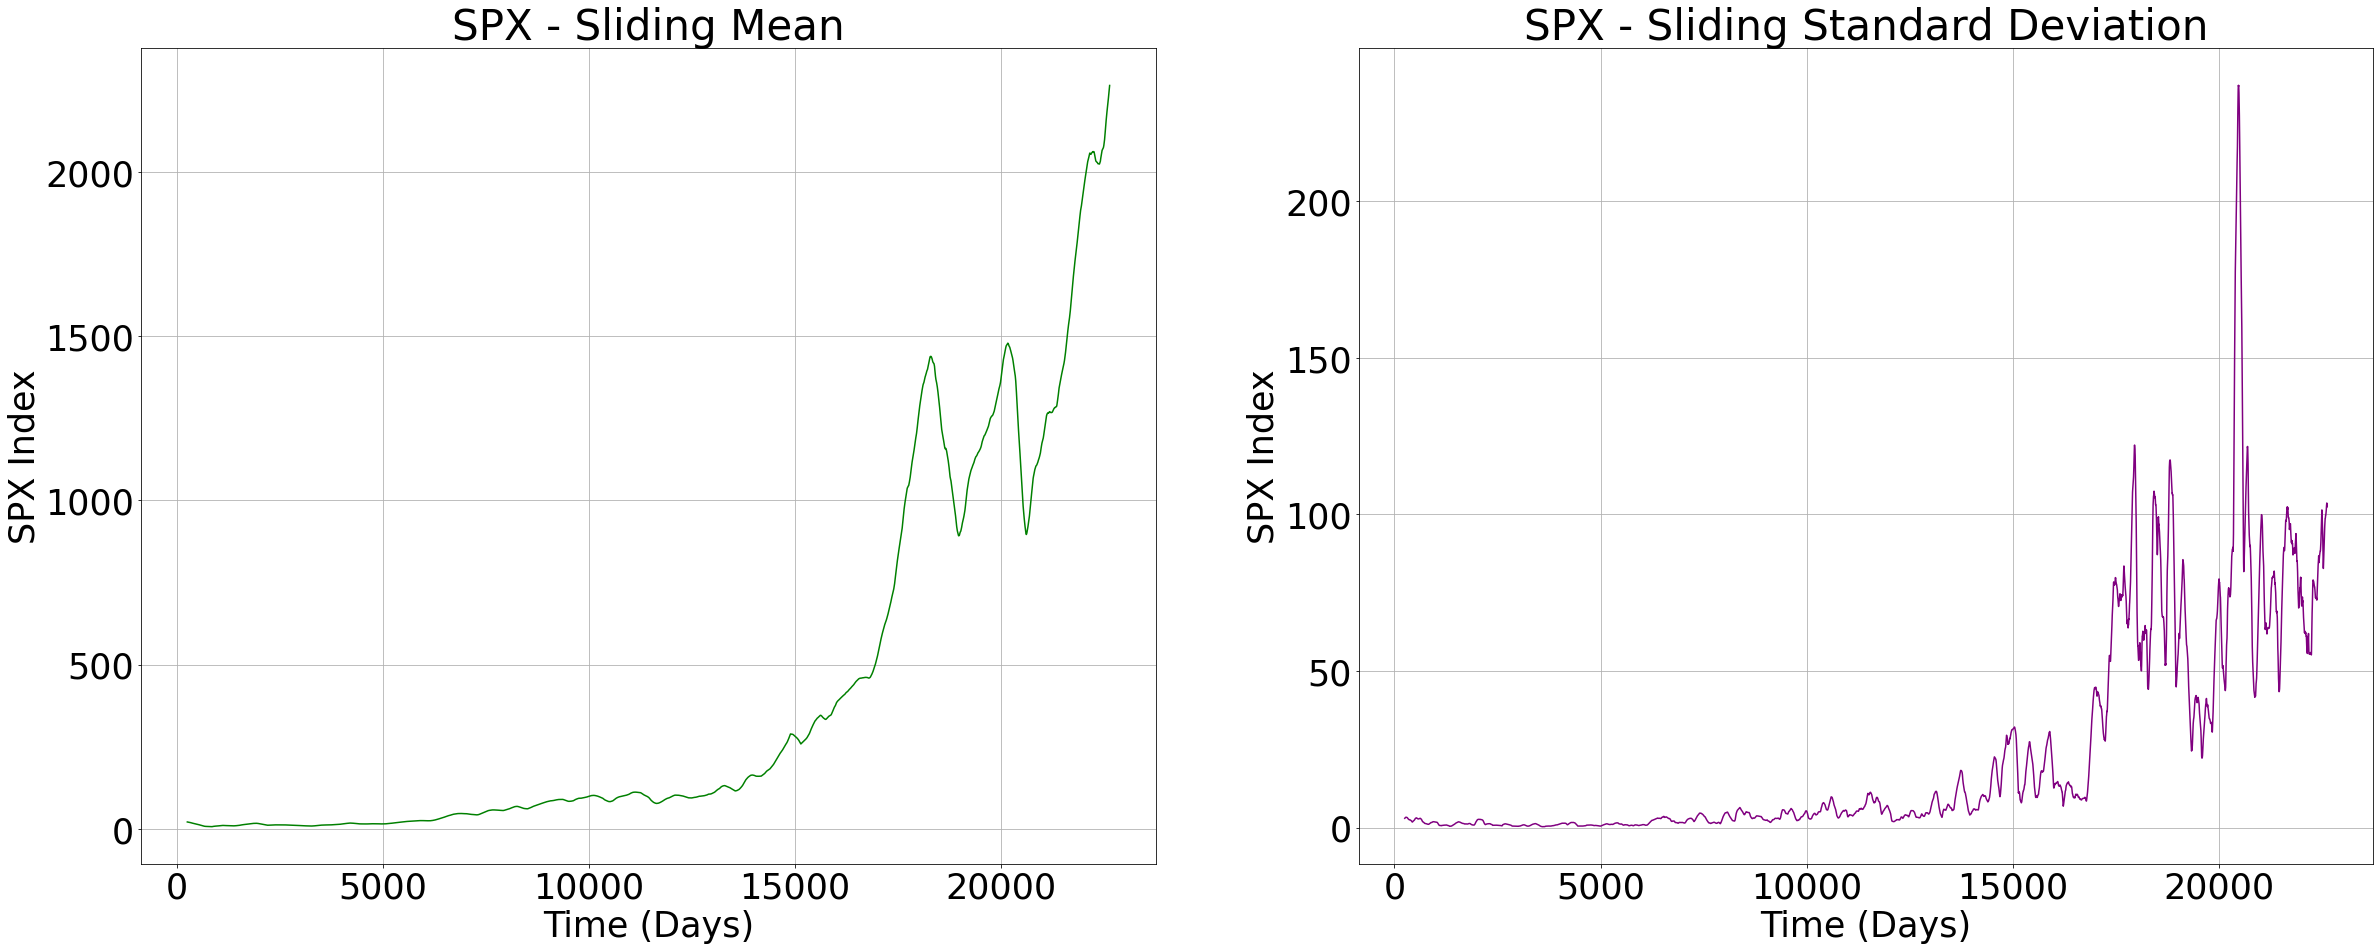

In [3]:
fig = plt.gcf()
fig.set_size_inches(40, 15)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(1, 2, 1)
px['SPX Index'].interpolate().rolling(252).mean().plot(grid=True, title='SPX - Sliding Mean', color='green')
plt.xlabel('Time (Days)')
plt.ylabel('SPX Index')

plt.subplot(1, 2, 2)
px['SPX Index'].interpolate().rolling(252).std().plot(grid=True, title='SPX - Sliding Standard Deviation', color='purple') 
plt.xlabel('Time (Days)')
plt.ylabel('SPX Index')

Text(0, 0.5, 'SPX Index')

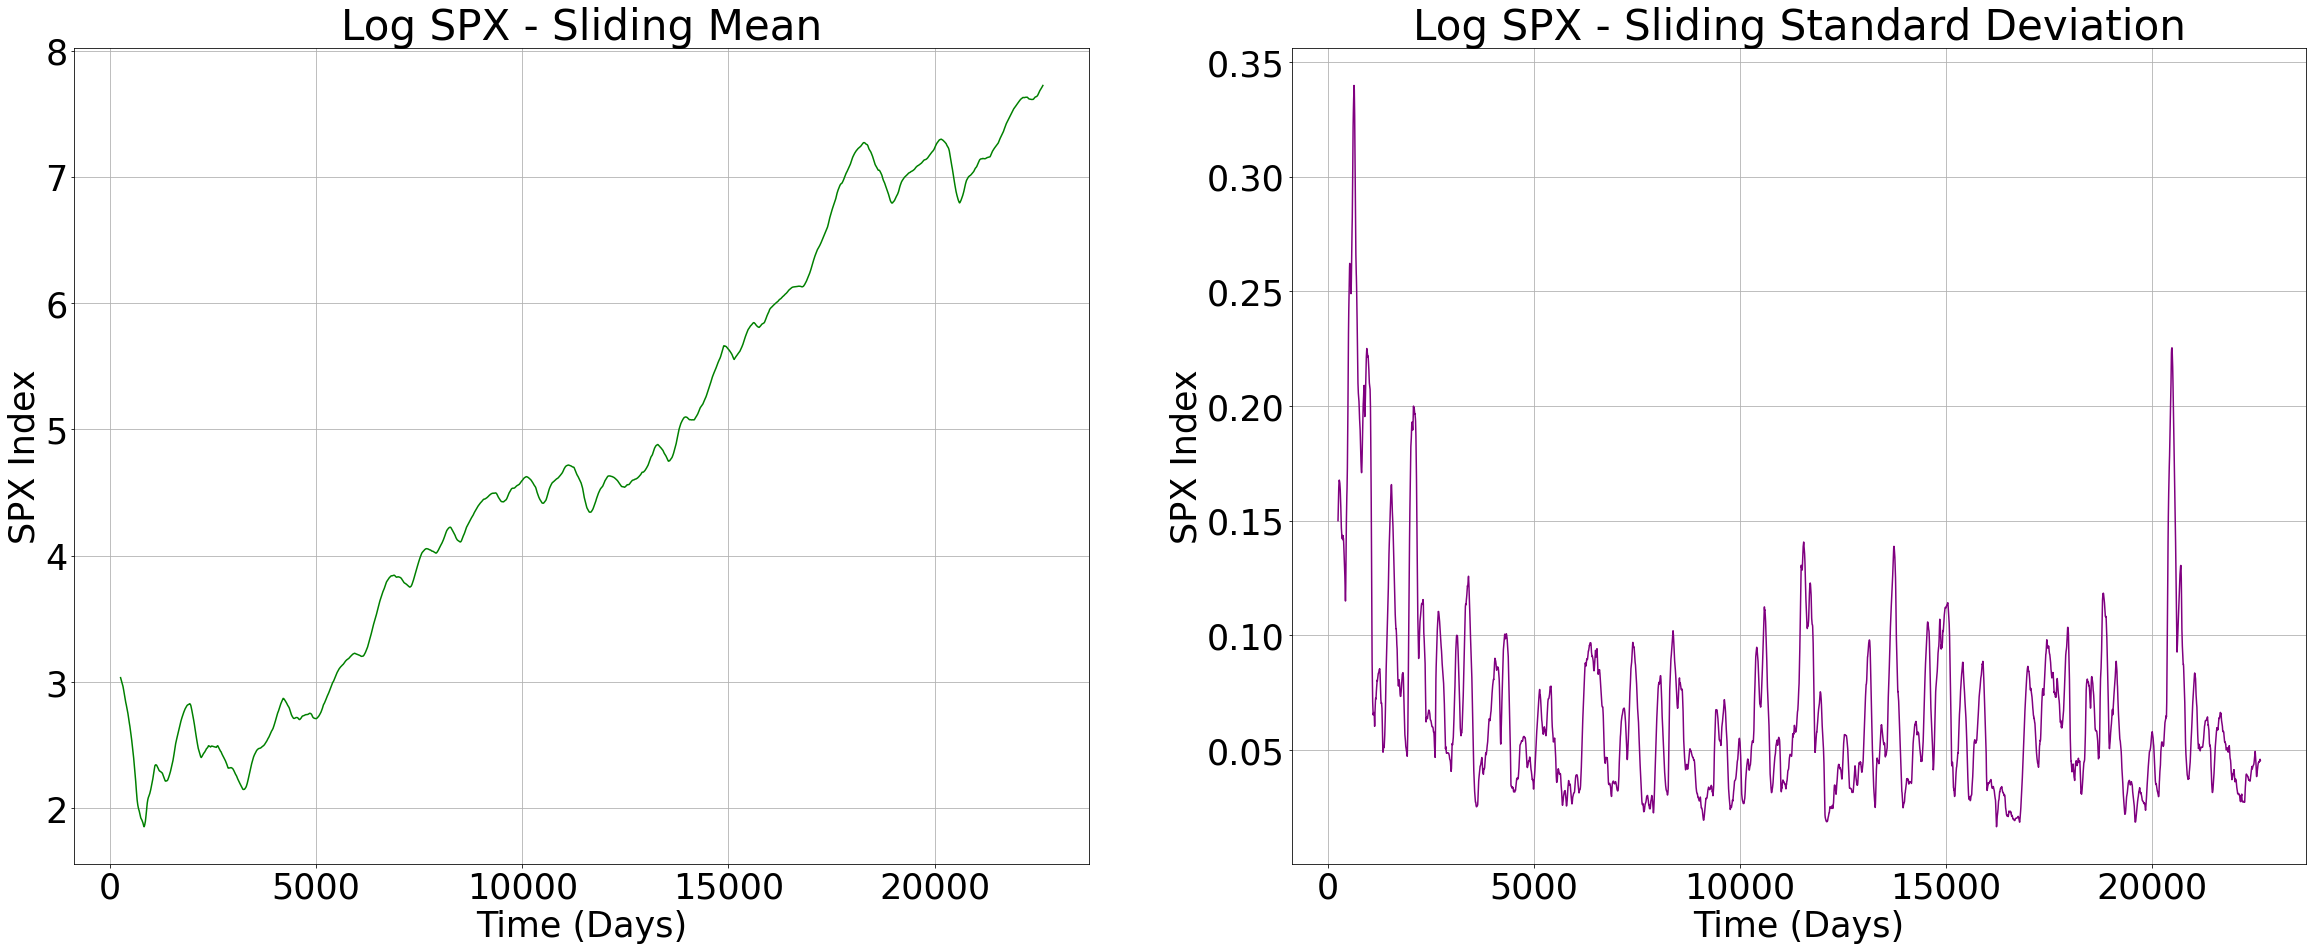

In [4]:
fig = plt.gcf()
fig.set_size_inches(40, 15)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(1, 2, 1)
logpx.rolling(252).mean().plot(grid=True, title='Log SPX - Sliding Mean', color='green')
plt.xlabel('Time (Days)')
plt.ylabel('SPX Index')

plt.subplot(1, 2, 2)
logpx.rolling(252).std().plot(grid=True, title='Log SPX - Sliding Standard Deviation', color='purple') 
plt.xlabel('Time (Days)')
plt.ylabel('SPX Index')

### 1.1.3 Simple and log returns

The Simple Return is defined as:

\begin{equation}
    R_t = \frac{p_t}{p_{t-1}} -1 
\end{equation}

where $p_t$ is the price of a certain asset at time instant $t$ and $R_t$ is the simple return at the same time instant $t$.
Similarly, the logarithmic return is defined as:

\begin{equation}
    r_t = \log(p_t) - \log(p_{t-1}) 
\end{equation}

where $p_t$ is the price of a certain asset at time instant $t$ and $r_t$ is the log-return at the same time instant $t$.


Text(0, 0.5, 'SPX Index')

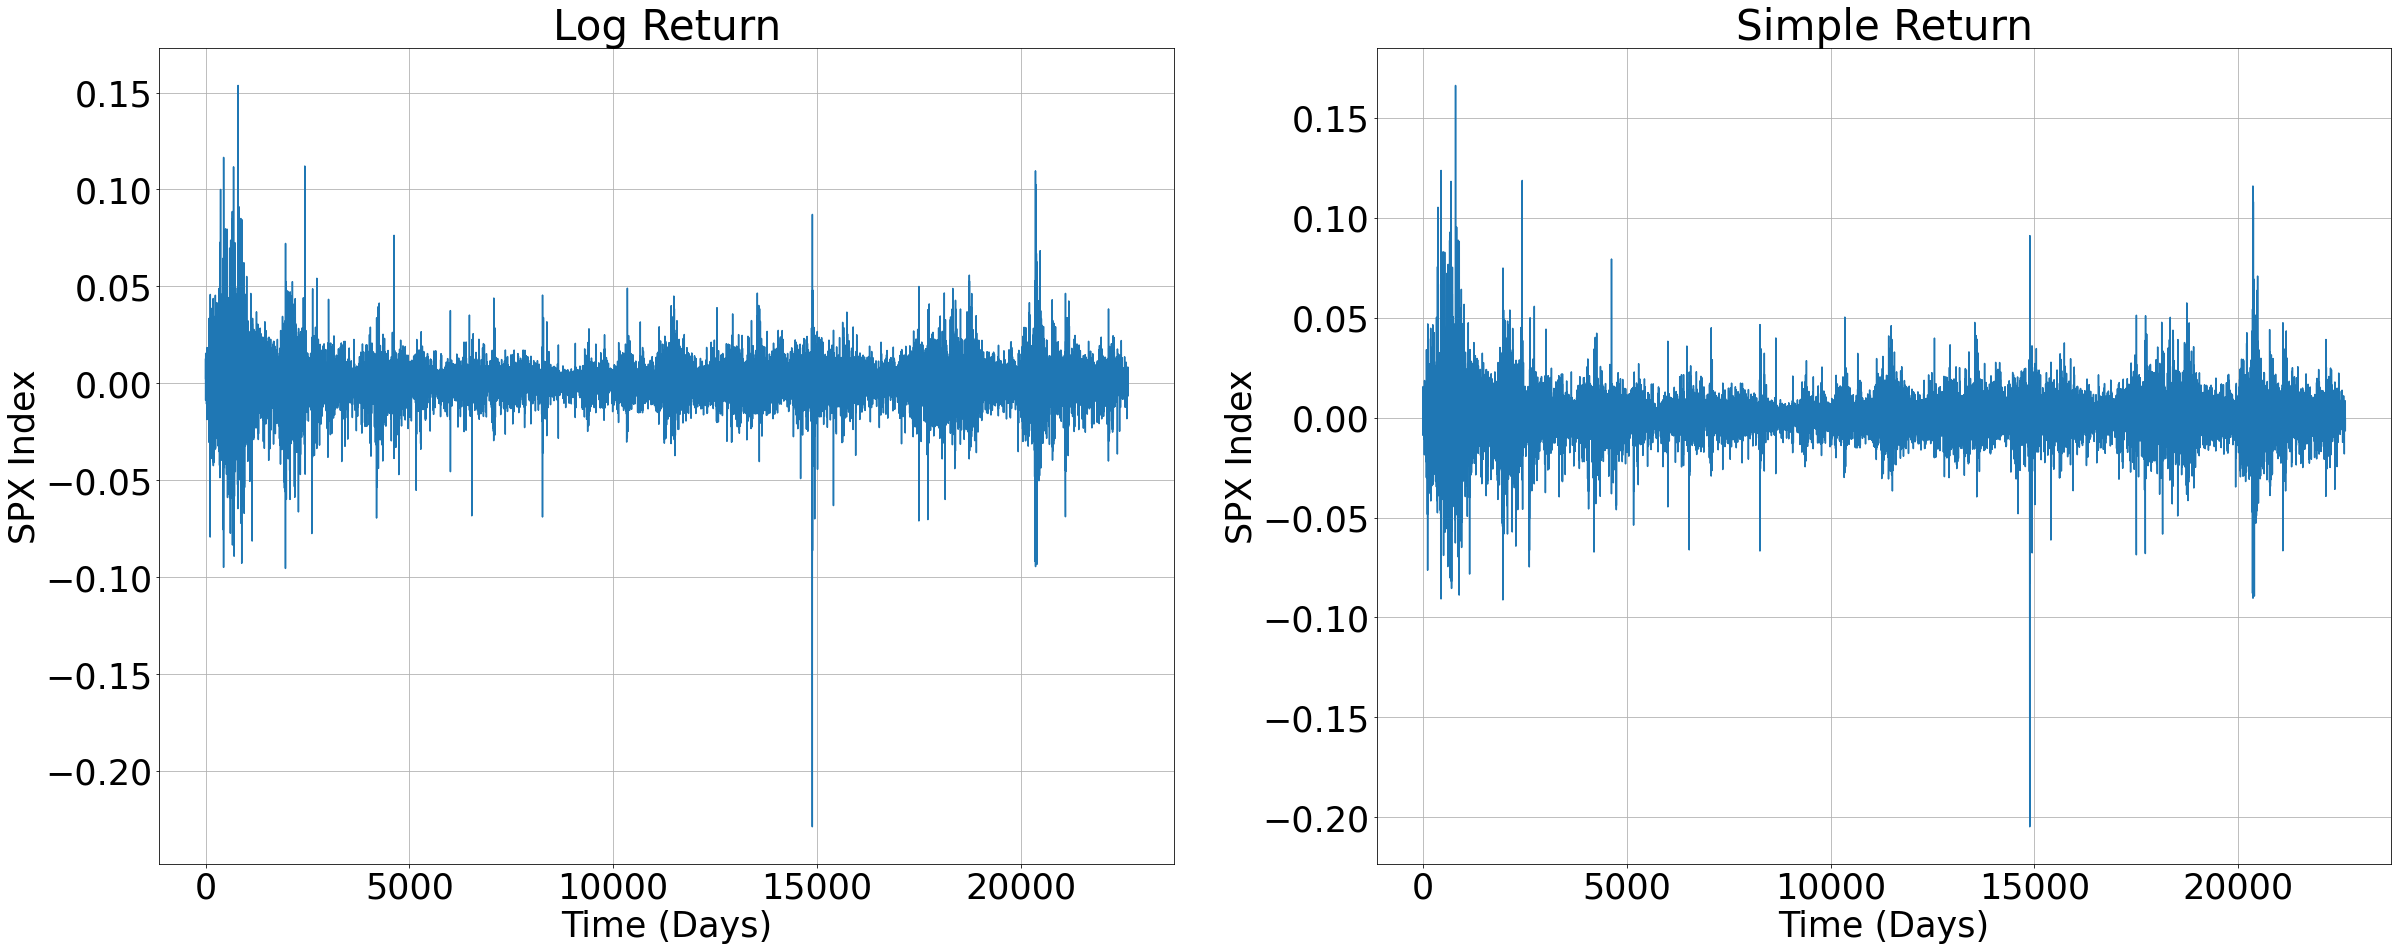

In [5]:
fig = plt.gcf()
fig.set_size_inches(40, 15)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(1, 2, 1)
logret = logpx.diff()
logret.plot(grid=True, title='Log Return')
plt.xlabel('Time (Days)')
plt.ylabel('SPX Index')

plt.subplot(1, 2, 2)
simpret = px['SPX Index'].pct_change()
simpret.plot(grid=True, title='Simple Return')
plt.xlabel('Time (Days)')
plt.ylabel('SPX Index')

Text(0, 0.5, 'SPX Index')

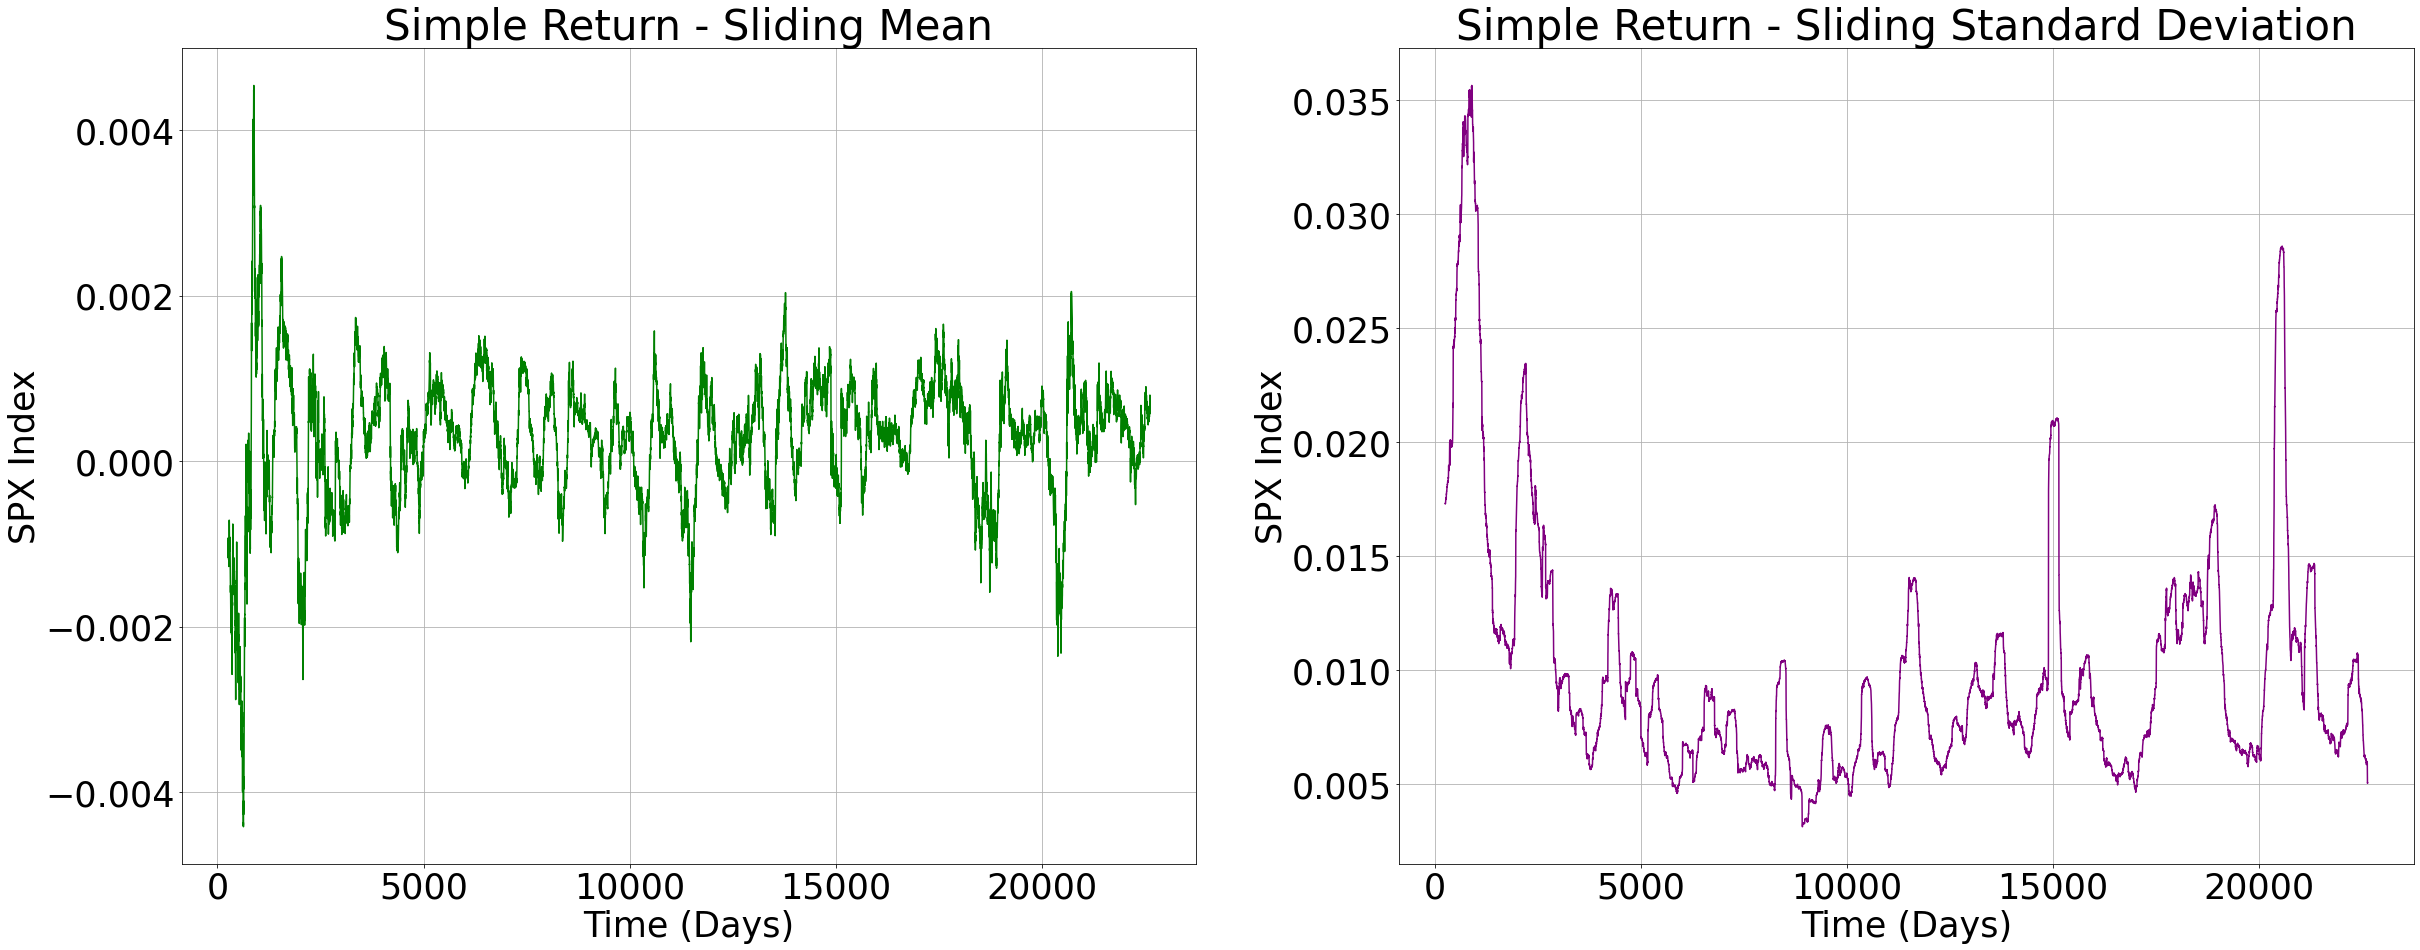

In [6]:
fig = plt.gcf()
fig.set_size_inches(40, 15)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(1, 2, 1)
simpret.rolling(252).mean().plot(grid=True, title='Simple Return - Sliding Mean', color='green')
plt.xlabel('Time (Days)')
plt.ylabel('SPX Index')

plt.subplot(1, 2, 2)
simpret.rolling(252).std().plot(grid=True, title='Simple Return - Sliding Standard Deviation', color='purple') 
plt.xlabel('Time (Days)')
plt.ylabel('SPX Index')

Text(0.5, 0, 'Time (Days)')

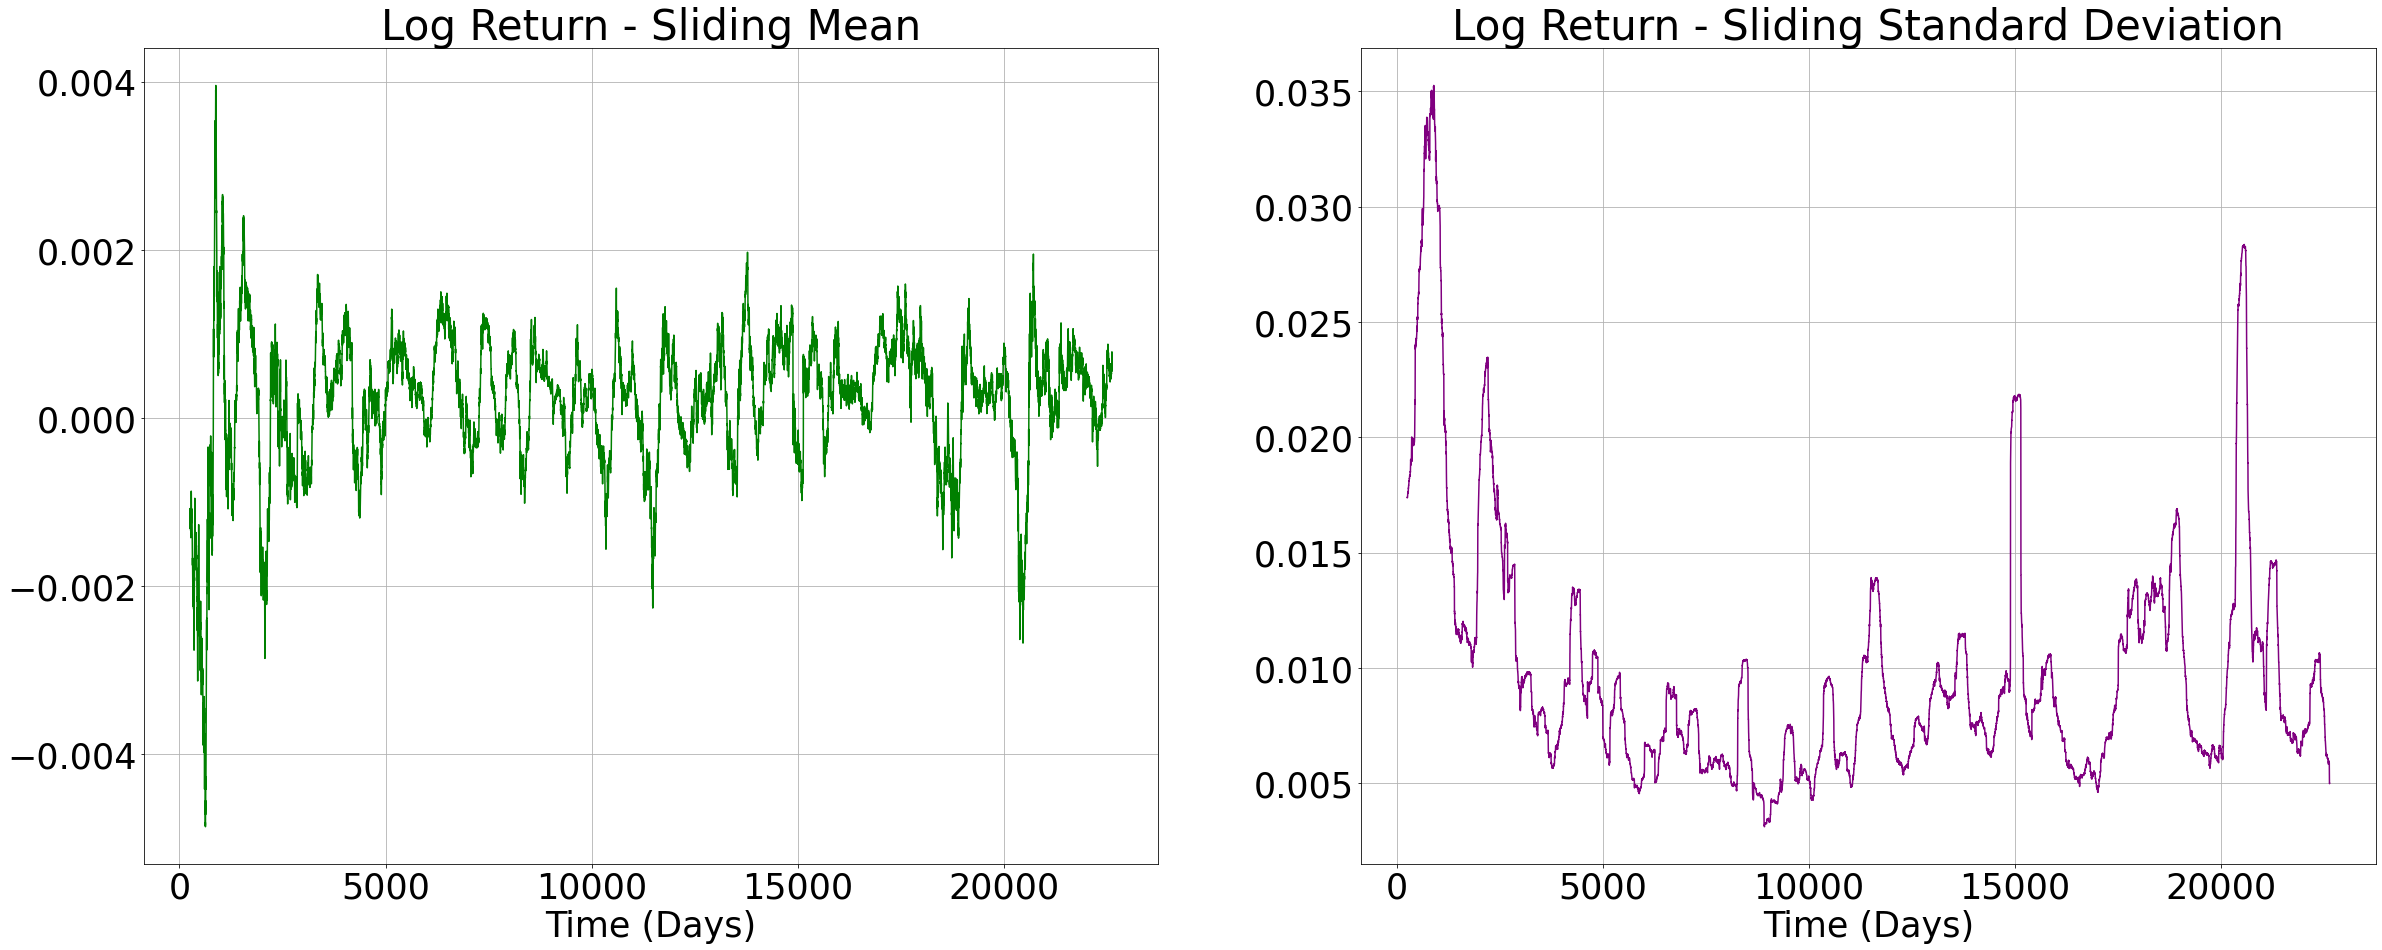

In [7]:
fig = plt.gcf()
fig.set_size_inches(40, 15)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(1, 2, 1)
logret.rolling(252).mean().plot(grid=True, title='Log Return - Sliding Mean', color='green')
plt.xlabel('Time (Days)')

plt.subplot(1, 2, 2)
logret.rolling(252).std().plot(grid=True, title='Log Return - Sliding Standard Deviation', color='purple') 
plt.xlabel('Time (Days)')

### 1.1.4 Advantages of log-returns and JB test

In [8]:
from scipy import stats

logret = logret.dropna()
simpret = simpret.dropna()

print('Log Returns: ' + str(stats.jarque_bera(logret)))
print('Simple Returns: ' + str(stats.jarque_bera(simpret)))

Log Returns: Jarque_beraResult(statistic=356376.98207198456, pvalue=0.0)
Simple Returns: Jarque_beraResult(statistic=284160.67730312835, pvalue=0.0)


### 1.1.5 Stock purchase example

*See report.*

### 1.1.6 Advantages of simple returns

*See report.*

## 1.2 ARMA vs. ARIMA Models for Financial Applications

### 1.2.1 Plotting S&P 500

Text(0, 0.5, 'S&P 500 Index')

<Figure size 2880x1080 with 0 Axes>

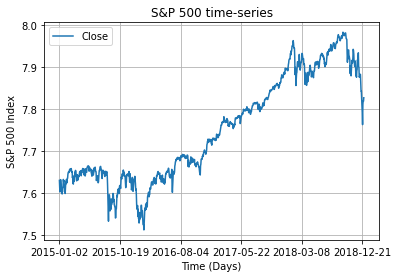

In [9]:
snp = pd.read_csv('snp_500_2015_2019.csv') 
snp.set_index(['Date'], inplace=True)
snp_close = snp['Close'].to_frame().apply(np.log)

fig = plt.gcf()
fig.set_size_inches(40, 15)
matplotlib.rcParams.update({'font.size': 10})

snp_close.plot(grid=True, title='S&P 500 time-series')
plt.xlabel('Time (Days)')
plt.ylabel('S&P 500 Index')

### 1.2.2 ARMA (1, 0) modelling

In [10]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.api import VAR

In [11]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
model = ARIMA(snp_arma, order=(1,0,0))
snp_arma['Res'] = model.fit().resid 
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']
print(model.fit().params)

const         7.739997
ar.L1.True    0.997359
dtype: float64


/Users/georgeimperial/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


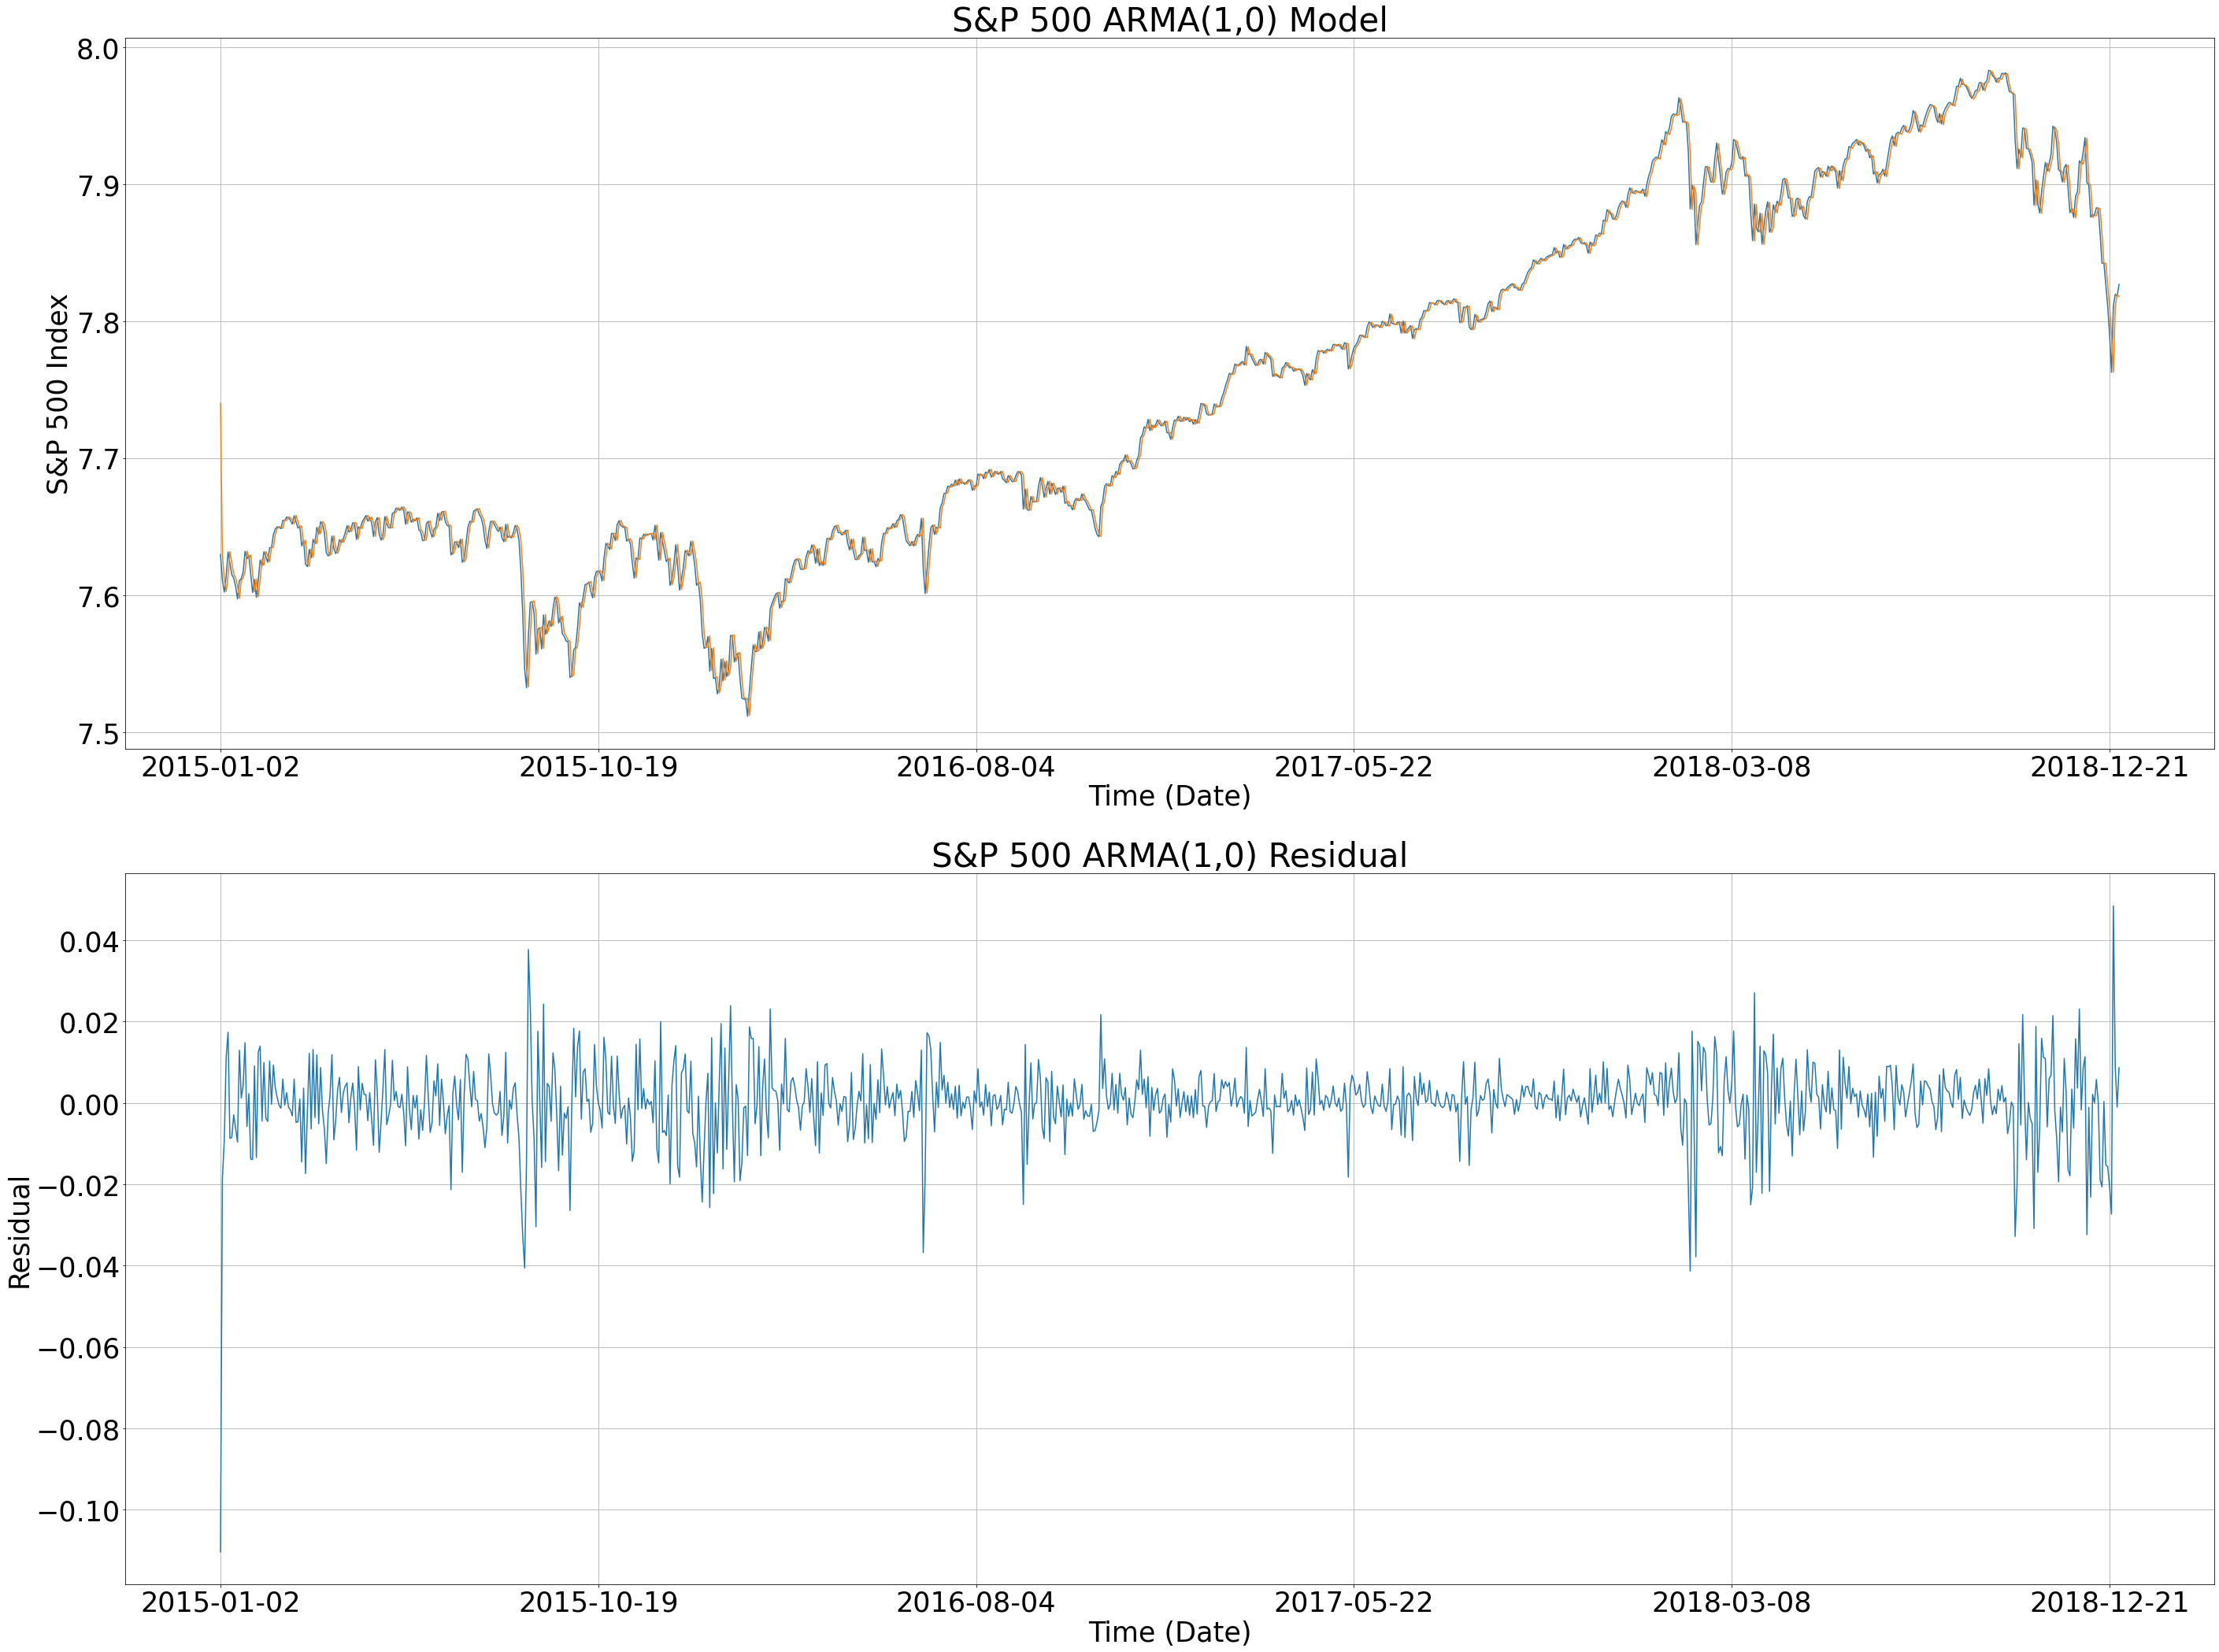

In [12]:
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(2, 1, 1)
snp_arma['True'].plot(grid=True, title='S&P 500 ARMA(1,0) Model')
snp_arma['Prediction'].plot(grid=True, title='S&P 500 ARMA(1,0) Model')
plt.xlabel('Time (Date)')
plt.ylabel('S&P 500 Index')

plt.subplot(2, 1, 2)
snp_arma['Res'].plot(grid=True, title='S&P 500 ARMA(1,0) Residual')
plt.xlabel('Time (Date)')
plt.ylabel('Residual')

plt.tight_layout()

### 1.2.3 ARIMA (1, 1, 0) modelling

In [13]:
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ['True']
model = ARIMA(snp_arima, order=(1,1,0))
snp_arima['Res'] = model.fit().resid 
snp_arima['Prediction'] = snp_arima['True'] - snp_arima['Res']
print(model.fit().params)

const           0.000196
ar.L1.D.True   -0.008752
dtype: float64


/Users/georgeimperial/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/georgeimperial/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


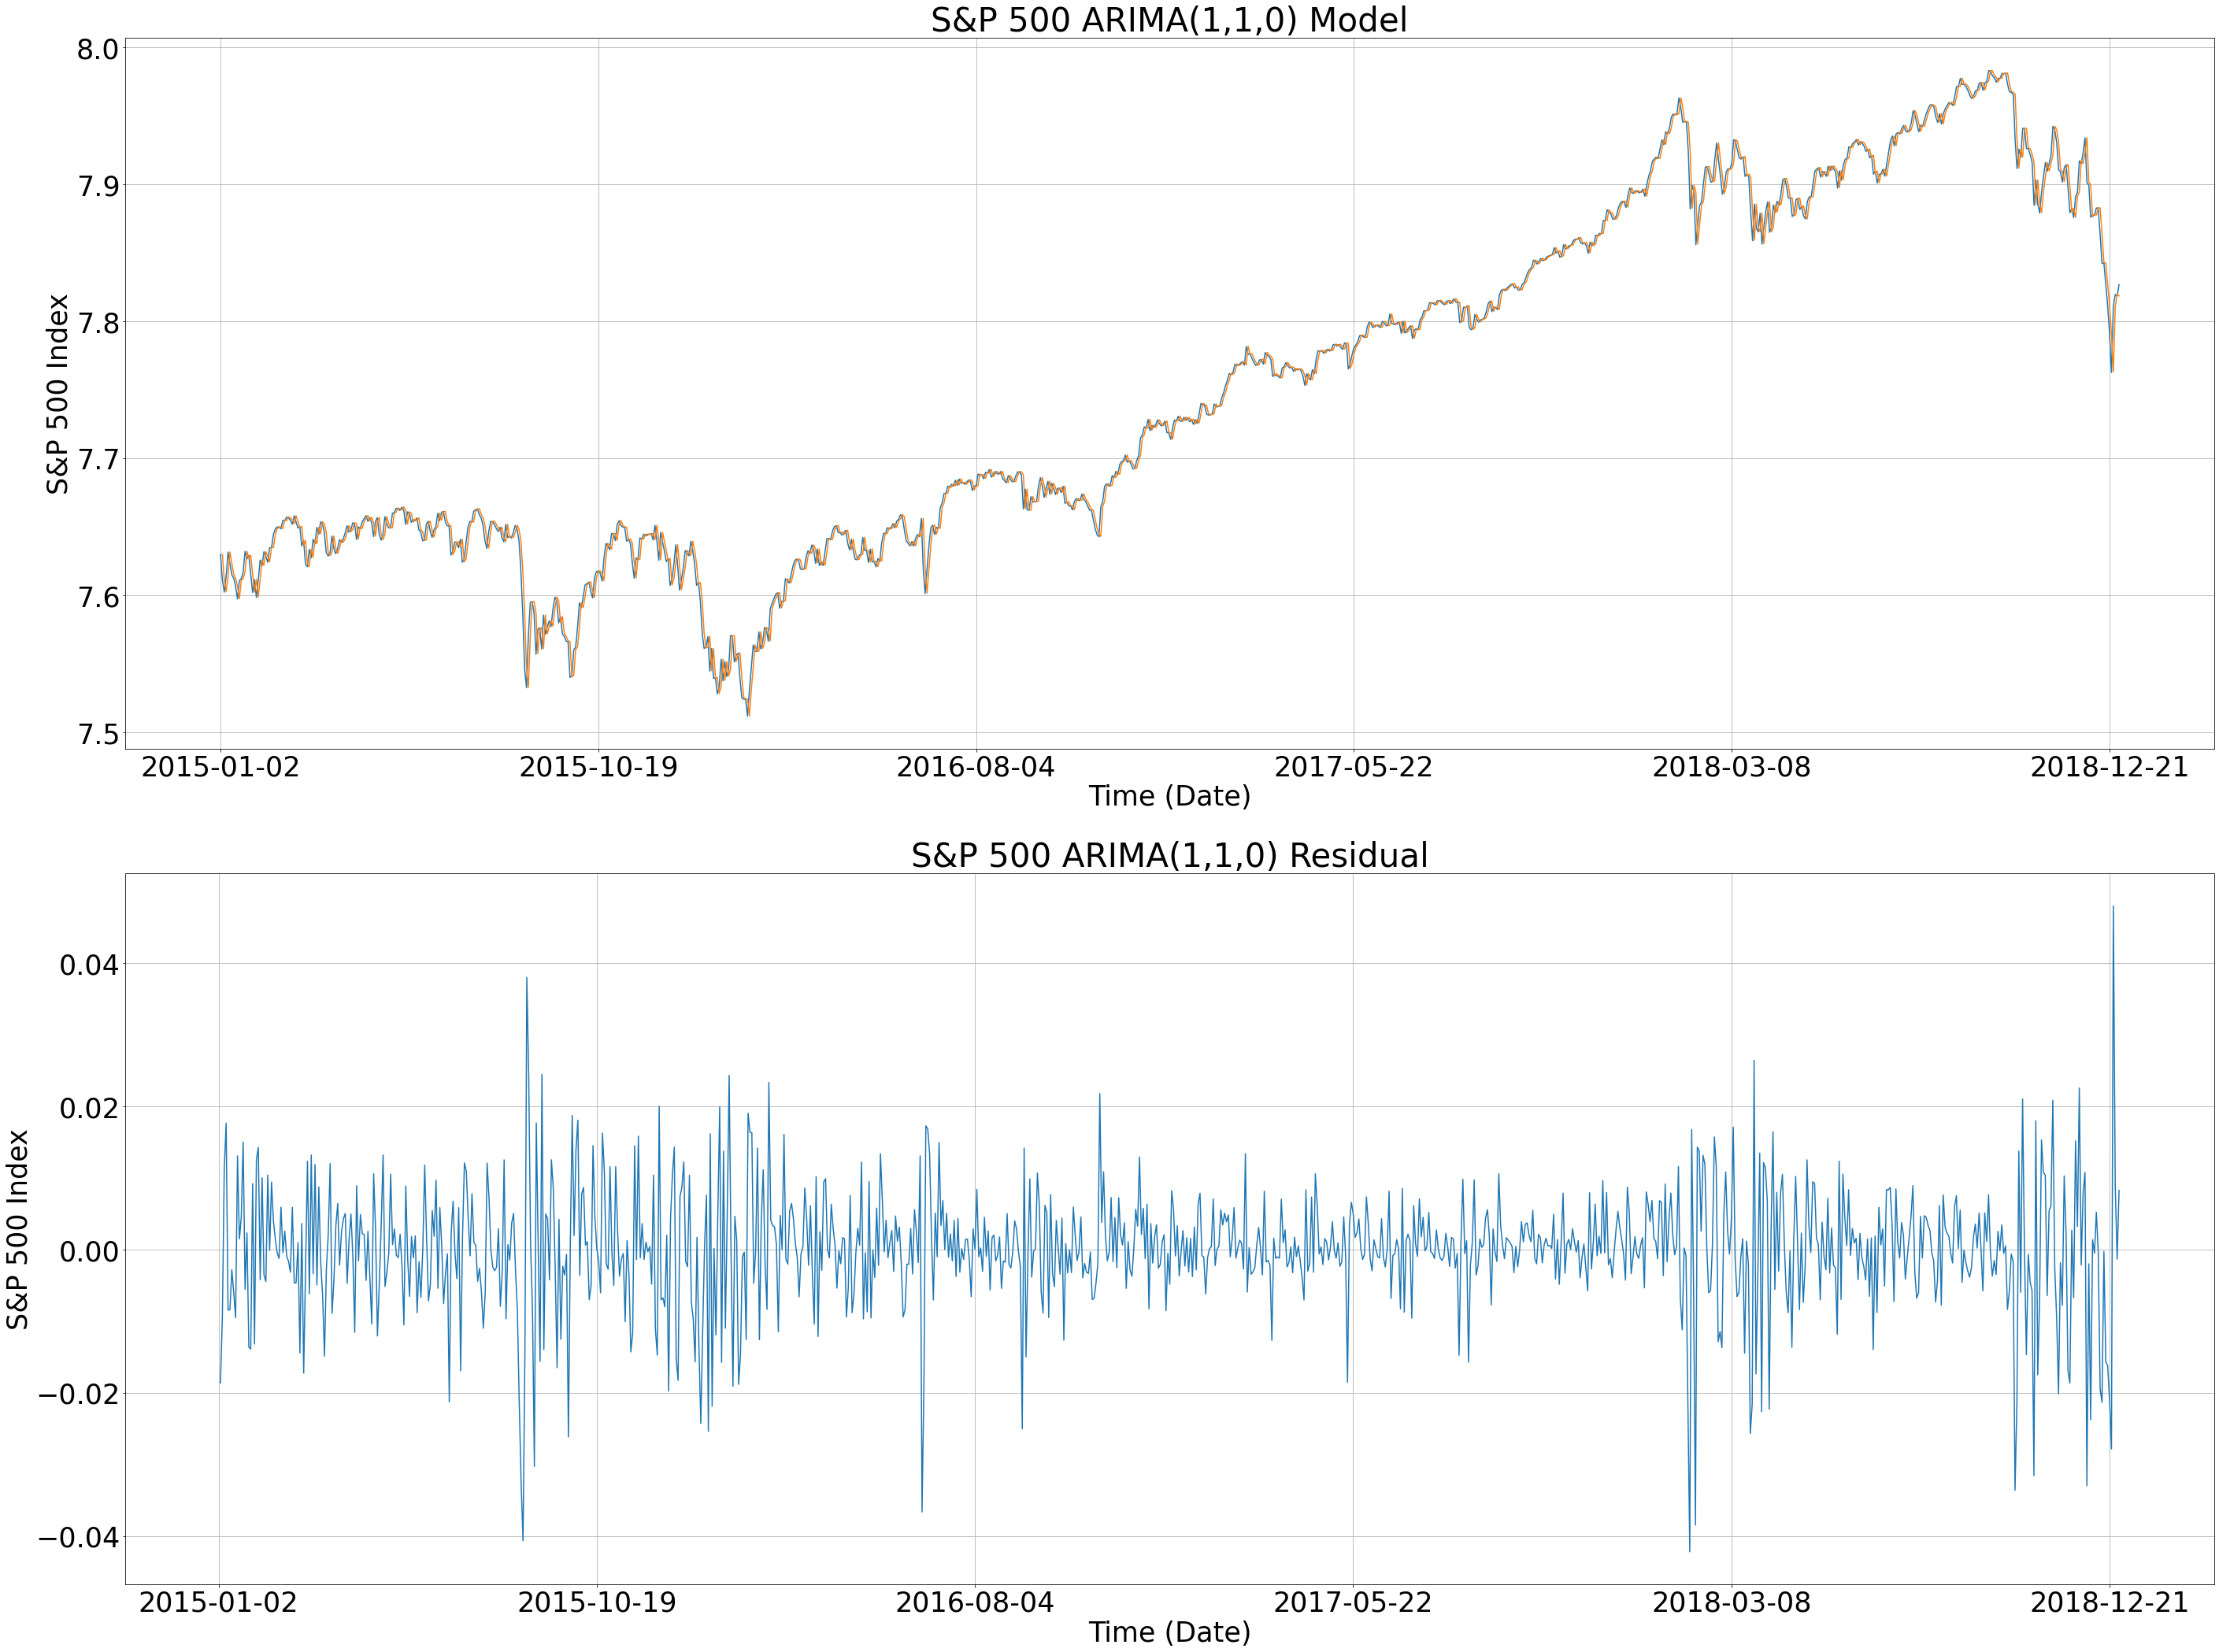

In [14]:
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(2, 1, 1)
snp_arima['True'].plot(grid=True, title='S&P 500 ARIMA(1,1,0) Model')
snp_arima['Prediction'].plot(grid=True, title='S&P 500 ARIMA(1,1,0) Model')
plt.xlabel('Time (Date)')
plt.ylabel('S&P 500 Index')

plt.subplot(2, 1, 2)
snp_arima['Res'].plot(grid=True, title='S&P 500 ARIMA(1,1,0) Residual')
plt.xlabel('Time (Date)')
plt.ylabel('S&P 500 Index')

plt.tight_layout()

### 1.2.4 ARIMA and log-prices

*See report.*

## 1.3 Vector Autoregressive (VAR) Models

### 1.3.1 Concise matrix form

*See report.*

### 1.3.2 Optimal coefficients

*See report.*

### 1.3.3 VAR(1) eigenvalues

*See report.*

### 1.3.4  Detrended stocks

In [15]:
df = pd.read_csv(r'snp_allstocks_2015_2019.csv') 
df = df.set_index('Date')
info = pd.read_csv(r'snp_info.csv') 
info.drop(columns=info.columns[0], inplace=True)

<Figure size 2880x2160 with 0 Axes>

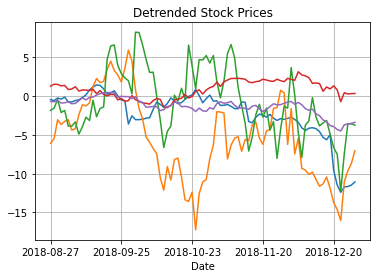

In [16]:
tickers = ['CAG', 'MAR', 'LIN', 'HCP', 'MAT'] 
stocks = df[tickers]
stocks_ma = stocks.rolling(window=66).mean() 
stocks_detrended = stocks.sub(stocks_ma).dropna()

fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size':10})

stocks_detrended.plot(legend = False, grid=True, title='Detrended Stock Prices')

In [17]:
model = VAR(stocks_detrended) 
results = model.fit(1)
A = results.params[1:].values
eigA,_ = np.linalg.eig(A)

print(eigA)

[0.71449288+0.12927613j 0.71449288-0.12927613j 1.00635964+0.j
 0.86051894+0.j         0.91144512+0.j        ]


/Users/georgeimperial/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


### 1.3.5 Sector-based portfolio analysis

In [18]:
eig = pd.DataFrame(columns = info['GICS Sector'].unique(), index = ['eigenvalue'])

for sector in info['GICS Sector'].unique():
    tickers = info.loc[info['GICS Sector']==sector]['Symbol'].tolist() 
    stocks = df[tickers]
    # new 
    stocks_ma = stocks.rolling(window=66).mean() 
    stocks_detrended = stocks.sub(stocks_ma).dropna()
    model = VAR(stocks_detrended) 
    results = model.fit(1)
    A = results.params[1:].values 
    eigA,_ = np.linalg.eig(A)
    eig[sector]['eigenvalue'] = abs(eigA).mean()
eig

/Users/georgeimperial/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/georgeimperial/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/georgeimperial/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/georgeimperial/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ba

Industrials Health Care Information Technology  \
eigenvalue    0.763932     0.62144               0.809351   

           Communication Services Consumer Discretionary Utilities Financials  \
eigenvalue               0.926293               0.810433  0.599877   0.631218   

           Materials Real Estate Consumer Staples    Energy  
eigenvalue  0.621833    0.919369         0.852121  0.930601

# 2 Bond Pricing

## 2.1 Examples of bond pricing

*See report.*

## 2.2 Forward Rates

*See report.*

## 2.3 Duration of a coupon-bearing bond

### 2.3.1 Duration

*See report.*

## 2.4 Capital Asset Pricing Model (CAPM) and Arbitrage Pricing Theory (APT)

In [19]:
from sklearn import linear_model
from scipy.stats import pearsonr, iqr
from sklearn.decomposition import PCA

### 2.4.1 Equally-weighted market return

In [20]:
df = pd.read_csv('fsp_case_31_BSD.csv', index_col = 0, header = [0 ,1]) 
ret = df['ret'].copy().dropna(1)
ret.index = pd.to_datetime(ret.index) 
ret = ret.sort_index() 
mark_ret = ret.mean(1) 

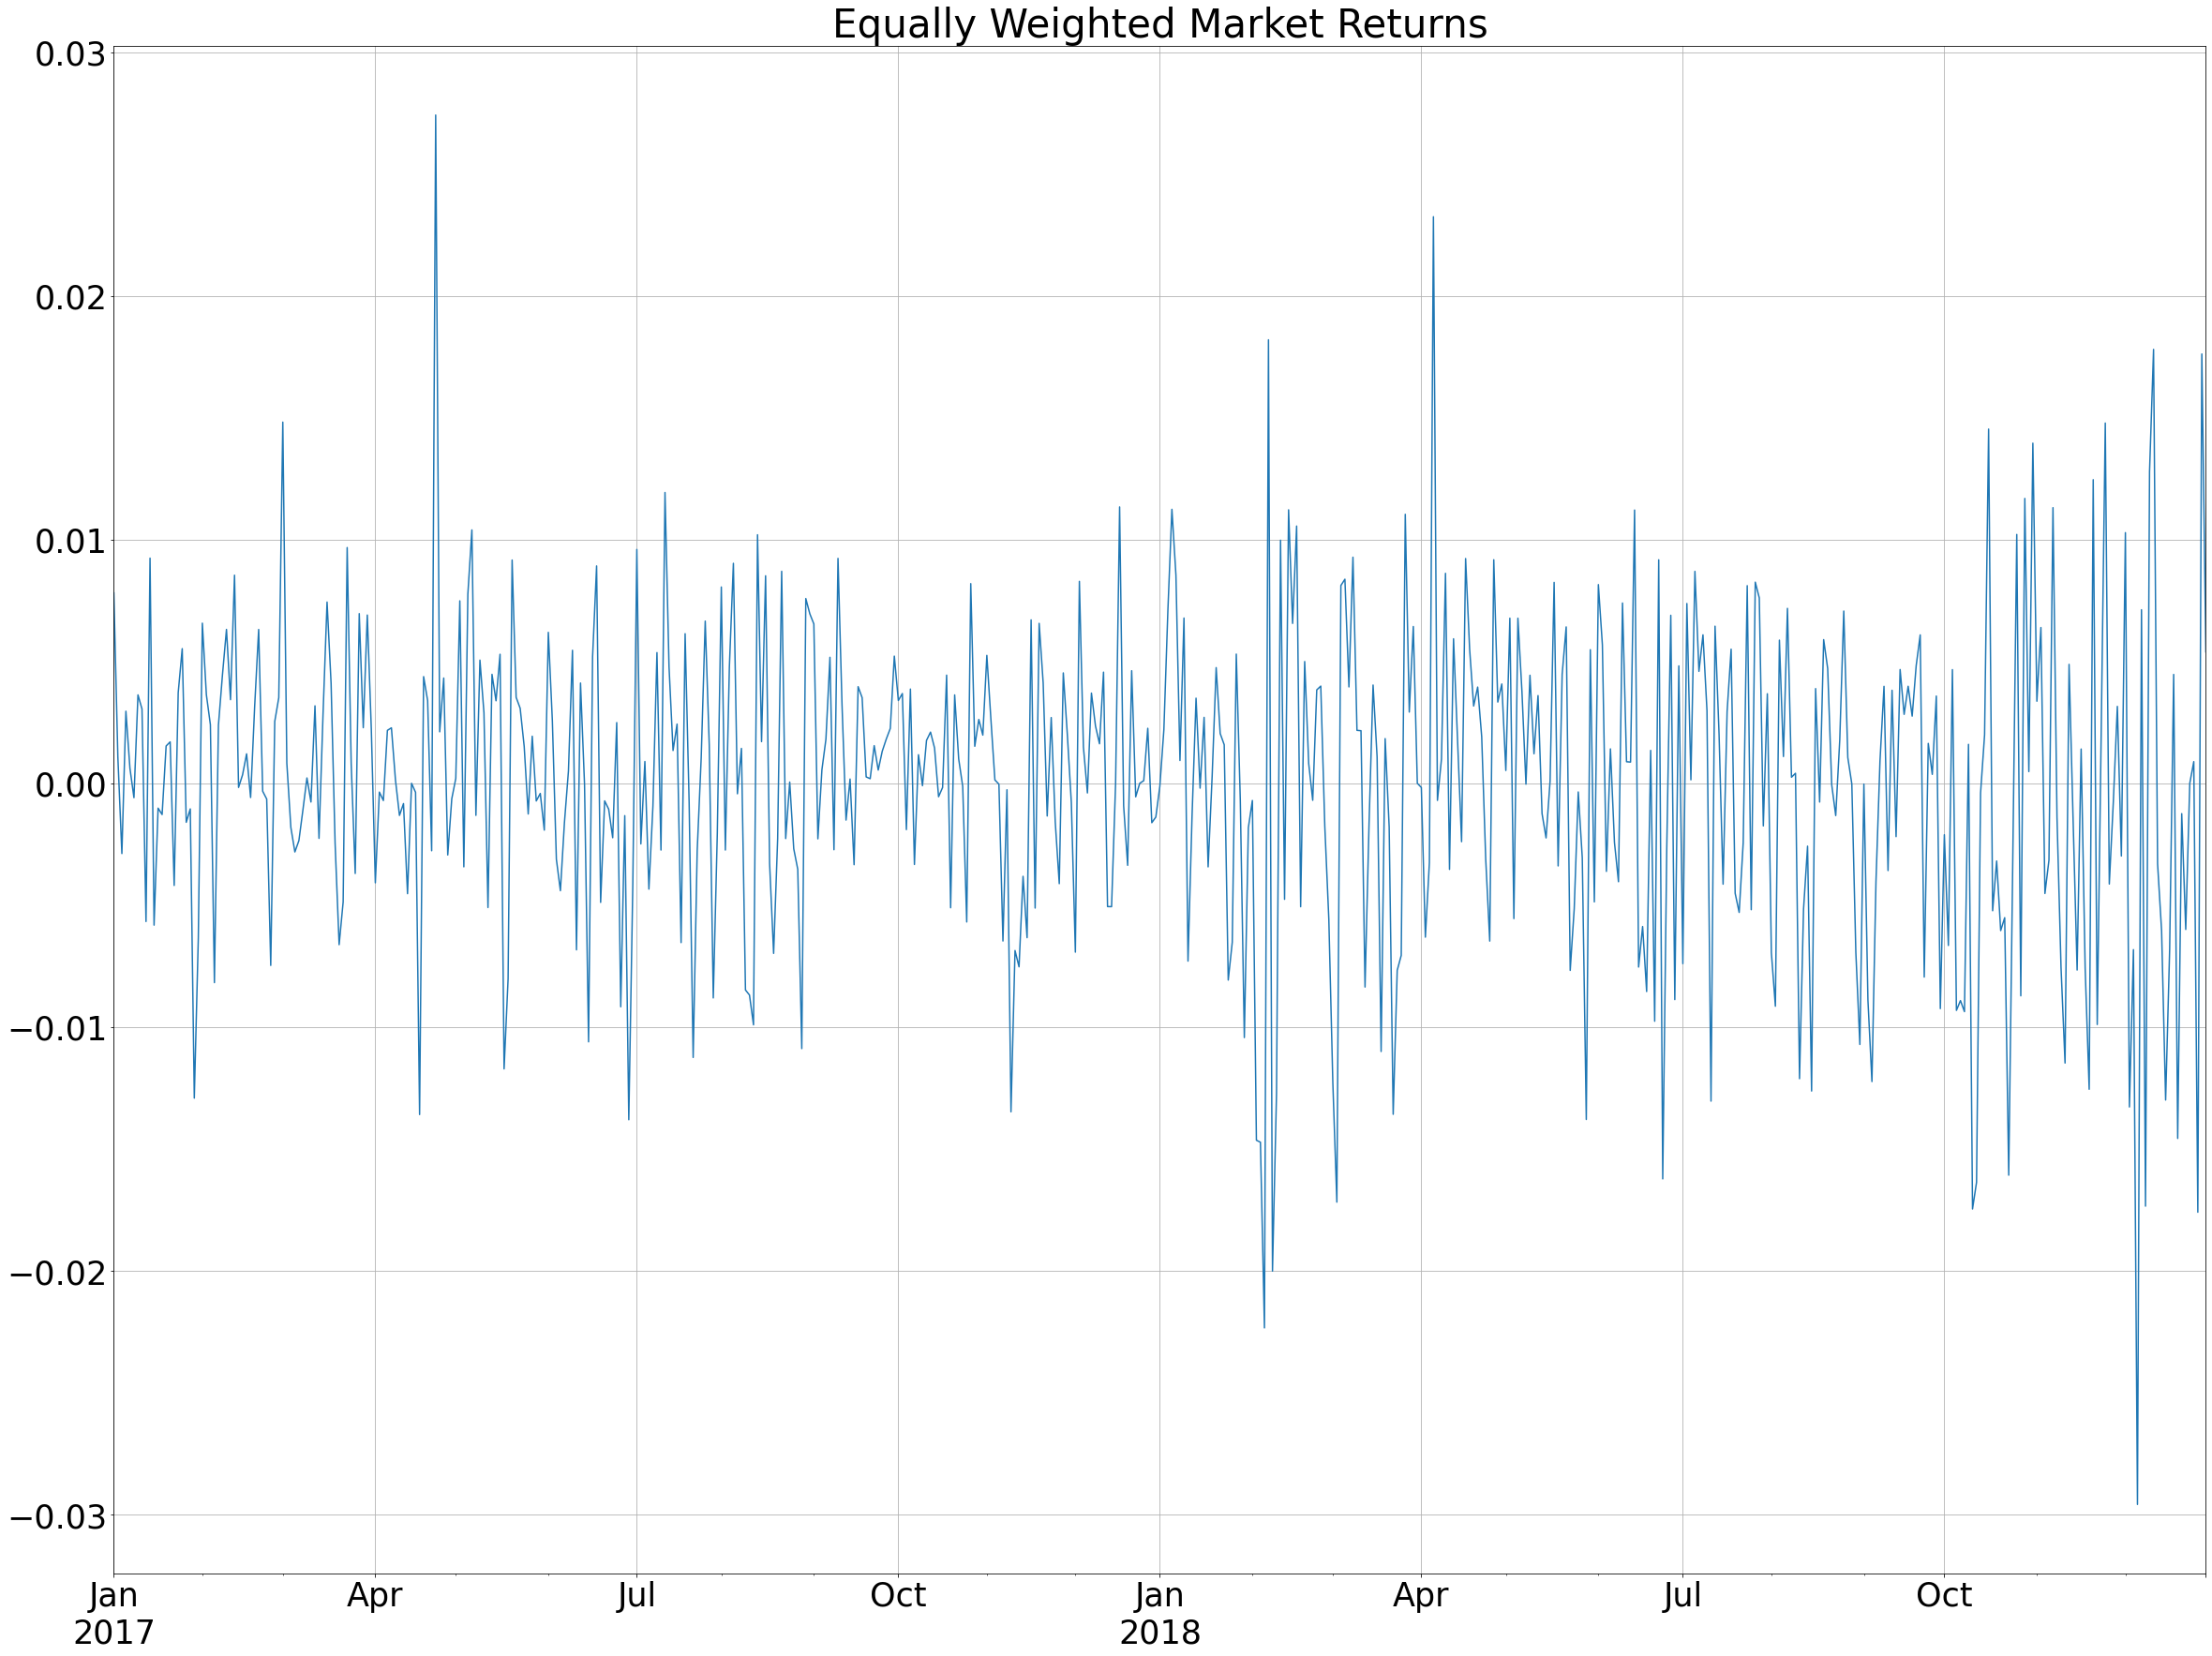

In [21]:
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})
mark_ret.plot(grid = True, title = 'Equally Weighted Market Returns')

### 2.4.2 Equally-weighted rolling beta

<Figure size 2880x2160 with 0 Axes>

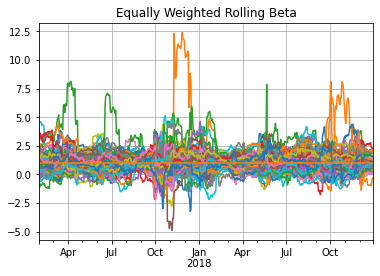

In [22]:
all_ret = ret.copy() 
all_ret['market'] = mark_ret.copy()

betadf = pd.DataFrame(columns = all_ret.columns)

for i in all_ret.index[(21):]: 
    ret_C = all_ret[:i].iloc[-22:].cov() 
    tmp_betas = ret_C['market'] / ret_C['market']['market']
    betadf.loc[i] = tmp_betas
    
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size':10})
betadf.plot(grid = True, title = 'Equally Weighted Rolling Beta', legend = False)

### 2.4.3 Mcap-weighted market return

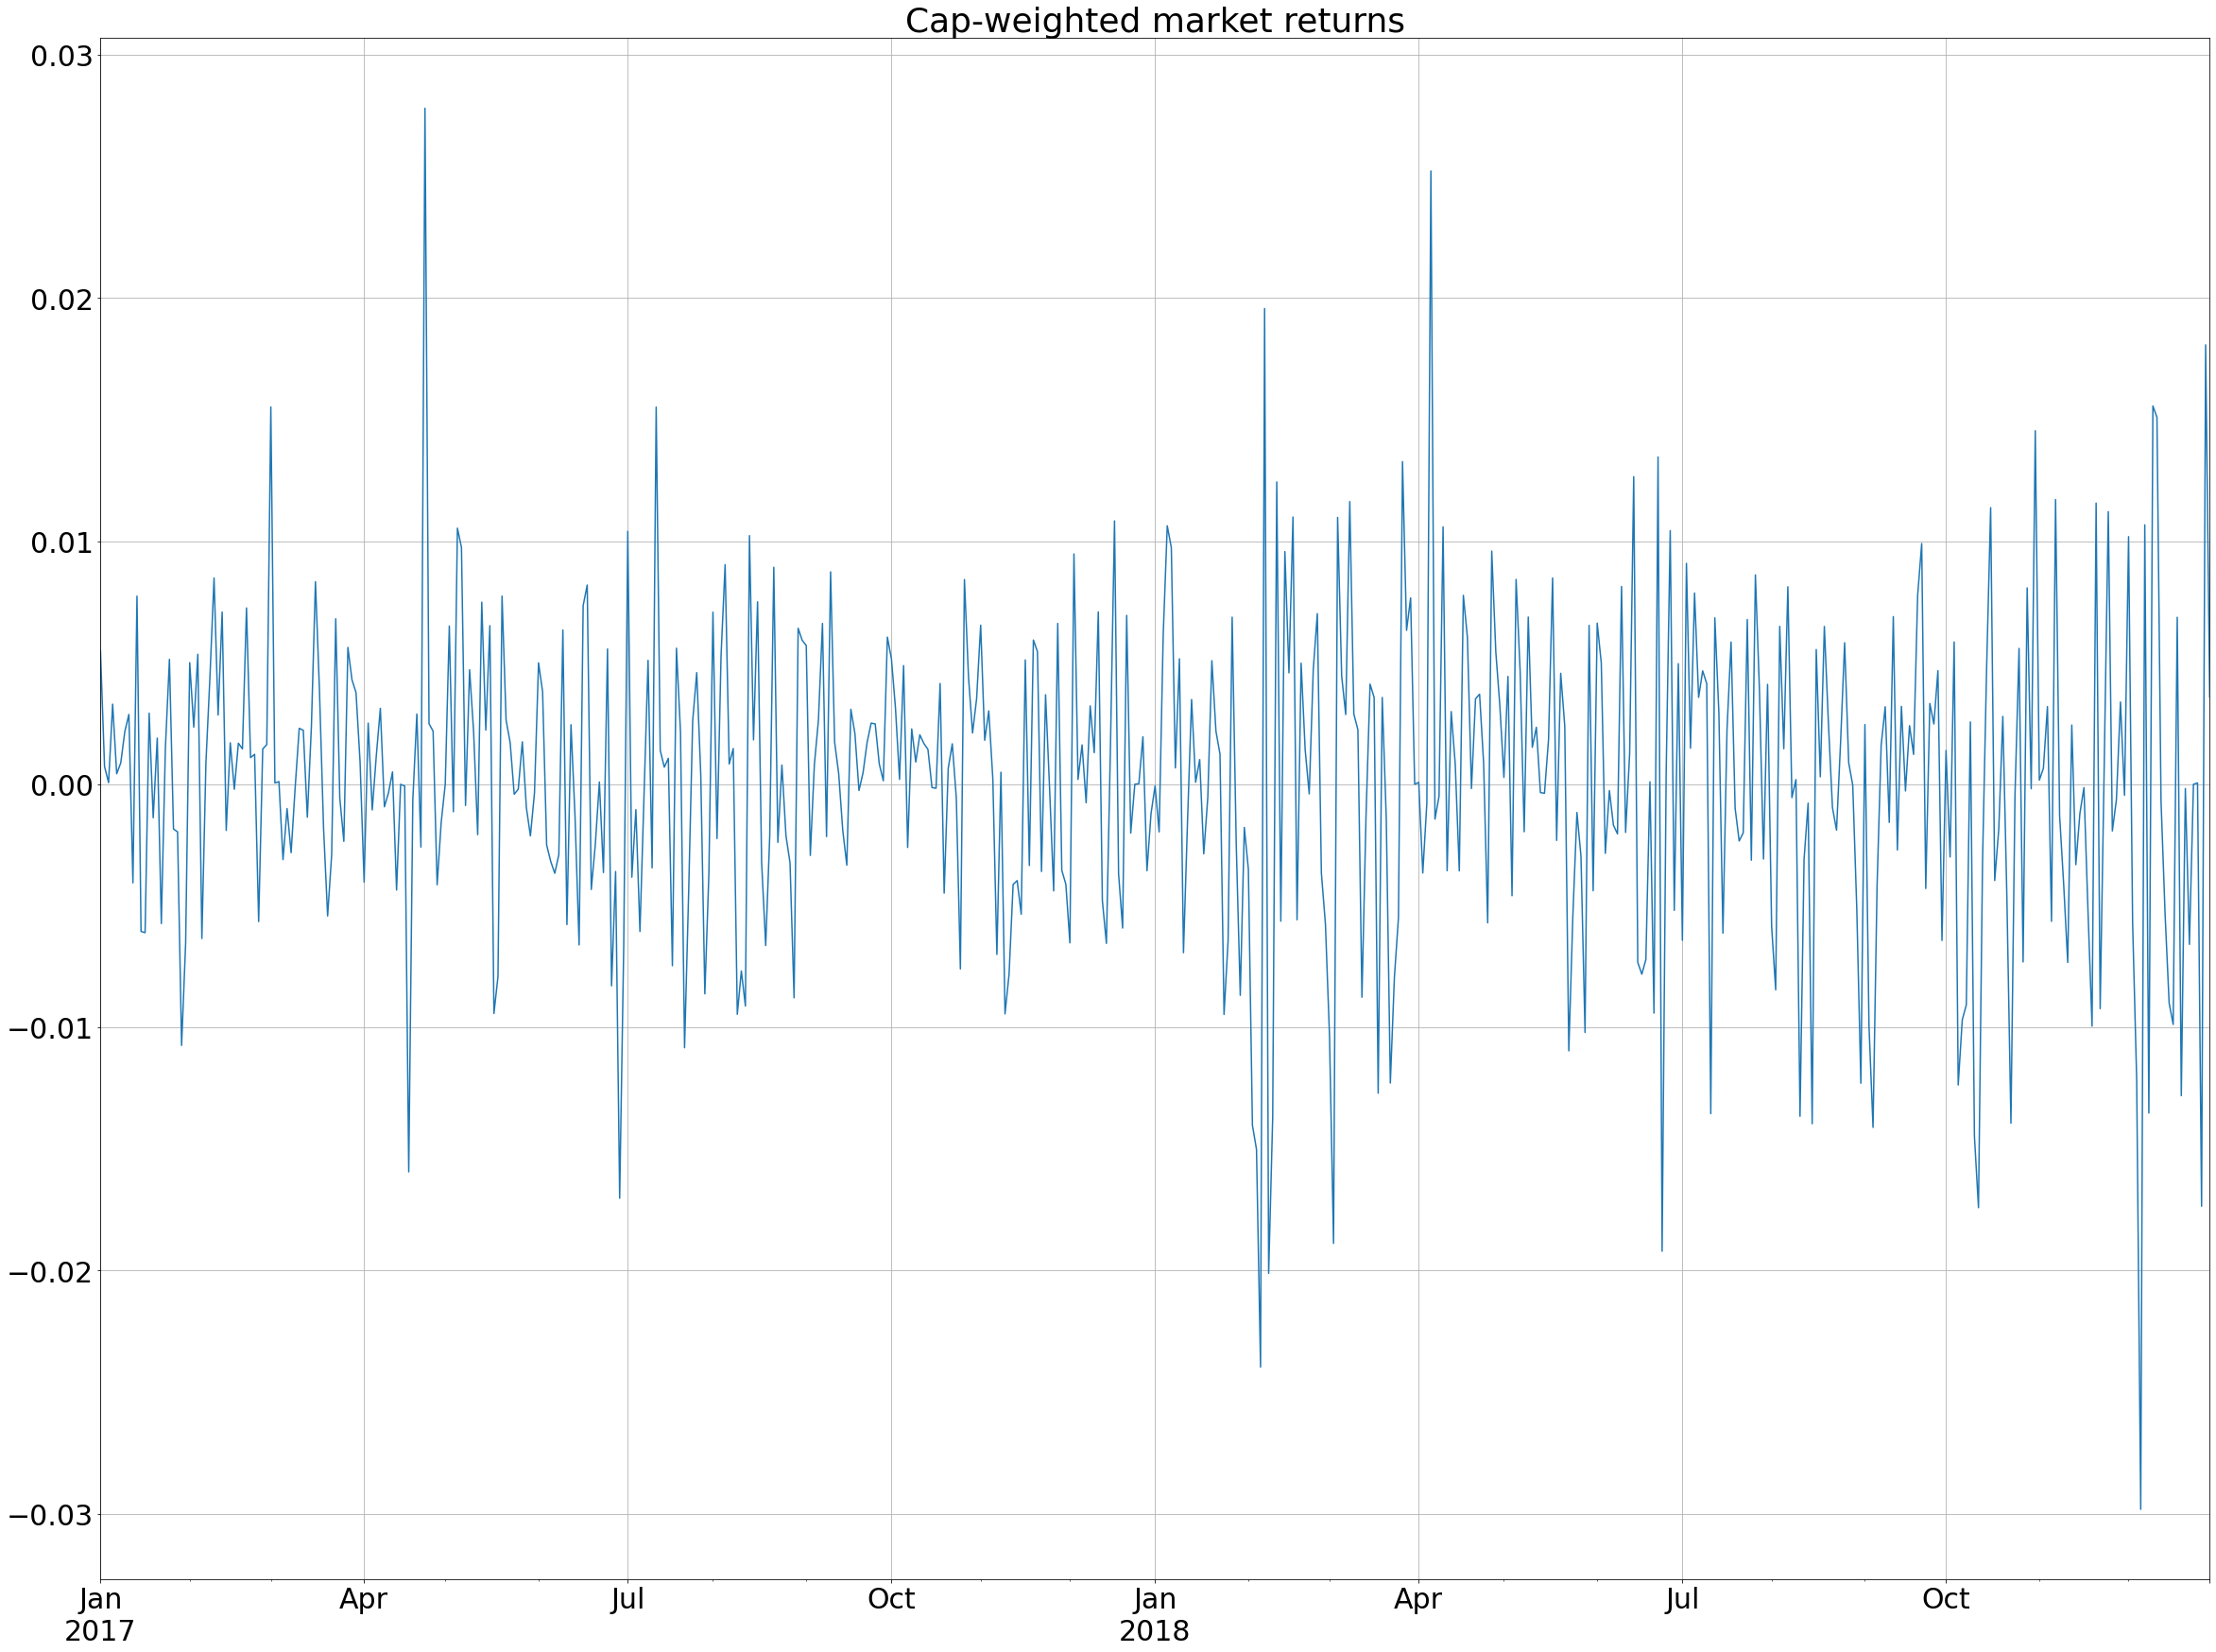

In [23]:
mcap = df['mcap'].copy() 
mcap.index = pd.to_datetime(mcap.index) 
mcap = mcap[ret.columns]

weights = mcap.divide(mcap.sum(1), 0)
weighted_ret = weights * ret.copy()
weighted_market_ret = weighted_ret.sum(1)

fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size':30})
weighted_market_ret.plot(grid = True, title = 'Cap-weighted market returns', legend = False)

### 2.4.4 Mcap-weighted rolling beta

<Figure size 2880x2160 with 0 Axes>

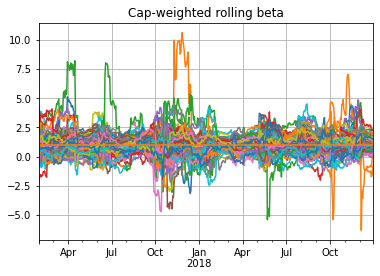

In [24]:
ret_matrix = ret.copy()
ret_matrix['market'] = weighted_market_ret.copy() 

betadf_weighted = pd.DataFrame(columns = ret_matrix.columns) 

for i in ret_matrix.index[21:]: 
    ret_C = ret_matrix[:i].iloc[-22:].cov() 
    tmp_betas = ret_C['market'] / ret_C['market']['market'] 
    betadf_weighted.loc[i] = tmp_betas

fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size':10})
betadf_weighted.plot(grid = True, title = 'Cap-weighted rolling beta', legend = False)

### 2.4.5. Arbitrage pricing theory

#### 2.4.5.a Estimate factor returns


In [25]:
ret_copy = ret.copy() 
ret_copy = ret_copy.loc[betadf_weighted.index] 
beta_market = betadf_weighted.iloc[:, :-1] 
beta_size = np.log(mcap.loc[betadf_weighted.index])

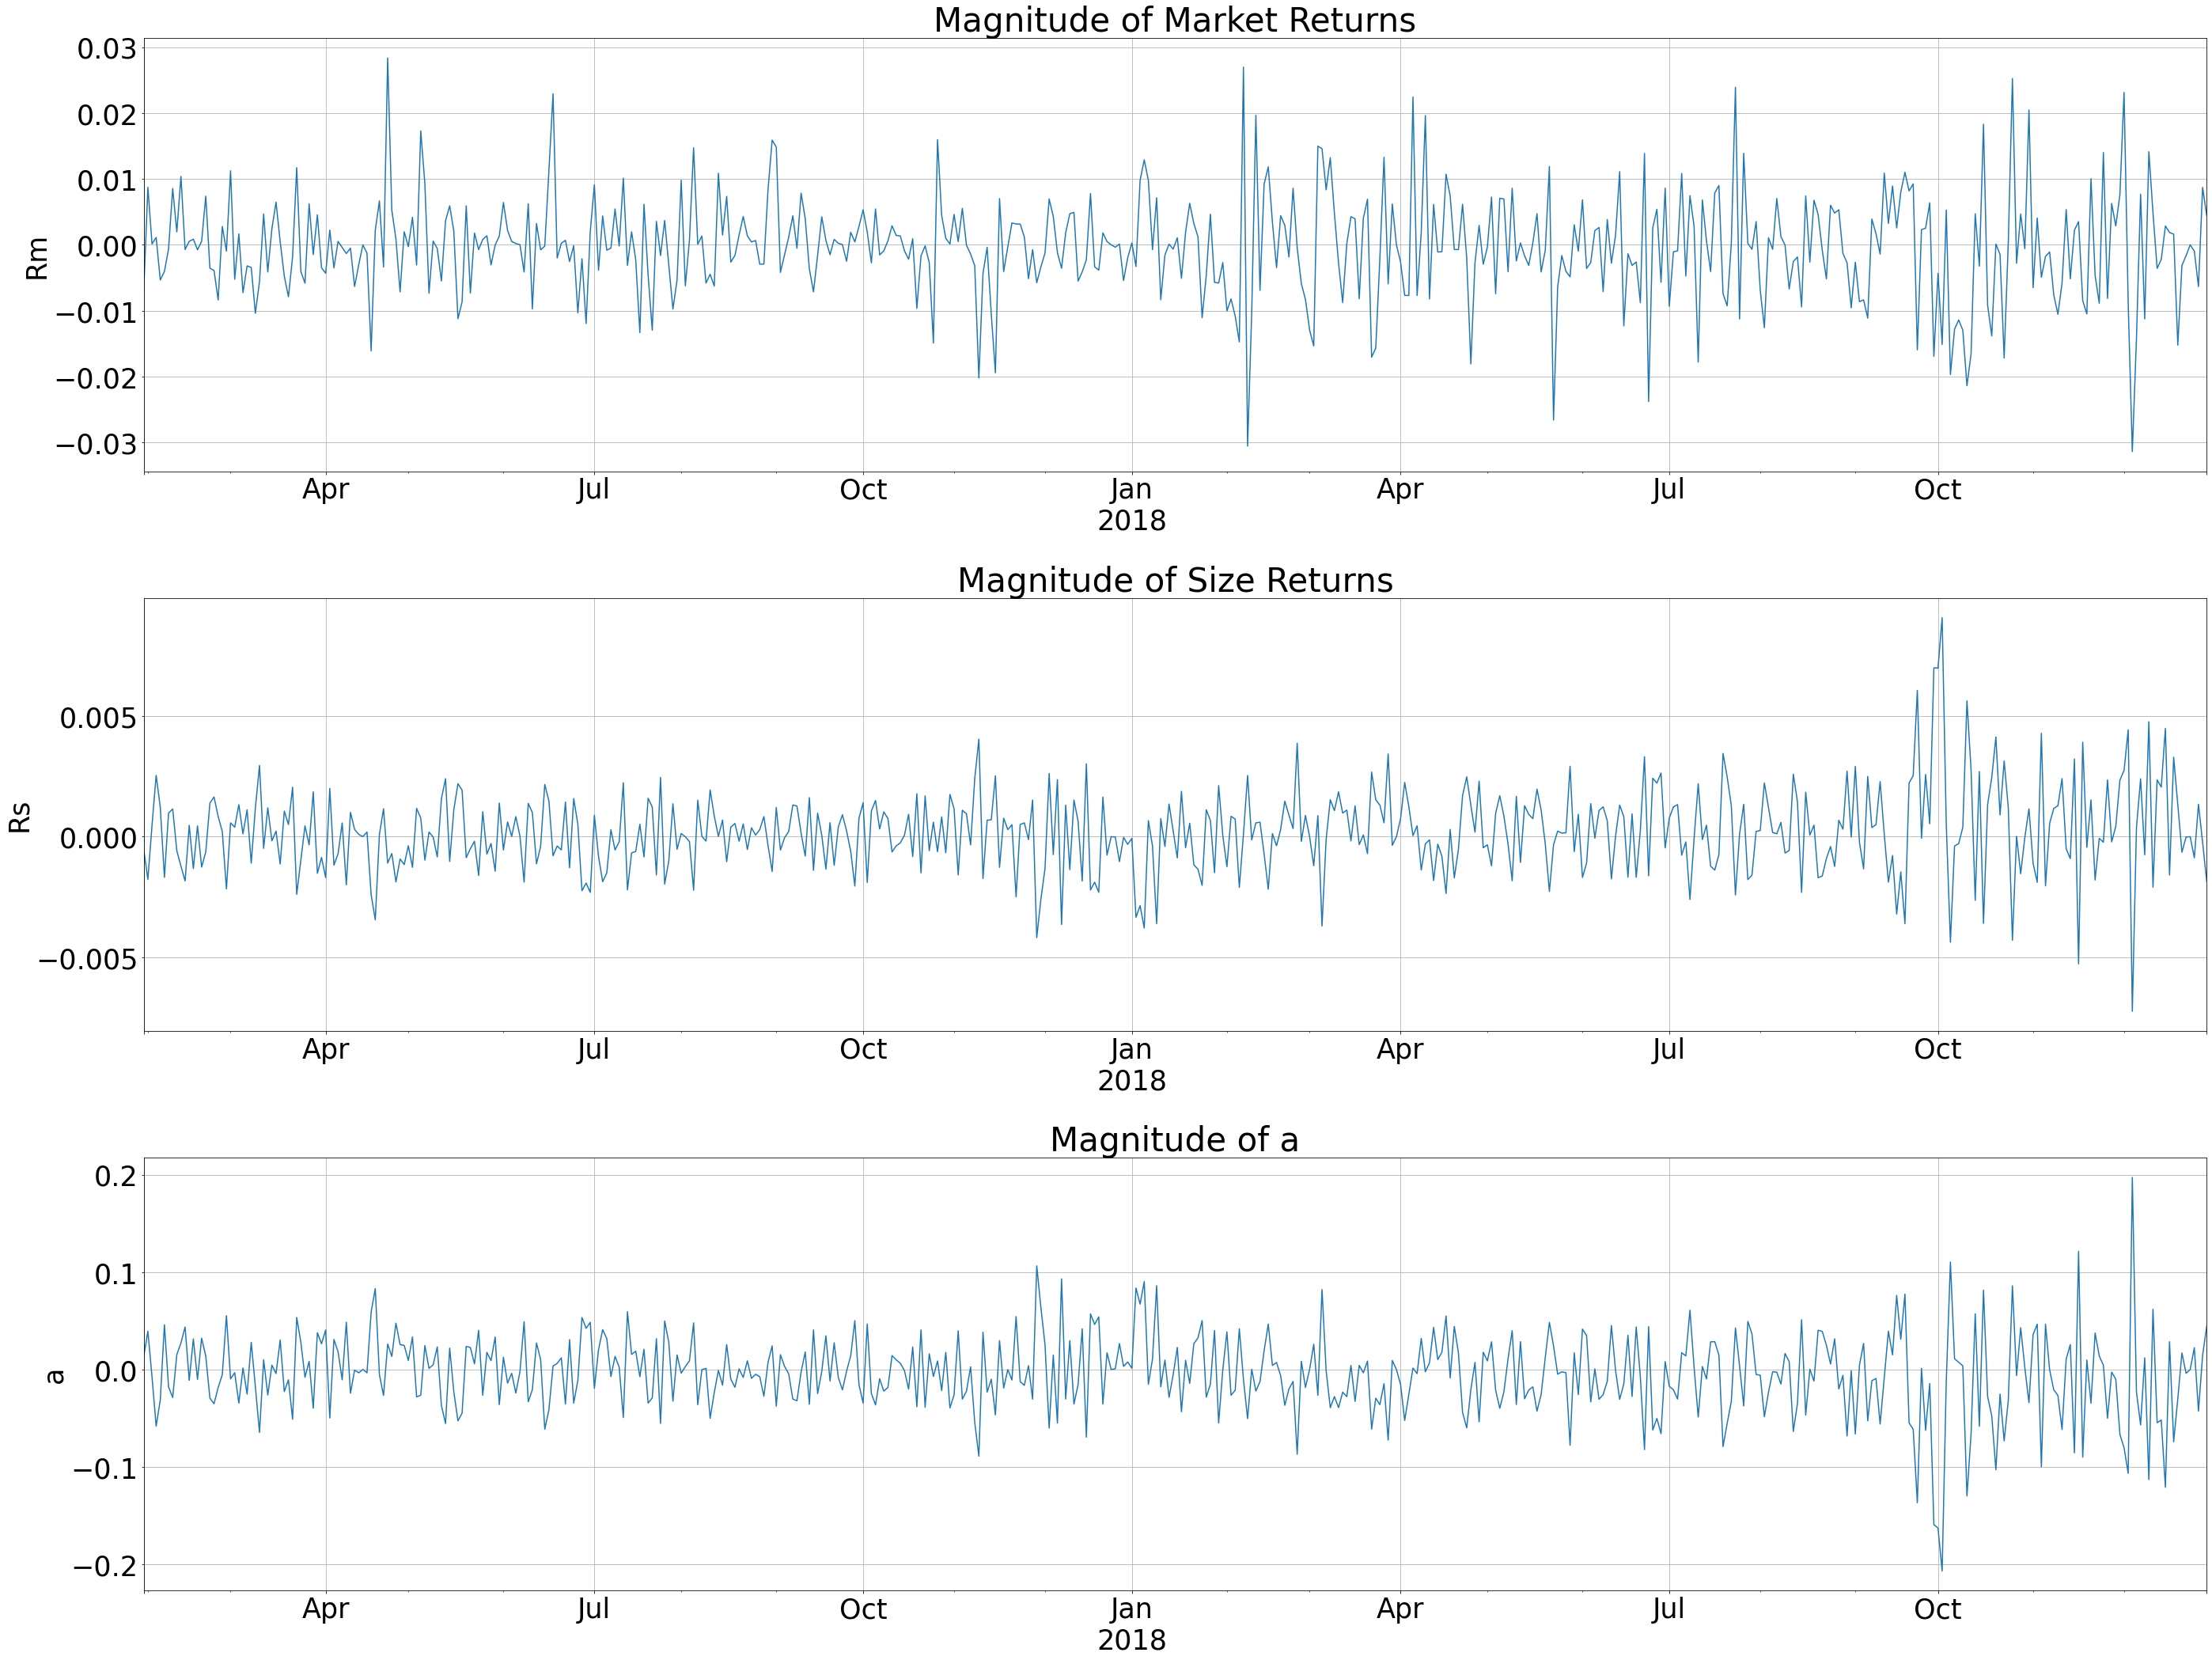

In [26]:
e = pd.DataFrame(index = ret_copy.index, columns = ret_copy.columns)
Rm = pd.Series(index = ret_copy.index, dtype='float64')
Rs = pd.Series(index = ret_copy.index, dtype='float64')
a = pd.Series(index = ret_copy.index, dtype='float64')

for i in ret_copy.index: 
    tmp_r = ret_copy.loc[i].values.reshape(-1,1)
    tmp_beta_market = beta_market.loc[i].values.reshape(-1,1)
    tmp_beta_size = beta_size.loc[i].values.reshape(-1,1)
    ones = np.ones((tmp_beta_market.shape))
    M = np.hstack((ones, tmp_beta_market, tmp_beta_size))
    ans = (np.linalg.inv(M.T @ M) @ M.T) @ tmp_r
    e.loc[i] = (tmp_r - M @ ans).reshape(1,-1)
    Rm[i] = float(ans[1])
    Rs[i] = float(ans[2])
    a[i] = float(ans[0])
 
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(3, 1, 1)
Rm.plot(grid = True, title = 'Magnitude of Market Returns')
plt.ylabel('Rm')

plt.subplot(3, 1, 2)
Rs.plot(grid = True, title = 'Magnitude of Size Returns')
plt.ylabel('Rs')
plt.tight_layout()

plt.subplot(3, 1, 3)
a.plot(grid = True, title = 'Magnitude of a')
plt.ylabel('a')
plt.tight_layout()

#### 2.4.5.b Parameters analysis

In [27]:
print('Variance of Rm: ' + str(Rm.var()))
print('Variance of Rs: ' + str(Rs.var()))
print('Variance of a: ' + str(a.var()))

Variance of Rm: 6.260803655226842e-05
Variance of Rs: 3.000752821137764e-06
Variance of a: 0.0016967089363866443


#### 2.4.5.c Specific return

In [28]:
specific_return = pd.Series(index = e.columns, dtype = 'float64')

for company in e.columns:
    specific_return[company] = pearsonr(e[company], ret_copy[company])[0]

print('Correlation mean: ' + str(specific_return.mean()))
print('Correlation standard deviation: ' + str(specific_return.std()))

specific_return

Correlation mean: 0.8114918953521875
Correlation standard deviation: 0.07592528090185026


cmp_id
G_AALLN     0.808360
G_ABIBB     0.805578
G_ACFP      0.816564
G_ADENVX    0.746052
G_ADLERR    0.766211
              ...   
G_VLVY      0.798633
G_VOD       0.786282
G_VW        0.749589
G_WKLNA     0.767001
G_WPPLN     0.882224
Length: 141, dtype: float64

#### 2.4.5.d Covariance matrix

In [29]:
log_R = []
R = pd.DataFrame(columns=['Rm', 'Rs'])
R['Rm']= Rm
R['Rs']= Rs

for i in R.index[(21):]:
    current_R = R[:i].iloc[-22:]
    current_R_cov = np.cov(current_R.T)
    log_R.append(current_R_cov)

log_R = np.array(log_R)
rolling_mag = pd.Series(index = R.index[21:], dtype = 'float')
rolling_stability = pd.Series(index = R.index[21:], dtype = 'float')

for i in range(1, log_R.shape[0]):
    current_R_cov = log_R[i]
    rolling_mag[i] = (np.linalg.norm(current_R_cov))

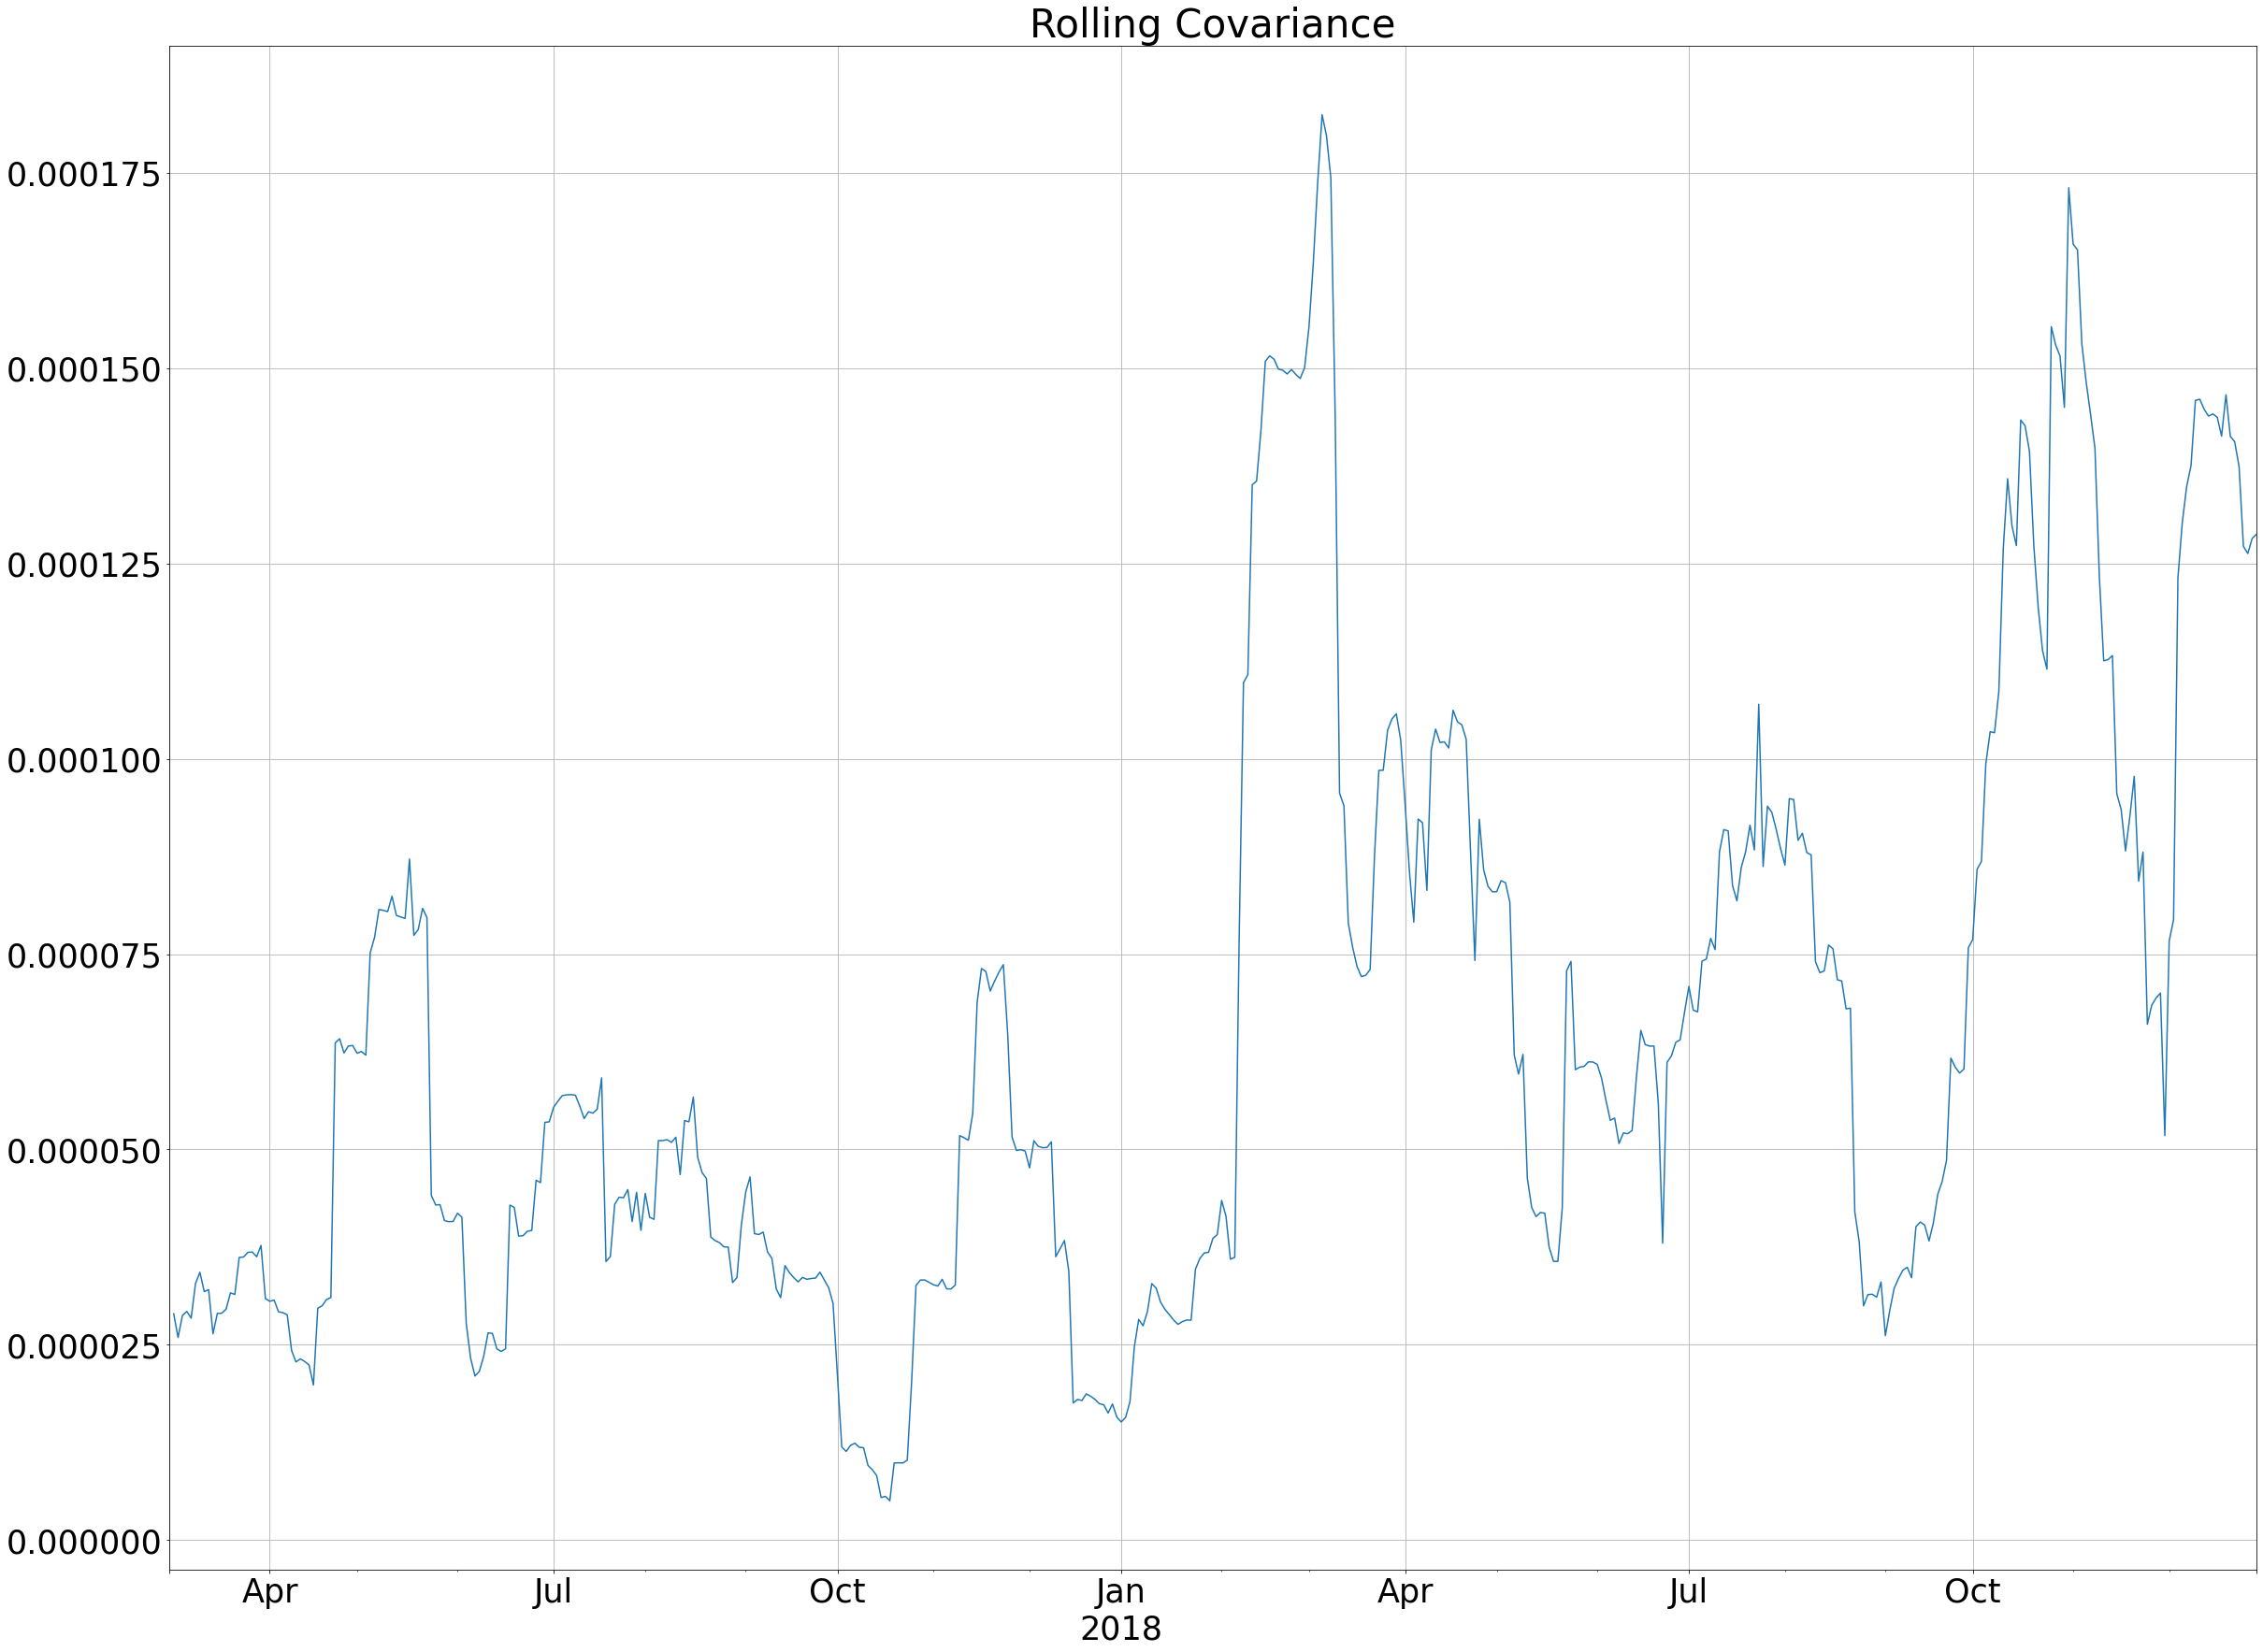

In [30]:
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})
rolling_mag.plot(grid = True, title = 'Rolling Covariance')

#### 2.4.5.e Principal component analysis 

Text(0.5, 0, 'Principal Components')

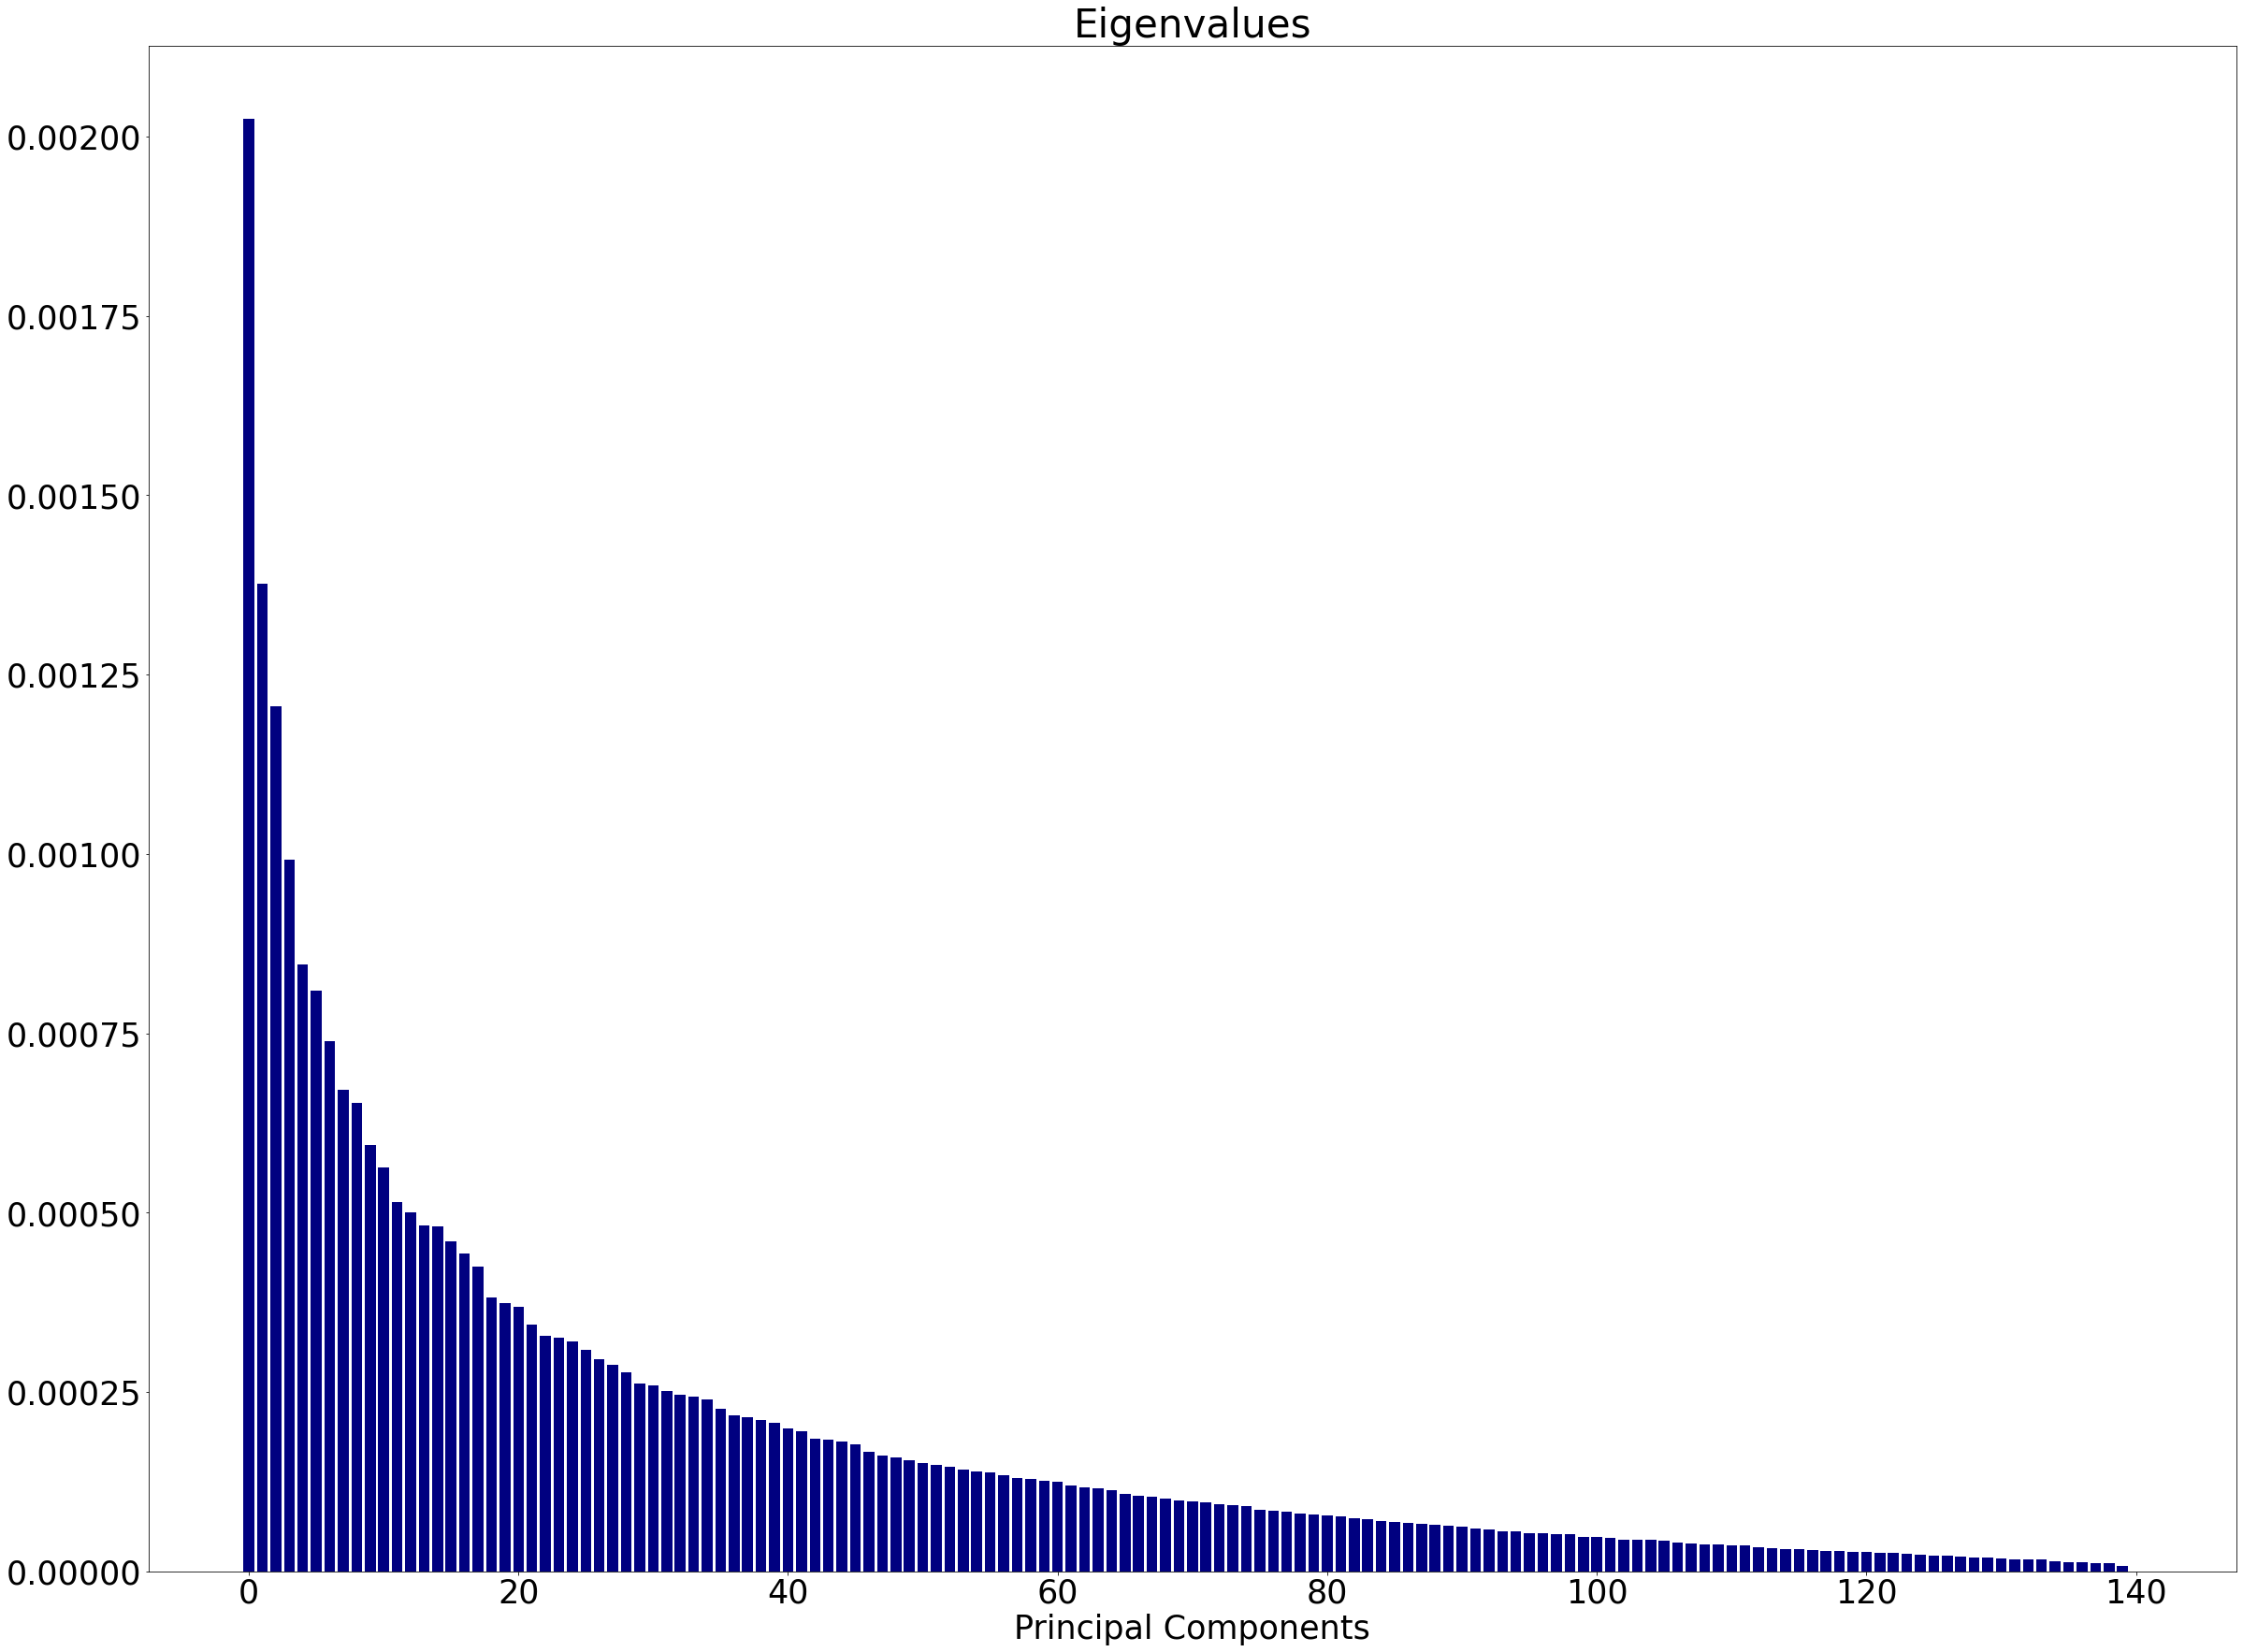

In [31]:
eigvals, eigvecs = np.linalg.eigh(e.astype(float).cov())
eigvals = eigvals[::-1]

fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})

CMAP = 'jet'
CMAP_OBJ = plt.cm.jet
plt.bar(np.arange(len(eigvals)), eigvals.T, color = CMAP_OBJ(0))
plt.title("Eigenvalues")
plt.xlabel("Principal Components")

# 3. Portfolio Optimisation

## 3.1 Adaptive Minumum-Variance Portfolio Optimization

### 3.1.1 Optimal weights

*See report.*

### 3.1.2 Minimum variance portfolio 

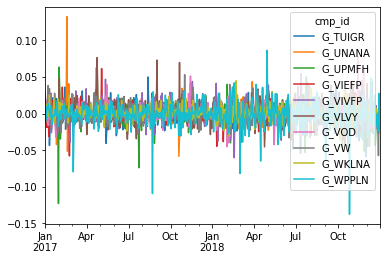

In [32]:
df = pd.read_csv('fsp_case_31_BSD.csv', index_col = 0, header = [0 ,1]) 
ret = df['ret'].copy().dropna(1) 
ret.index = pd.to_datetime(ret.index) 
ret = ret.iloc[:, -10:]
matplotlib.rcParams.update({'font.size': 10})
ret.plot()

In [33]:
def subplot_init(x, y, fig_size = (8,6), hspace = 0.5, wspace = 0.5):
    fig, axes = plt.subplots(x, y)
    fig.set_figheight(fig_size[0])
    fig.set_figwidth(fig_size[1])  
    fig.tight_layout()
    fig.subplots_adjust(hspace = hspace, wspace = wspace)
    return fig, axes

In [34]:
def get_opt_w(C, returns):
    ones = np.ones((returns.shape[1], 1))
    l = 1 / ((ones.T @ np.linalg.inv(C).T) @ ones)
    opt_w = l * (np.linalg.inv(C) @ ones)
    opt_w = opt_w.reshape(-1, )
    return opt_w

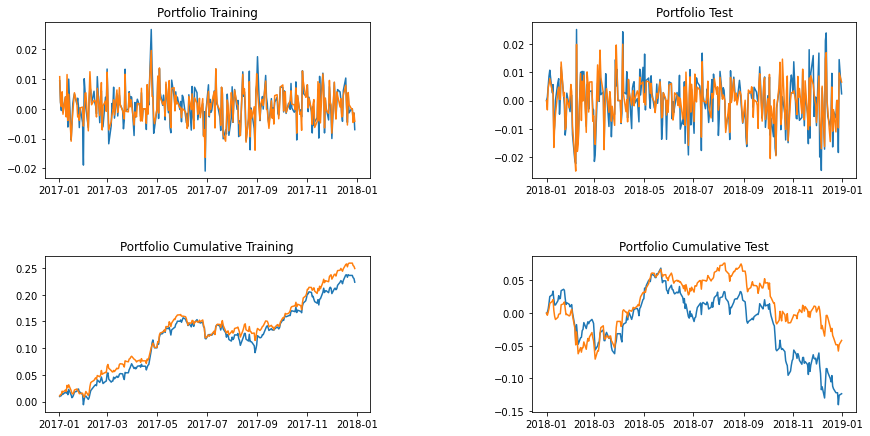

In [35]:
half_split = int(ret.shape[0] / 2)
ret_train = ret.iloc[:half_split, :]
ret_test = ret.iloc[half_split:, :]
min_vari = [0.0, 0.0]
theor_vari = [0.0, 0.0]
fig, axes = subplot_init(2, 2, fig_size = (6, 12))
matplotlib.rcParams.update({'font.size': 1})
i = 0
for portfolio in (ret_train.mean(1), ret_test.mean(1)):
    axes[0][i].plot(portfolio, label = "Equally Weighted")
    axes[1][i].plot(portfolio.cumsum(), label = "Equally Weighted")
    if i == 0:
        rets = ret_train
    else:
        rets = ret_test
    C = rets.cov()
    opt_weights = get_opt_w(C, rets)
    min_var = (rets * opt_weights).sum(1)
    
    one_matrix = np.ones((opt_weights.shape)).reshape(-1, 1)
    theor_var = 1 / (one_matrix.T @ np.linalg.inv(C).T @ one_matrix)
    
    min_vari[i] = min_var.std()**2
    theor_vari[i] = theor_var[0][0]

    axes[0][i].plot(min_var, label = "Minimum Variance")
    axes[1][i].plot(min_var.cumsum(), label = "Minimum Variance")
    i += 1

axes[0][0].title.set_text('Portfolio Training')
axes[0][1].title.set_text('Portfolio Test')
axes[1][0].title.set_text('Portfolio Cumulative Training')
axes[1][1].title.set_text('Portfolio Cumulative Test')

In [36]:
print('Calculated minimum variance: ' + str(min_vari))
print('Theoretical minimum variance: ' + str(theor_vari))

Calculated minimum variance: [2.8616294052082778e-05, 5.844869823335126e-05]
Theoretical minimum variance: [2.861629405208281e-05, 5.844869823335124e-05]


### 3.1.3 Adaptive minimum variance portfolio

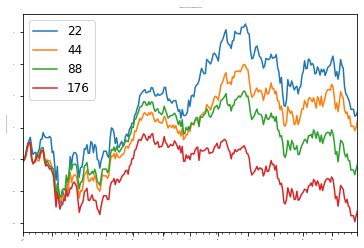

In [37]:
windows =  [22 * i for i in [1, 2, 4, 8]]
rets = []
variances = []
colors = [0, .2, .5, .8]
i = 0

for w in windows:  
    adapt_min_var_portfolio = pd.Series(dtype = 'float64') 
    log_opt_weights = [] 
    log_returns = []
    for t in ret_test.index: 
        curr_return = ret[:t].iloc[(-w-1):-1] 
        curr_C = curr_return.cov() 
        opt_weights = get_opt_w(curr_C, curr_return) 
        log_opt_weights.append(opt_weights)
        adapt_min_var_portfolio[t] = sum(ret_test.loc[t] * opt_weights)  
        log_returns.append(adapt_min_var_portfolio[t])
    rets.append(log_returns)
    variances.append(adapt_min_var_portfolio.std() ** 2)
    adapt_min_var_portfolio.cumsum().plot(title = 'Adaptive Portfolio Cumulative Return', label= w)
    plt.ylabel('Adaptive Portfolio Cumulative Return') 
    plt.legend(loc=2, prop={'size': 12})
    i+=1

In [38]:
for i in range(len(windows)):
    print('Window size ' + str(windows[i]))
    print("Cumulative Return = " + str(sum(rets[i])) + " Variance = " + str(variances[i]))

Window size 22
Cumulative Return = 0.07477350103220994 Variance = 0.00010824146863553483
Window size 44
Cumulative Return = 0.06085984119196436 Variance = 7.586001363381471e-05
Window size 88
Cumulative Return = -0.007746775821219552 Variance = 7.111197738073359e-05
Window size 176
Cumulative Return = -0.08104874107984028 Variance = 6.794596649518441e-05


# 4 Robust Statistics and Non-Linear Methods

In [39]:
from lmfit.models import GaussianModel
from statsmodels import robust
from statsmodels.robust.scale import mad as mad_c
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf

## 4.1 Data Import and Exploratory Data Analysis

### 4.1.1 Key descriptive statistics

In [40]:
AAPL = pd.read_csv('AAPL.csv', index_col = 0) 
AAPL.index = pd.to_datetime(AAPL.index) 

IBM = pd.read_csv('IBM.csv', index_col = 0)
IBM.index = pd.to_datetime(IBM.index)

JPM = pd.read_csv('JPM.csv', index_col = 0)
JPM.index = pd.to_datetime(JPM.index)

DJI = pd.read_csv('DJI.csv', index_col = 0)
DJI.index = pd.to_datetime(DJI.index)

all_stocks = {'AAPL': AAPL, 'IBM': IBM, 'JPM': JPM, 'DJI': DJI} 

In [41]:
tickers = ['AAPL', 'IBM', 'JPM', 'DJI'] 
dtypes = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] 
stats = ['Mean', 'Median', 'StdDev', 'MAD', 'IQR', 'Skew', 'Kurtosis'] 
stats_df = pd.DataFrame(index = stats, columns = dtypes) 

all_stats = {'AAPL': stats_df.copy(), 'IBM': stats_df.copy(), 'JPM': stats_df.copy(), 'DJI': stats_df.copy()} 

In [42]:
for ticker in tickers:
    data = all_stocks[ticker].copy()
    for dtype in dtypes:
        col = data[dtype]
        all_stats[ticker][dtype]['Mean'] = col.mean()
        all_stats[ticker][dtype]['Median'] = col.median()
        all_stats[ticker][dtype]['StdDev'] = col.std()
        all_stats[ticker][dtype]['Skew'] = col.skew()
        all_stats[ticker][dtype]['Kurtosis'] = col.kurtosis()
        all_stats[ticker][dtype]['MAD'] = mad_c(col, c = 1)
        all_stats[ticker][dtype]['IQR'] = iqr(col)

In [43]:
for ticker in tickers:
    print(ticker)
    display(all_stats[ticker])

AAPL


Open        High         Low       Close   Adj Close  \
Mean      187.686694  189.561753  185.823705  187.711953  186.174273   
Median    186.289993  187.399994  184.940002  186.119995  184.351776   
StdDev     22.145621   22.281577   22.008797   22.160721   21.904664   
MAD        15.889999   15.610001   15.919998   15.940002   15.476044   
IQR             36.0   36.339996   36.059998   36.755004    35.68544   
Skew        0.259917    0.300385    0.220489    0.263849     0.29077   
Kurtosis   -0.912594   -0.924602   -0.917632   -0.932425   -0.928017   

                   Volume  
Mean      32704750.199203  
Median         29184000.0  
StdDev    14179721.592994  
MAD             7573900.0  
IQR            16311700.0  
Skew             1.743317  
Kurtosis         4.353182

IBM


Open        High         Low       Close   Adj Close  \
Mean      138.454382  139.492072  137.329243  138.363108  134.902751   
Median    142.809998  143.990005  142.059998  142.710007  138.566391   
StdDev     12.114308   11.913079   12.204633   12.028123   10.671648   
MAD         5.270004    5.309998    5.190002    5.230011    4.493515   
IQR        15.379998   14.720001   16.340004   15.504997   14.103938   
Skew       -0.676024   -0.622707   -0.713446   -0.682246   -0.811222   
Kurtosis   -0.585272   -0.623607   -0.561975   -0.584037   -0.420852   

                  Volume  
Mean      5198937.450199  
Median         4237900.0  
StdDev    3328955.530426  
MAD             920700.0  
IQR            1952950.0  
Skew            3.192896  
Kurtosis       11.796897

JPM


Open        High         Low       Close   Adj Close  \
Mean      108.707689  109.652072  107.682988  108.606574   107.26259   
Median        109.18  110.529999  107.790001  109.019997  107.219269   
StdDev      5.359081     5.20287    5.432537     5.30048    4.833316   
MAD         4.470001    4.309997    4.239998    4.350006    3.450157   
IQR         8.810006    8.845002    8.845001    8.834999    7.222442   
Skew       -0.420811   -0.376221   -0.377517   -0.374853   -0.344491   
Kurtosis   -0.322536   -0.544163     -0.2657   -0.396579   -0.105437   

                   Volume  
Mean      14700689.243028  
Median         13633000.0  
StdDev     5349770.564456  
MAD             3035400.0  
IQR             6233600.0  
Skew             1.693457  
Kurtosis         4.430197

DJI


Open          High           Low         Close  \
Mean      25001.257268  25142.041965  24846.002226  24999.153581   
Median    25025.580078  25124.099609  24883.039063  25044.289063   
StdDev      858.834708    815.203959    903.302186    859.132105   
MAD         543.541015     537.61914     601.56836    590.720703   
IQR         1109.43457   1077.816406   1204.418945   1158.155273   
Skew         -0.372127     -0.239367     -0.456447     -0.380147   
Kurtosis      0.485736      0.118153      0.557592      0.400668   

             Adj Close            Volume  
Mean      24999.153581  332889442.231076  
Median    25044.289063       313790000.0  
StdDev      859.132105    94078038.14115  
MAD         590.720703        50460000.0  
IQR        1158.155273       108930000.0  
Skew         -0.380147           1.73956  
Kurtosis      0.400668          5.857581

In [44]:
for ticker in tickers:
    all_stocks[ticker]['Returns'] = all_stocks[ticker]['Adj Close'].pct_change()

### 4.1.2 Probability density functions

In [45]:
def plot_histogram(ax, data, bins = 100, color1 = CMAP_OBJ(0), color2 = CMAP_OBJ(0.1), label = ''):
    weights = np.ones_like(data)/float(len(data))
    y, bin_edges, _ = ax.hist(data, bins = bins, color = color1, weights = weights, label = label, alpha = 0.7)
    x = (bin_edges[:-1] + bin_edges[1:]) /  2.0 

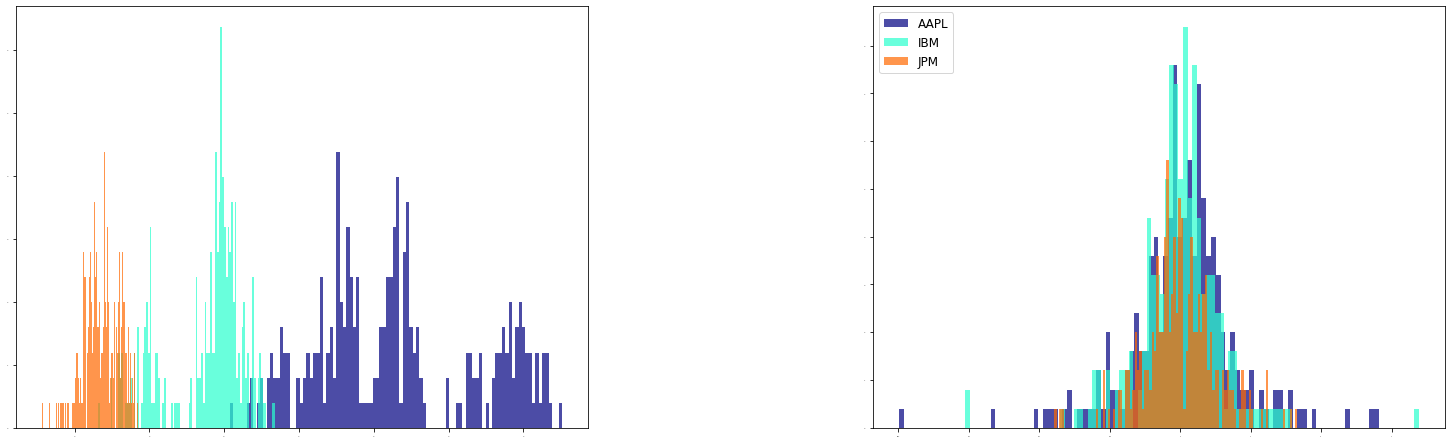

In [46]:
fig, axes = subplot_init(1, 2, fig_size = (6, 20))   

for i in range(len(tickers) - 1):
    price_data = all_stocks[tickers[i]]['Adj Close'].dropna()   
    plot_histogram(axes[0], price_data.to_numpy(), bins = 100, color1 = CMAP_OBJ(0 + 0.4 * i), color2 = CMAP_OBJ(0.1 + 0.5 * i), label = tickers[i])
    returns_data = 100 * all_stocks[tickers[i]]['Returns'].dropna()
    plot_histogram(axes[1], returns_data.to_numpy(), bins = 100, color1 = CMAP_OBJ(0 + 0.4 * i), color2 = CMAP_OBJ(0.1 + 0.5 * i), label = tickers[i])
    plt.legend(loc=2, prop={'size': 12})

### 4.1.3 Mean and median estimators

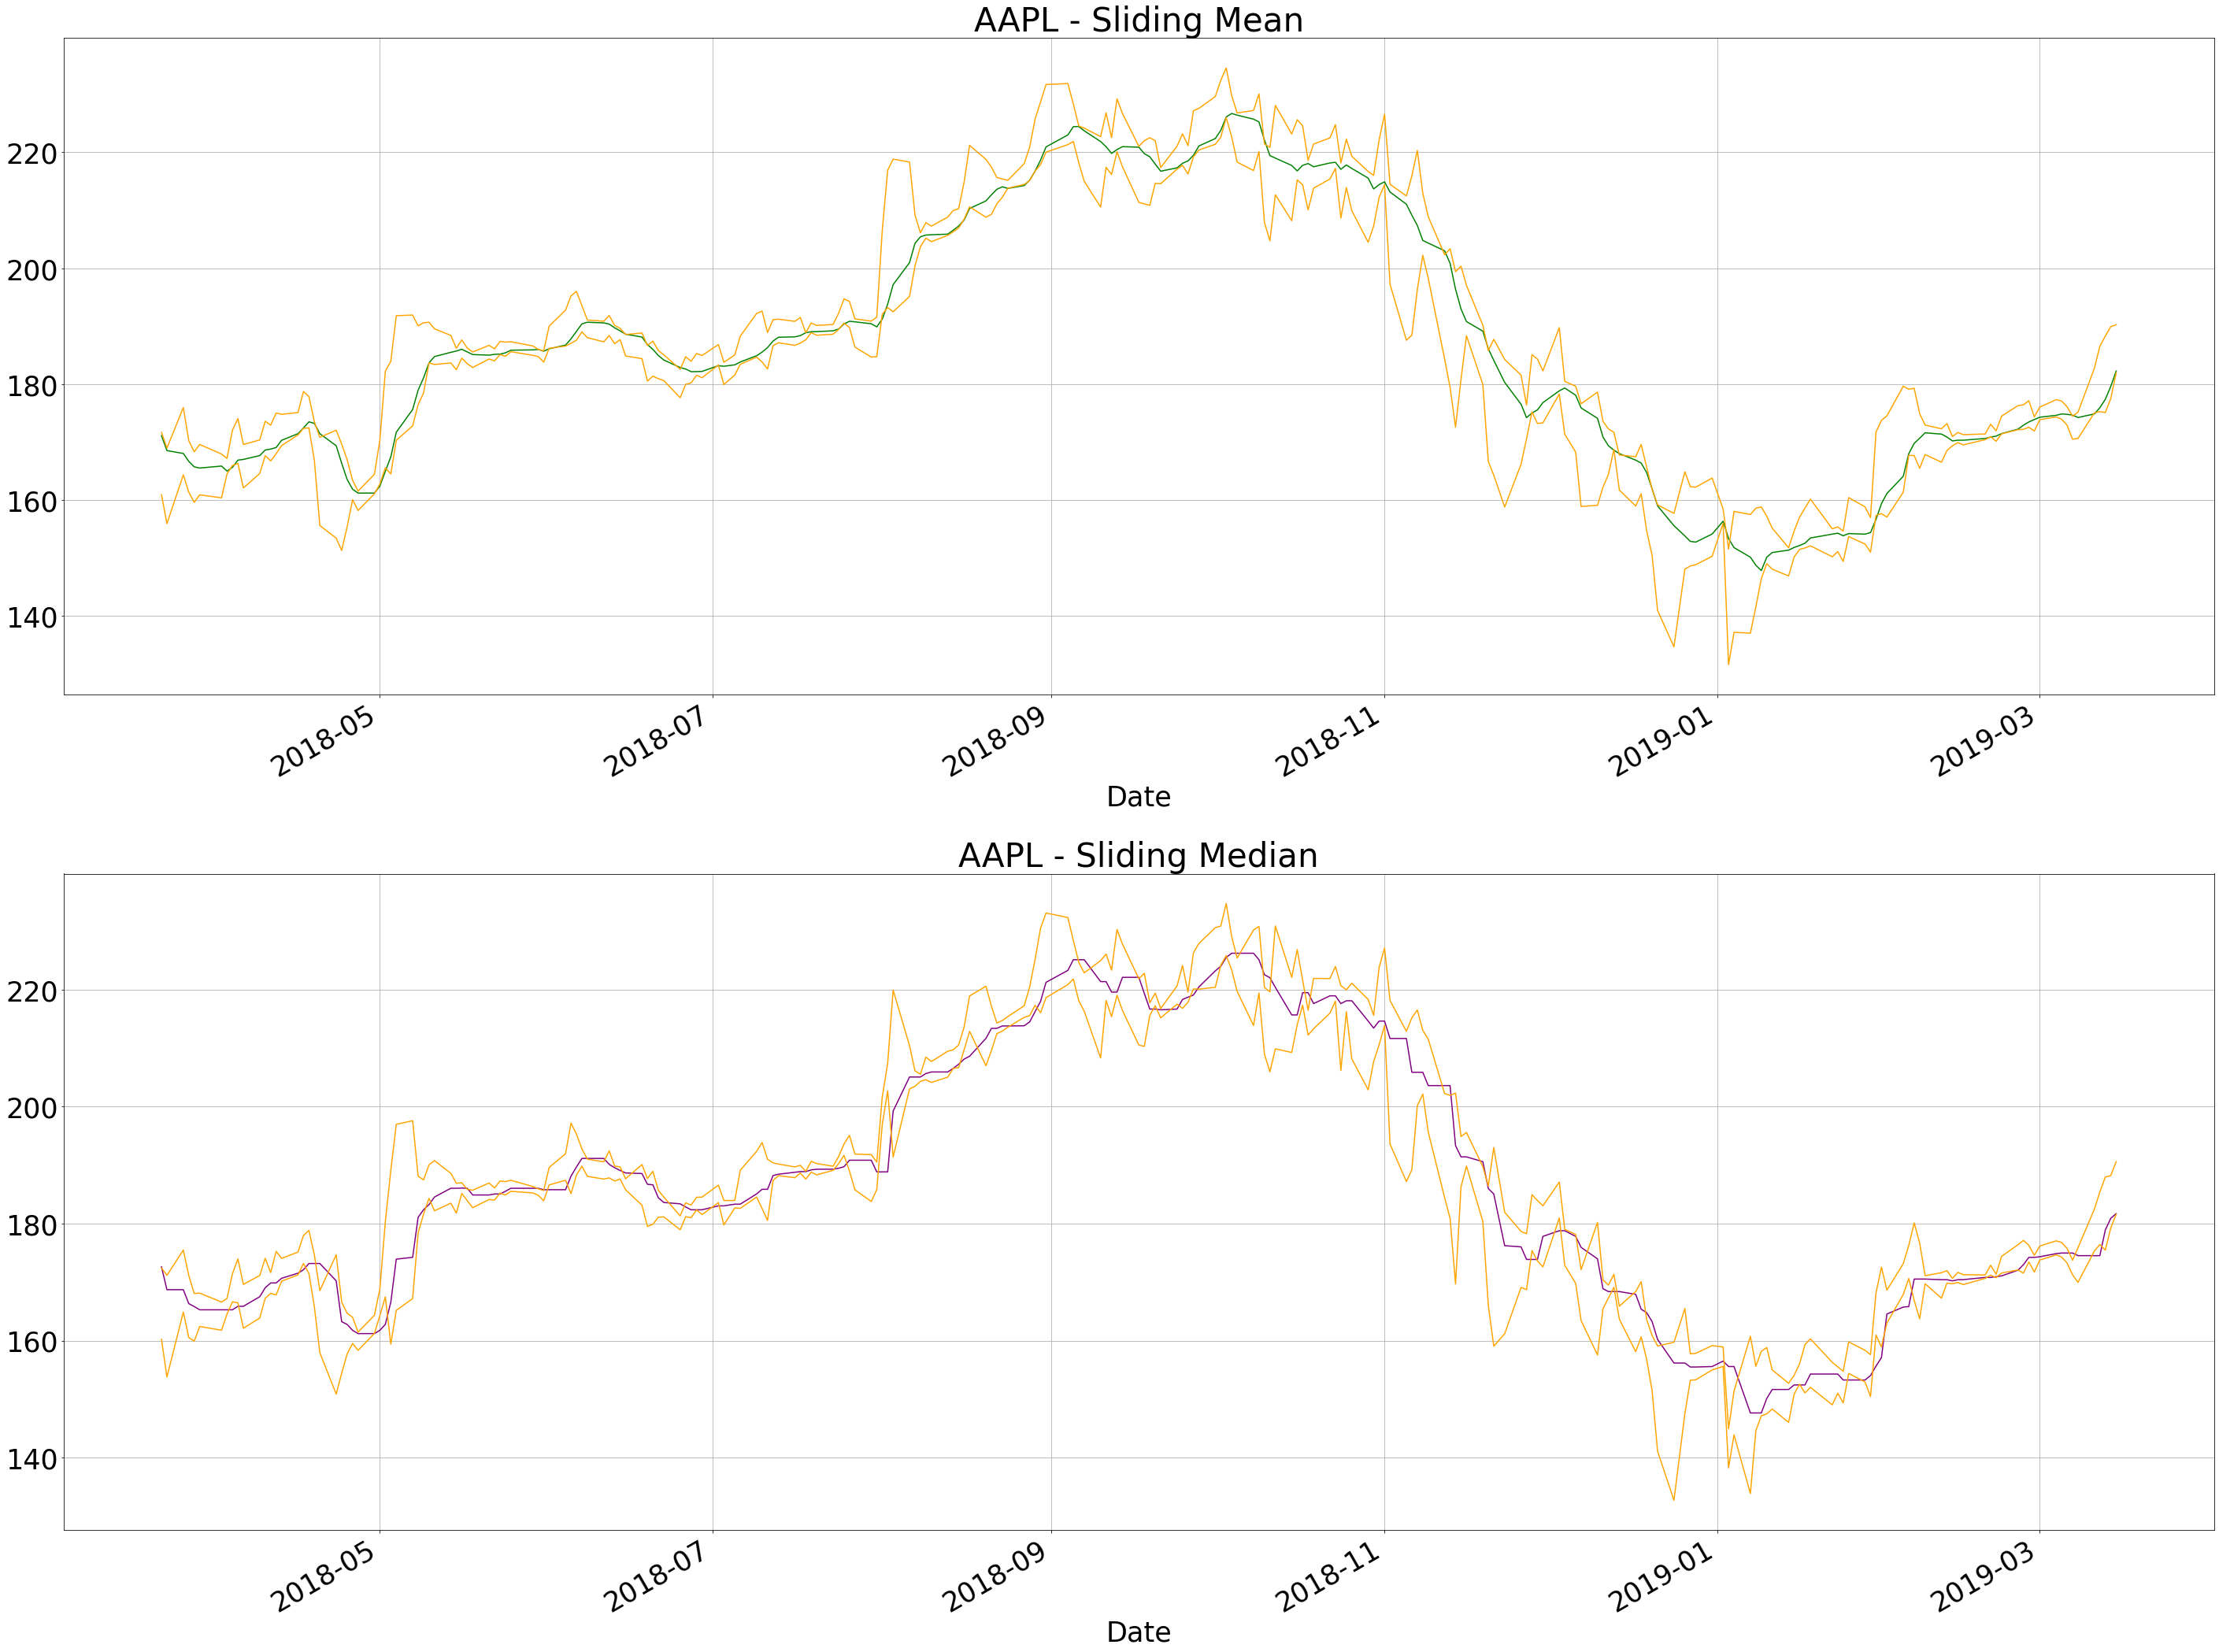

In [47]:
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(2, 1, 1)
AAPL['Adj Close'].rolling(5).mean().plot(grid=True, title='AAPL - Sliding Mean',  color='green')
UB = AAPL['Adj Close'] + 1.5 * AAPL['Adj Close'].rolling(5).std()
UB.plot(grid=True, title='AAPL - Sliding Mean',  color='orange')
LB = AAPL['Adj Close'] - 1.5 * AAPL['Adj Close'].rolling(5).std()
LB.plot(grid=True, title='AAPL - Sliding Mean',  color='orange')

plt.subplot(2, 1, 2)
AAPL['Adj Close'].rolling(5).median().plot(grid=True, title='AAPL - Sliding Standard Deviation', color='purple')
UB = AAPL['Adj Close'] + 1.5 * AAPL['Adj Close'].rolling(5).apply(robust.mad, raw=True)
UB.plot(grid=True, title='AAPL - Sliding Median',  color='orange')
LB = AAPL['Adj Close'] - 1.5 * AAPL['Adj Close'].rolling(5).apply(robust.mad, raw=True)
LB.plot(grid=True, title='AAPL - Sliding Median',  color='orange')

plt.tight_layout()

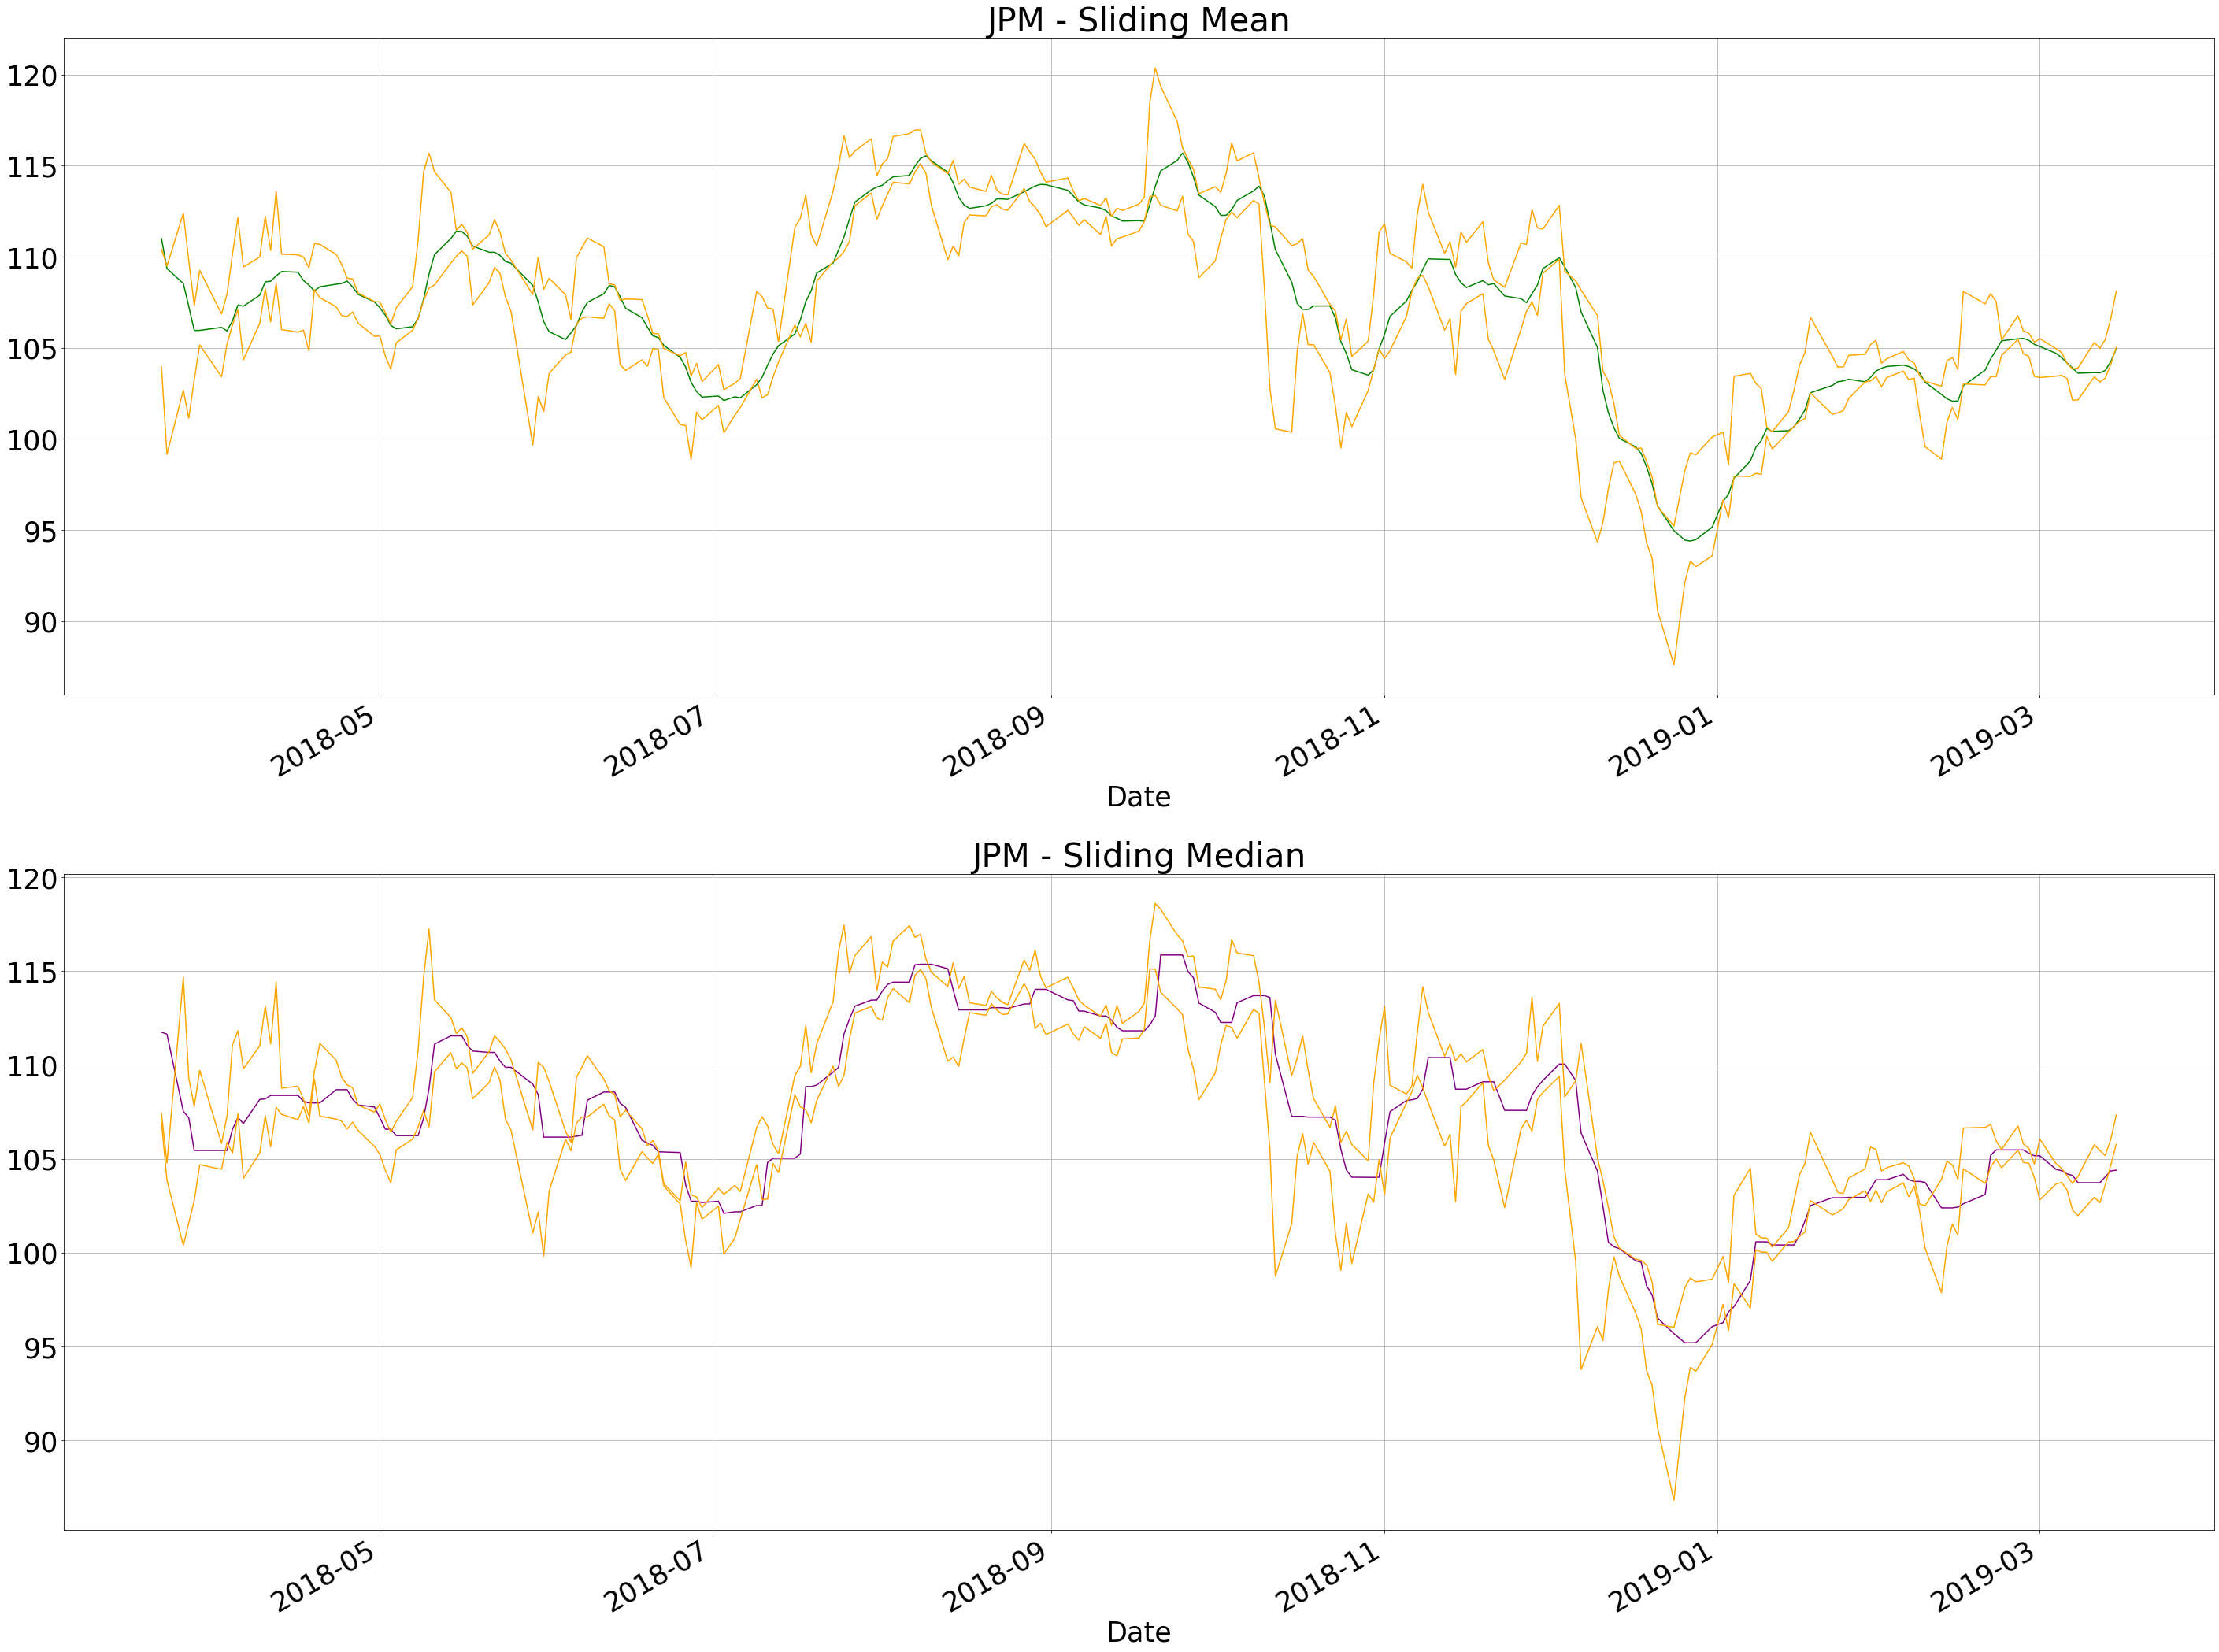

In [48]:
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(2, 1, 1)
JPM['Adj Close'].rolling(5).mean().plot(grid=True, title='JPM - Sliding Mean',  color='green')
UB = JPM['Adj Close'] + 1.5 * JPM['Adj Close'].rolling(5).std()
UB.plot(grid=True, title='JPM - Sliding Mean',  color='orange')
LB = JPM['Adj Close'] - 1.5 * JPM['Adj Close'].rolling(5).std()
LB.plot(grid=True, title='JPM - Sliding Mean',  color='orange')

plt.subplot(2, 1, 2)
JPM['Adj Close'].rolling(5).median().plot(grid=True, title='JPM - Sliding Standard Deviation', color='purple')
UB = JPM['Adj Close'] + 1.5 * JPM['Adj Close'].rolling(5).apply(robust.mad, raw=True)
UB.plot(grid=True, title='JPM - Sliding Median',  color='orange')
LB = JPM['Adj Close'] - 1.5 * JPM['Adj Close'].rolling(5).apply(robust.mad, raw=True)
LB.plot(grid=True, title='JPM - Sliding Median',  color='orange')

plt.tight_layout()

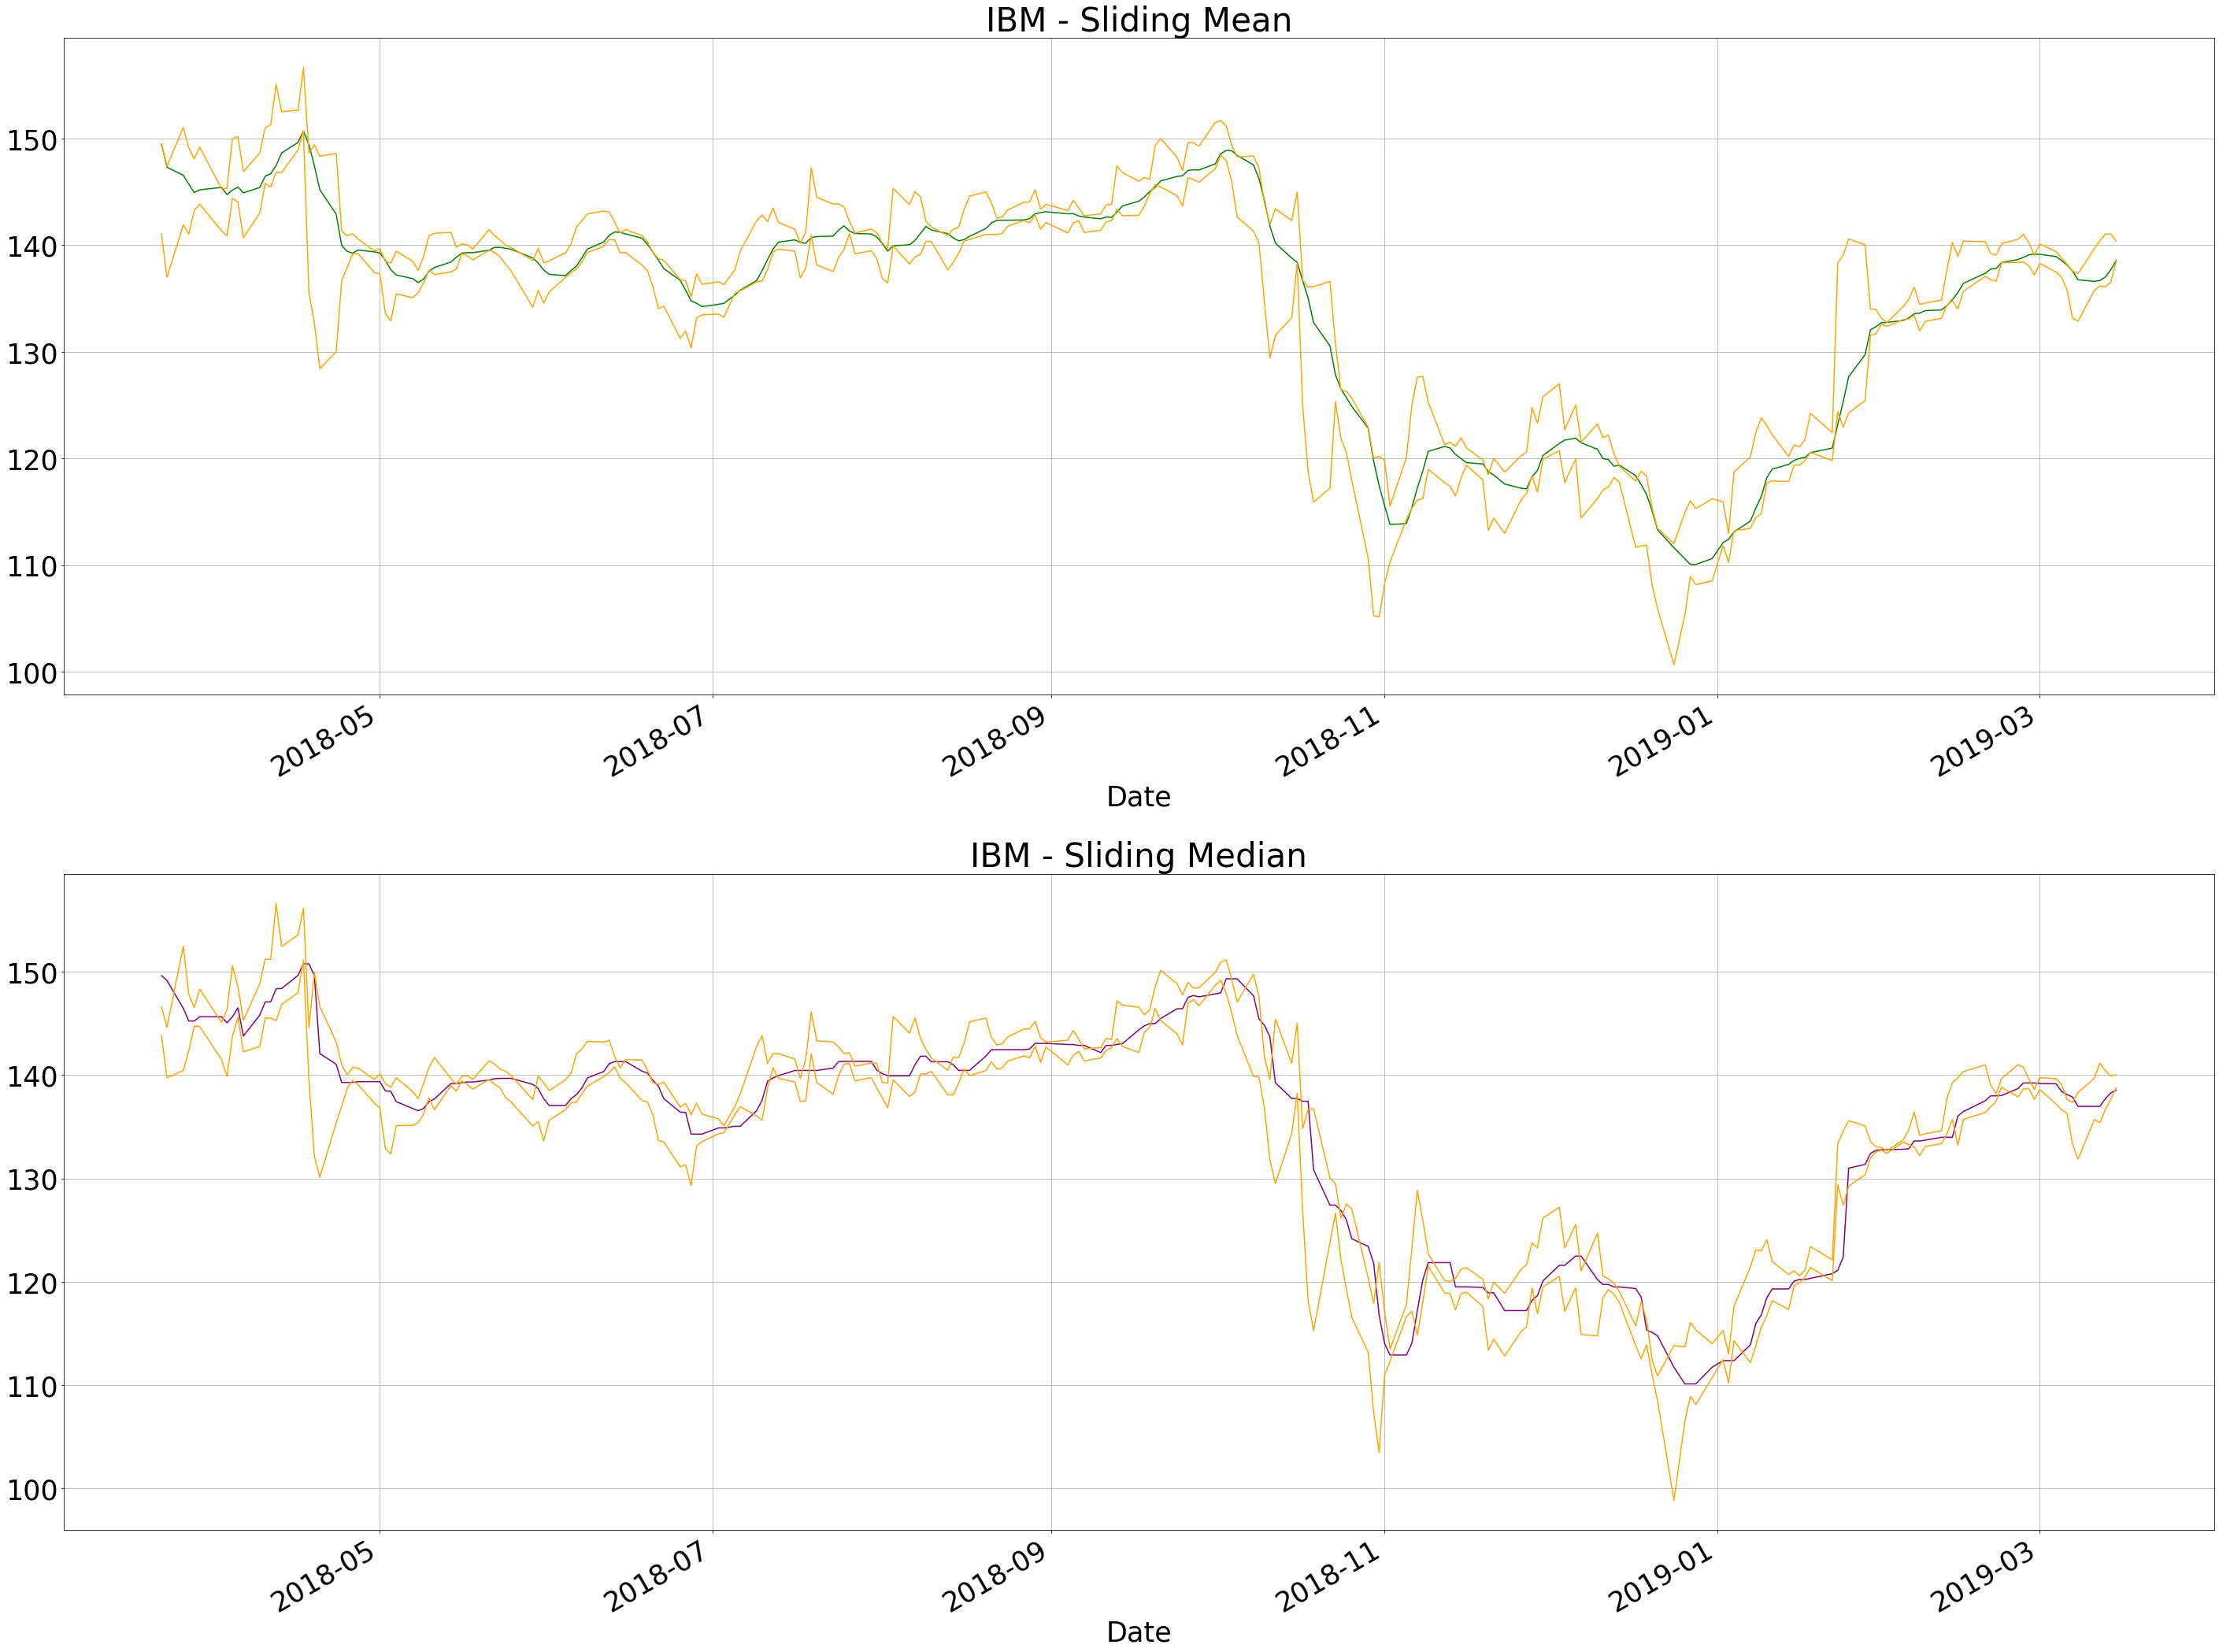

In [49]:
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(2, 1, 1)
IBM['Adj Close'].rolling(5).mean().plot(grid=True, title='IBM - Sliding Mean',  color='green')
UB = IBM['Adj Close'] + 1.5 * IBM['Adj Close'].rolling(5).std()
UB.plot(grid=True, title='IBM - Sliding Mean',  color='orange')
LB = IBM['Adj Close'] - 1.5 * IBM['Adj Close'].rolling(5).std()
LB.plot(grid=True, title='IBM - Sliding Mean',  color='orange')

plt.subplot(2, 1, 2)
IBM['Adj Close'].rolling(5).median().plot(grid=True, title='IBM - Sliding Standard Deviation', color='purple')
UB = IBM['Adj Close'] + 1.5 * IBM['Adj Close'].rolling(5).apply(robust.mad, raw=True)
UB.plot(grid=True, title='IBM - Sliding Median',  color='orange')
LB = IBM['Adj Close'] - 1.5 * IBM['Adj Close'].rolling(5).apply(robust.mad, raw=True)
LB.plot(grid=True, title='IBM - Sliding Median',  color='orange')

plt.tight_layout()

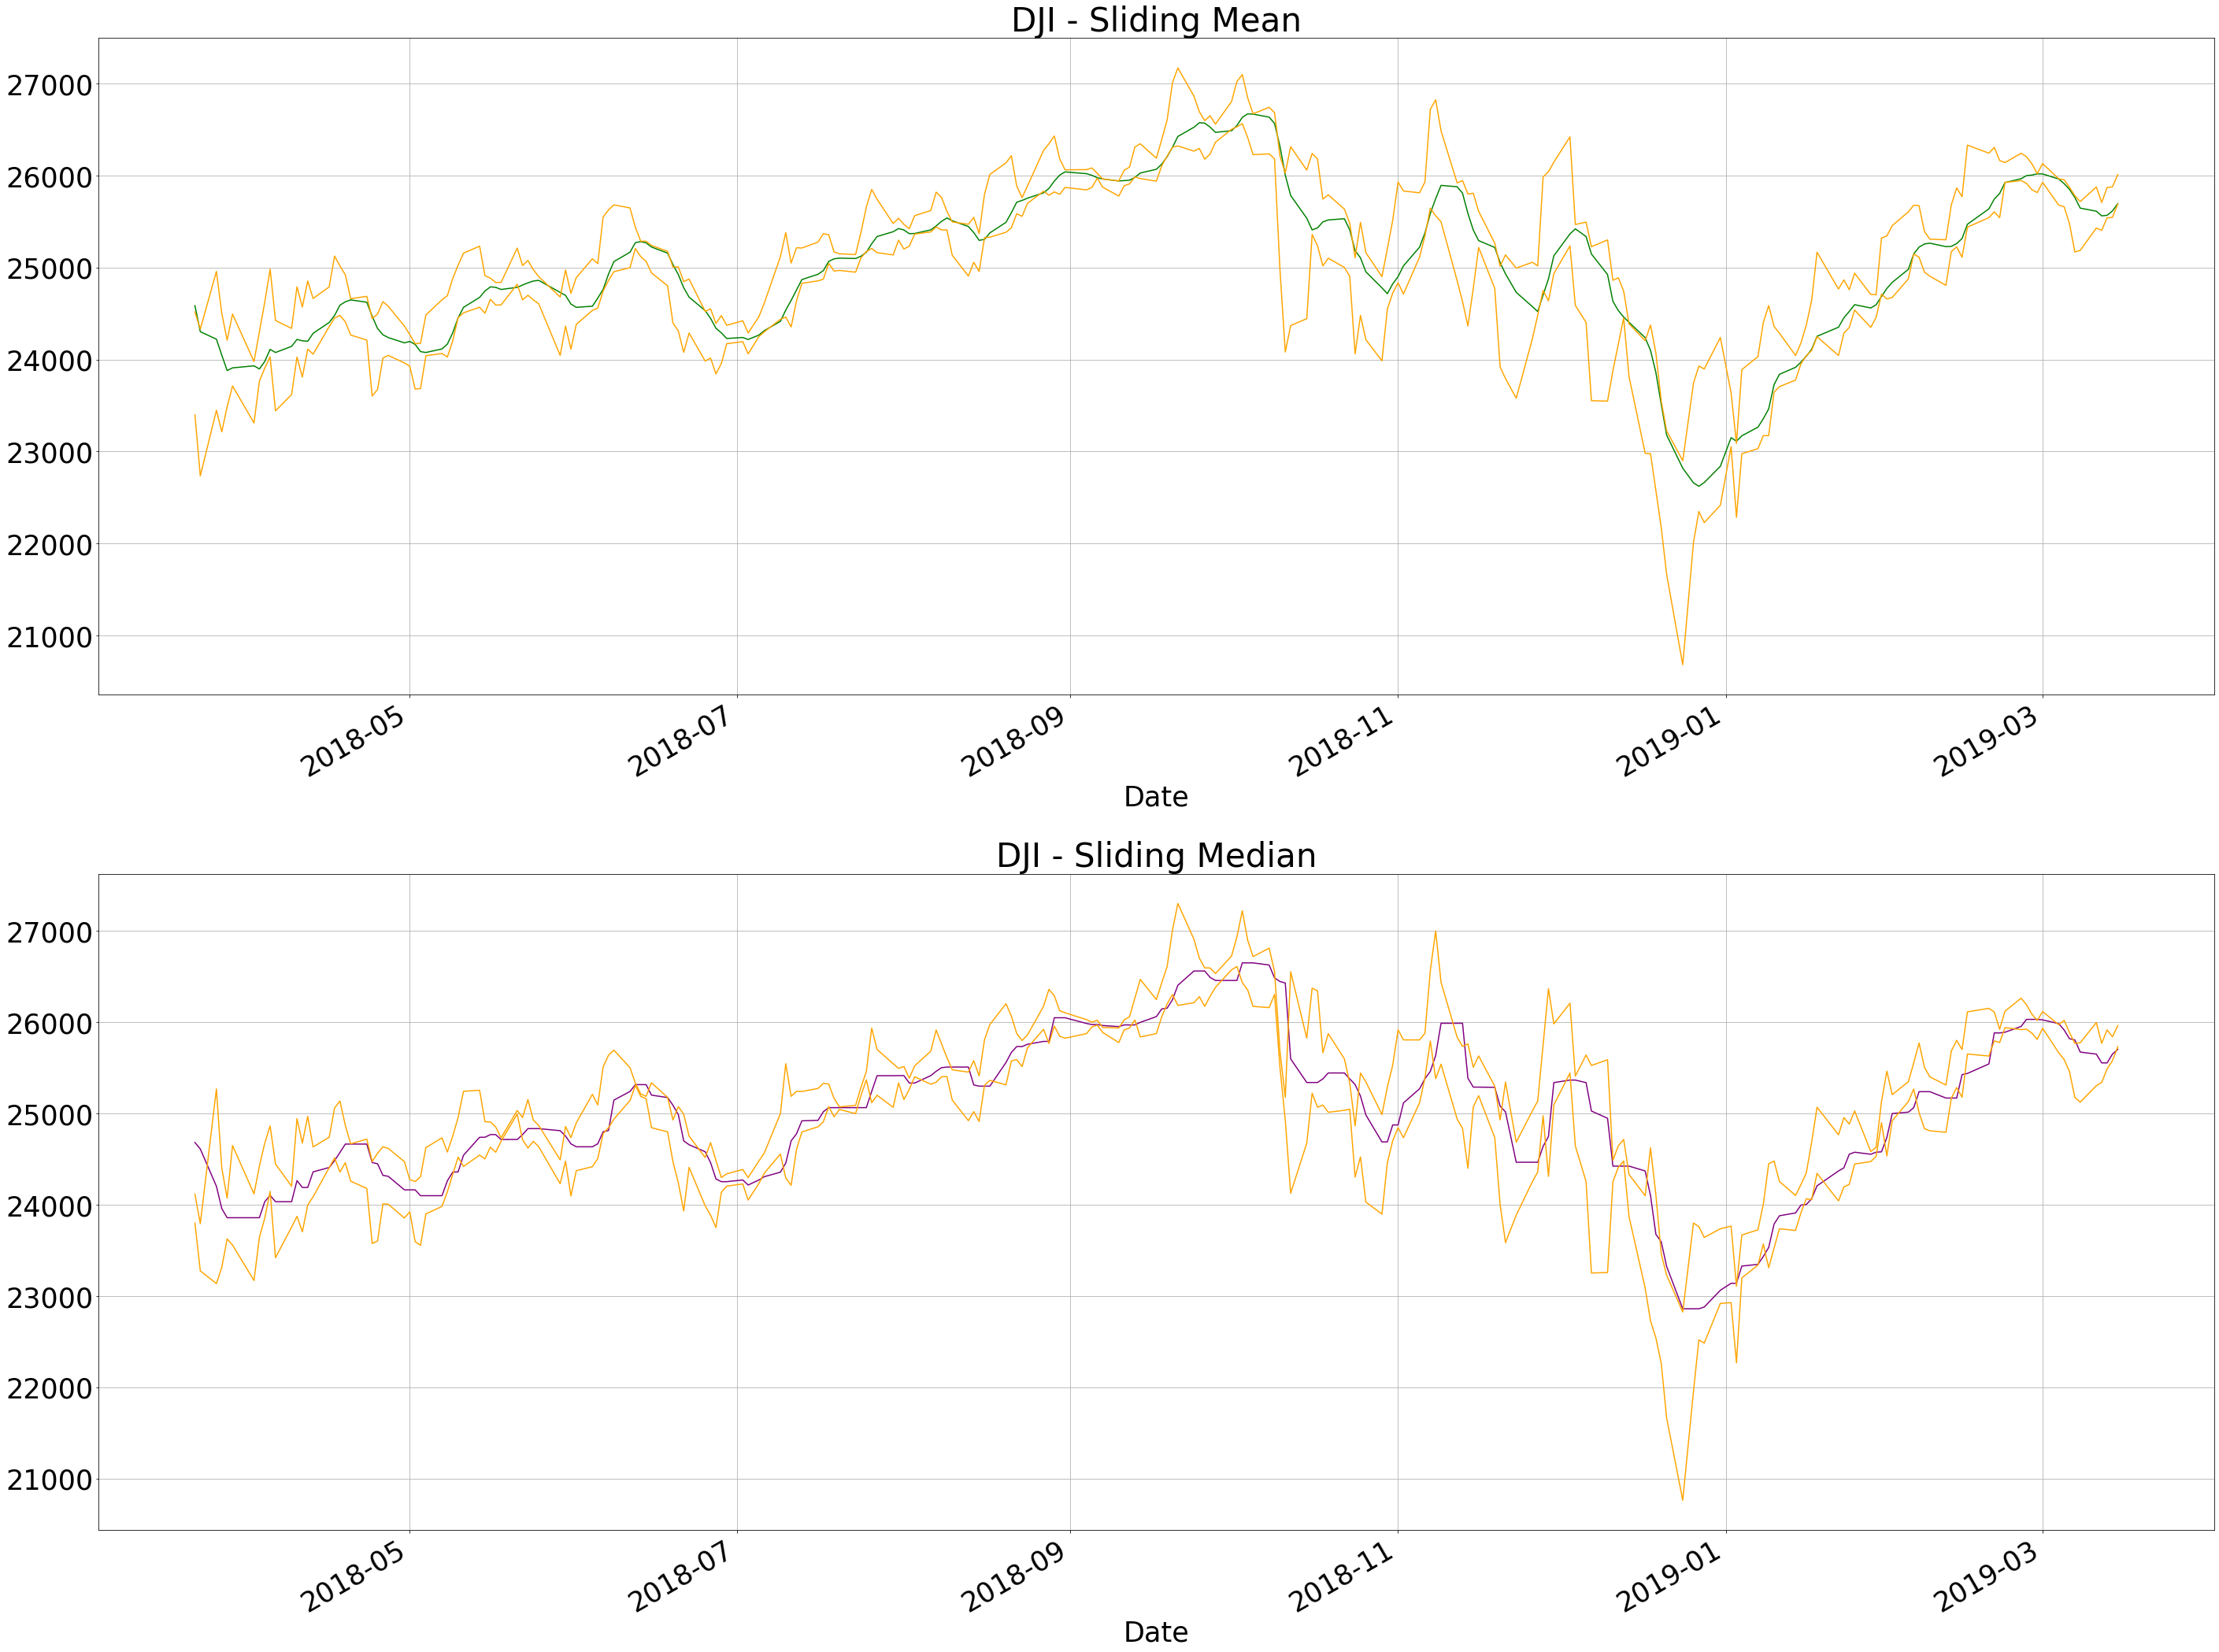

In [50]:
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(2, 1, 1)
DJI['Adj Close'].rolling(5).mean().plot(grid=True, title='DJI - Sliding Mean',  color='green')
UB = DJI['Adj Close'] + 1.5 * DJI['Adj Close'].rolling(5).std()
UB.plot(grid=True, title='DJI - Sliding Mean',  color='orange')
LB = DJI['Adj Close'] - 1.5 * DJI['Adj Close'].rolling(5).std()
LB.plot(grid=True, title='DJI - Sliding Mean',  color='orange')

plt.subplot(2, 1, 2)
DJI['Adj Close'].rolling(5).median().plot(grid=True, title='DJI - Sliding Standard Deviation', color='purple')
UB = DJI['Adj Close'] + 1.5 * DJI['Adj Close'].rolling(5).apply(robust.mad, raw=True)
UB.plot(grid=True, title='DJI - Sliding Median',  color='orange')
LB = DJI['Adj Close'] - 1.5 * DJI['Adj Close'].rolling(5).apply(robust.mad, raw=True)
LB.plot(grid=True, title='DJI - Sliding Median',  color='orange')

plt.tight_layout()

### 4.1.4 Robustness against outliers

In [51]:
print('Outlier value: ' + str(1.2 * AAPL['Adj Close'].max()))
AAPL.loc['2018-05-14', 'Adj Close'] = 276.3305784
AAPL.loc['2018-09-14', 'Adj Close'] = 276.3305784
AAPL.loc['2018-12-14', 'Adj Close'] = 276.3305784
AAPL.loc['2019-01-14', 'Adj Close'] = 276.3305784

Outlier value: 276.3305784


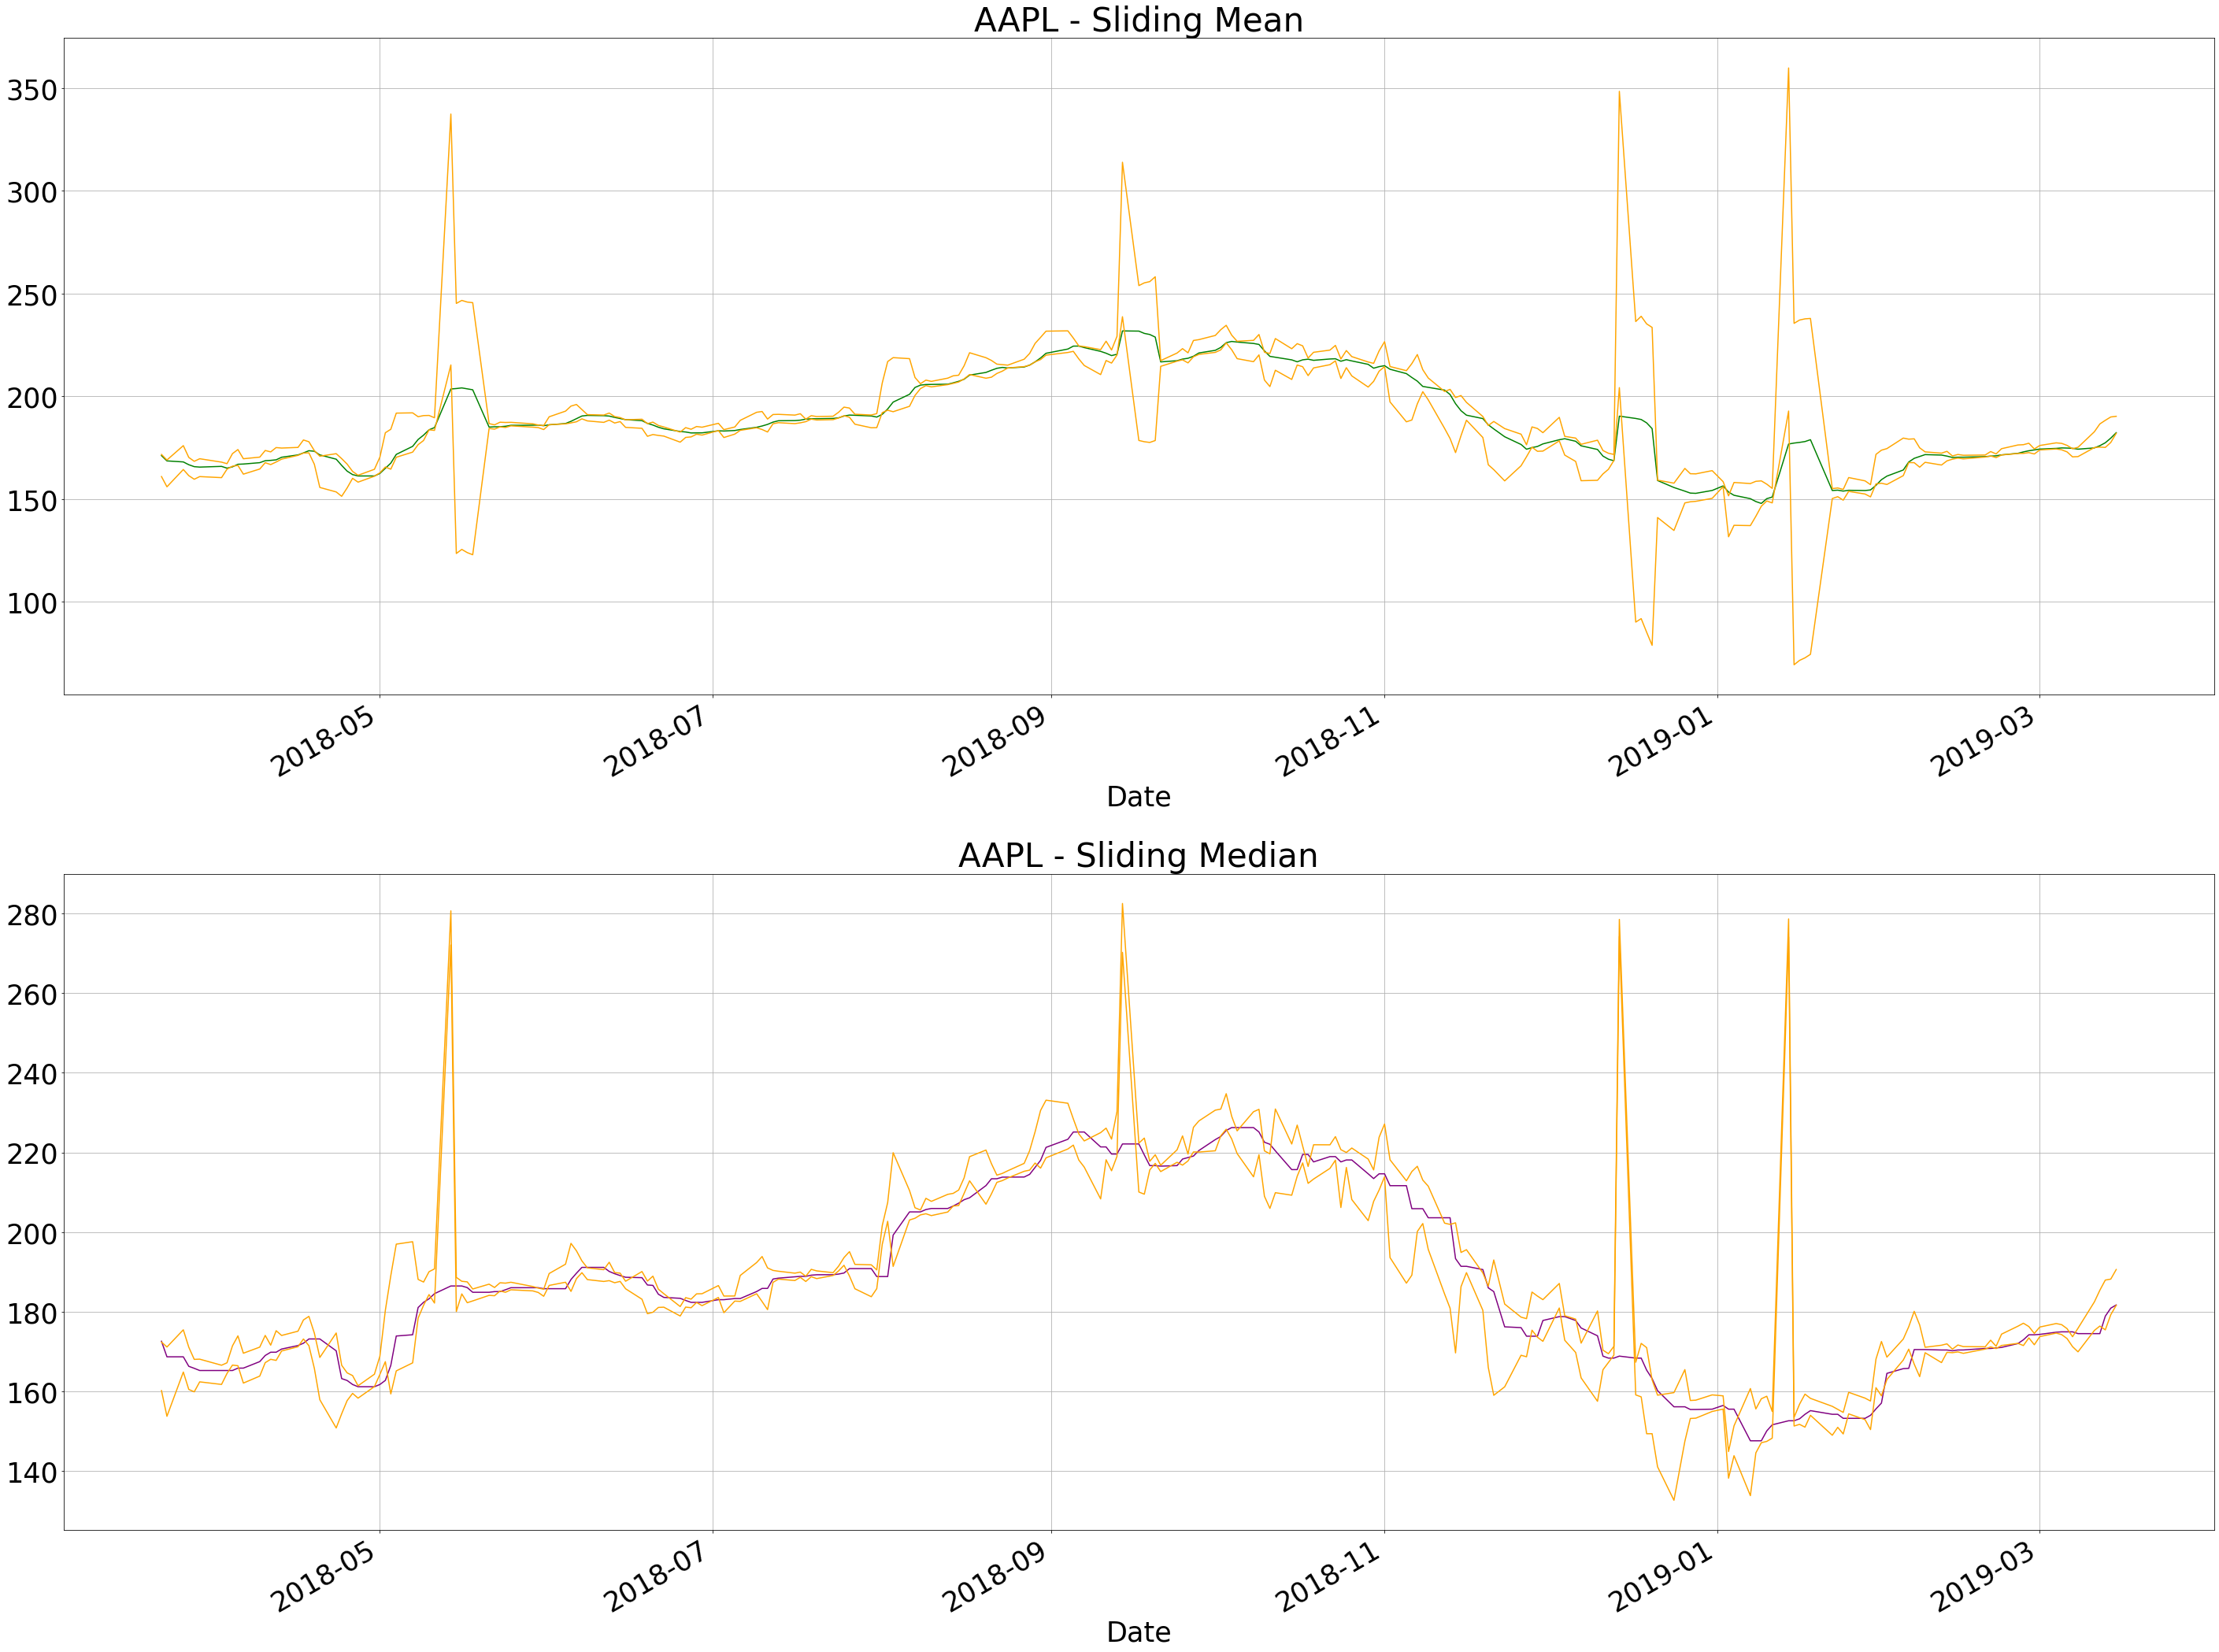

In [52]:
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})

plt.subplot(2, 1, 1)
AAPL['Adj Close'].rolling(5).mean().plot(grid=True, title='AAPL - Sliding Mean',  color='green')
UB = AAPL['Adj Close'] + 1.5 * AAPL['Adj Close'].rolling(5).std()
UB.plot(grid=True, title='AAPL - Sliding Mean',  color='orange')
LB = AAPL['Adj Close'] - 1.5 * AAPL['Adj Close'].rolling(5).std()
LB.plot(grid=True, title='AAPL - Sliding Mean',  color='orange')

plt.subplot(2, 1, 2)
AAPL['Adj Close'].rolling(5).median().plot(grid=True, title='AAPL - Sliding Standard Deviation', color='purple')
UB = AAPL['Adj Close'] + 1.5 * AAPL['Adj Close'].rolling(5).apply(robust.mad, raw=True)
UB.plot(grid=True, title='AAPL - Sliding Median',  color='orange')
LB = AAPL['Adj Close'] - 1.5 * AAPL['Adj Close'].rolling(5).apply(robust.mad, raw=True)
LB.plot(grid=True, title='AAPL - Sliding Median',  color='orange')

plt.tight_layout()

### 4.1.5 Box plot analysis

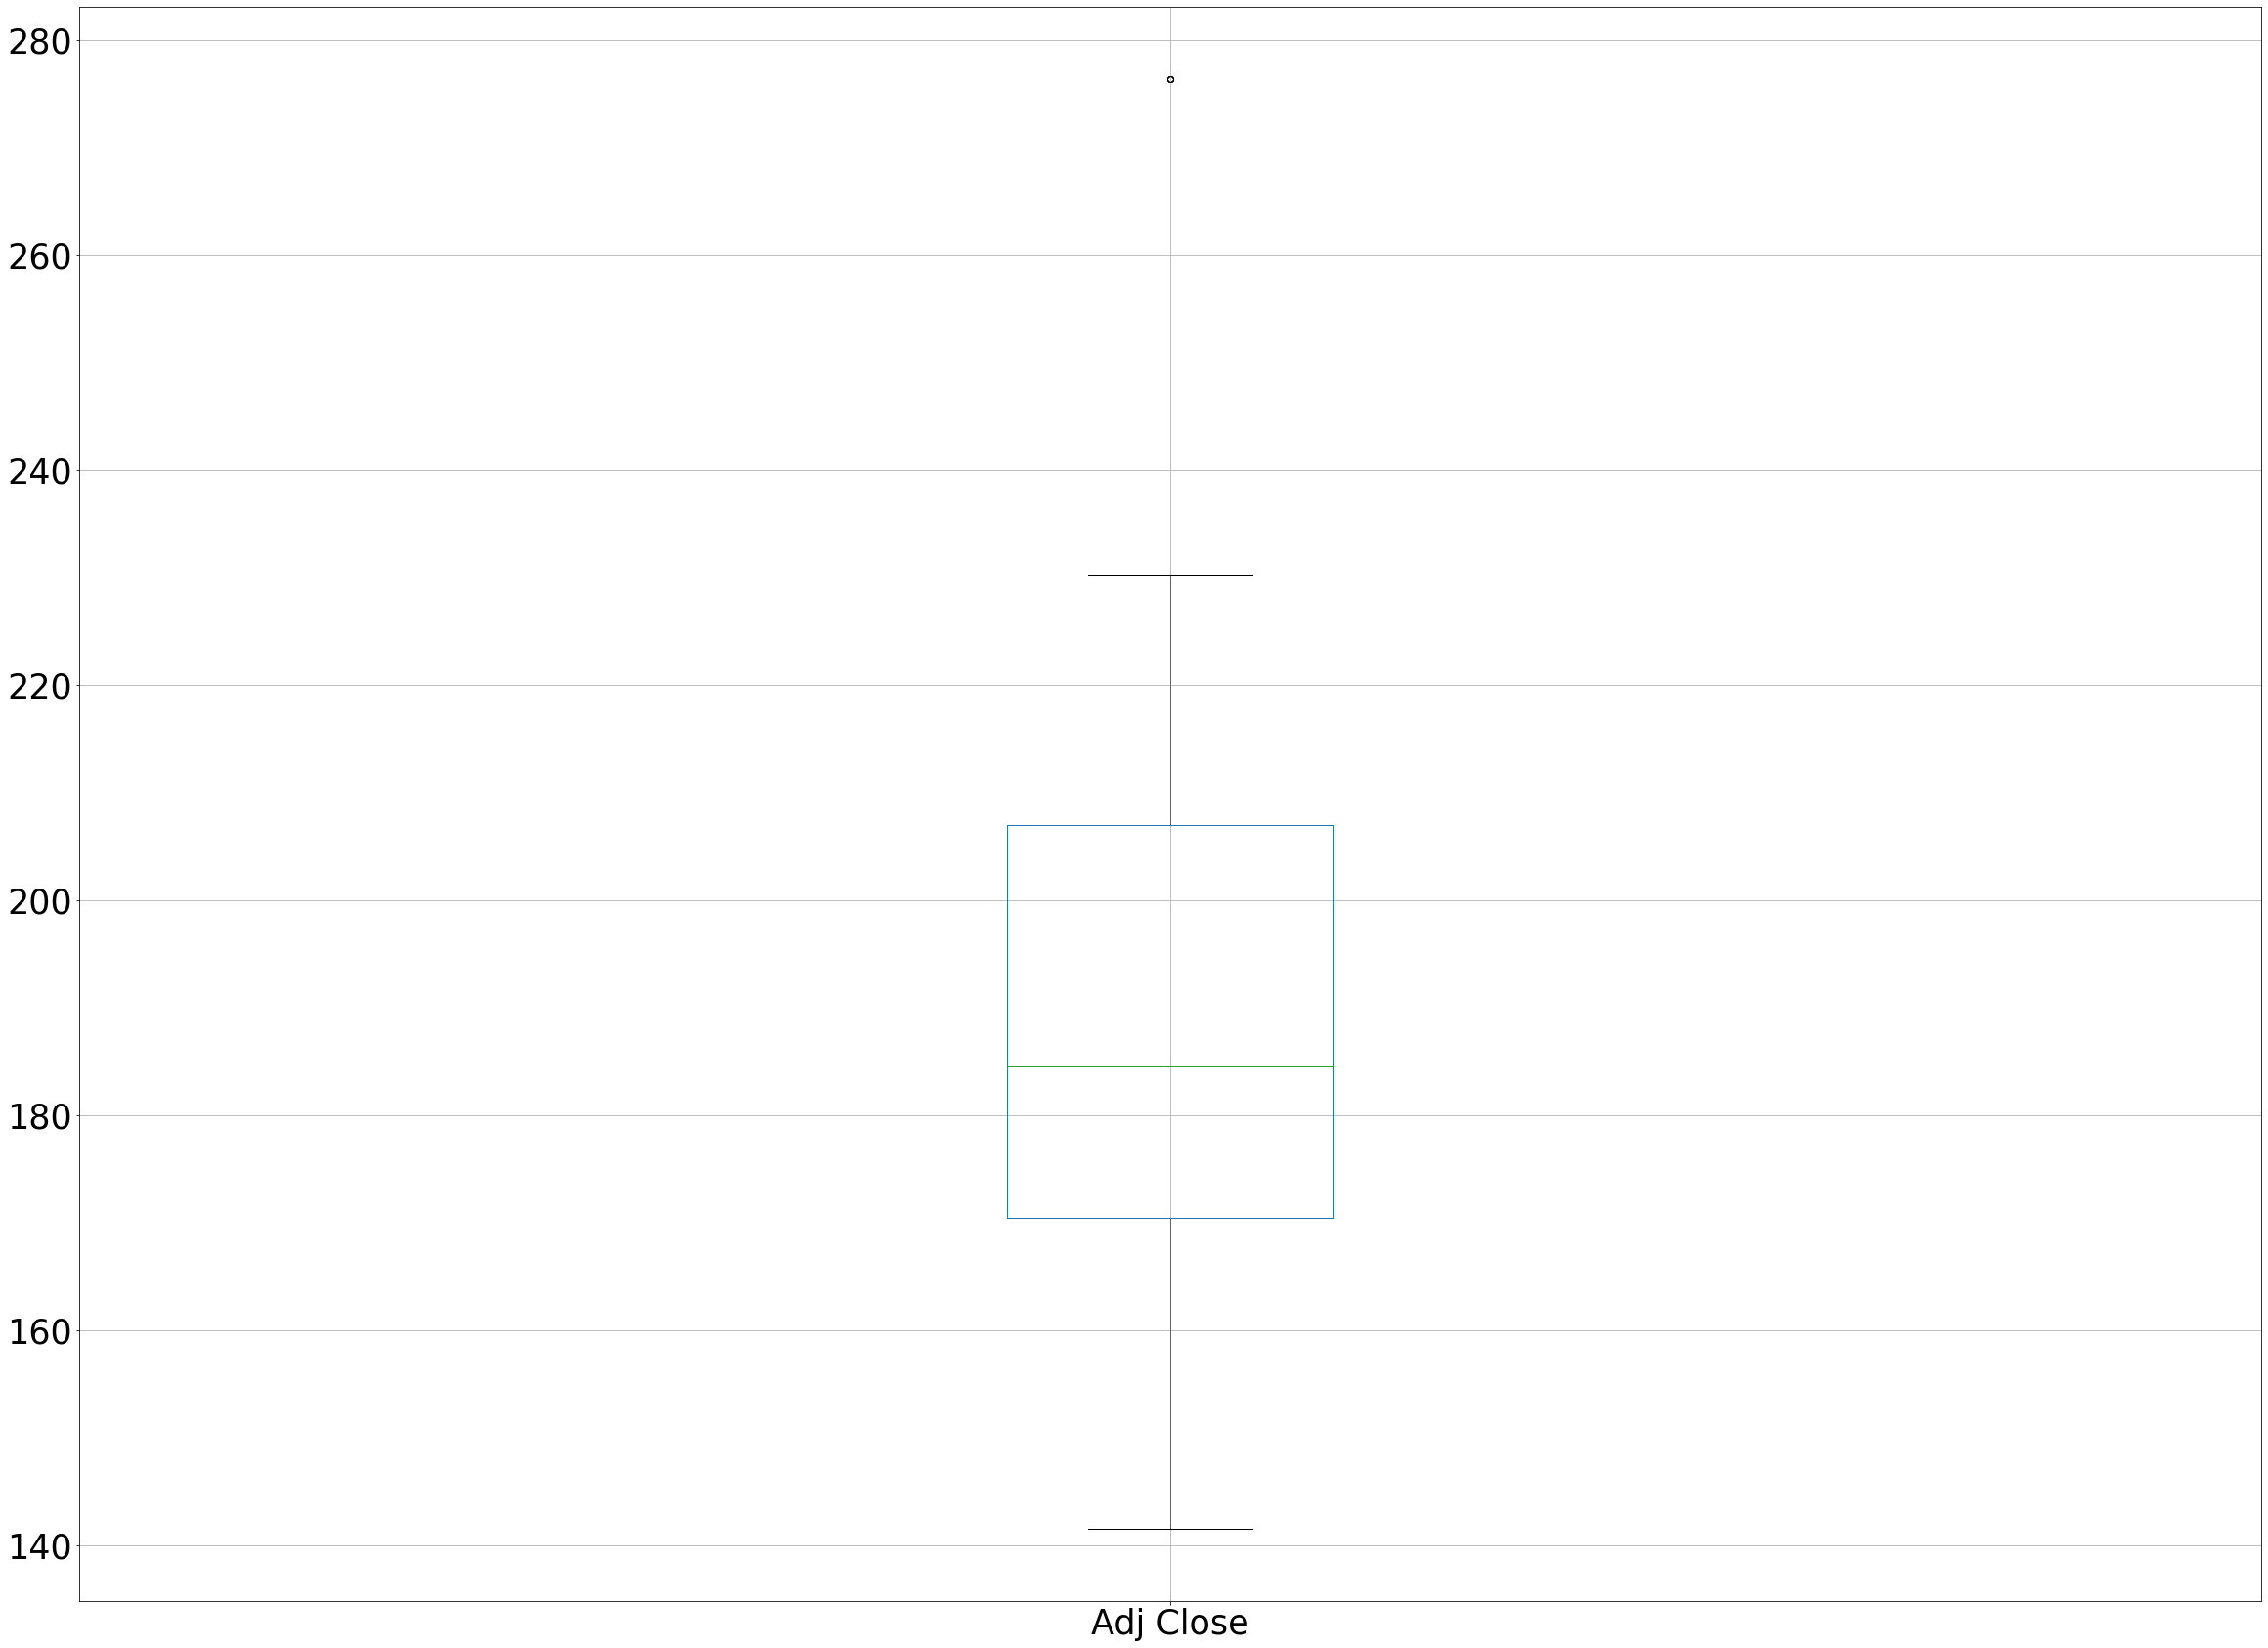

In [53]:
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})
boxplot = AAPL.boxplot(column=['Adj Close'])  

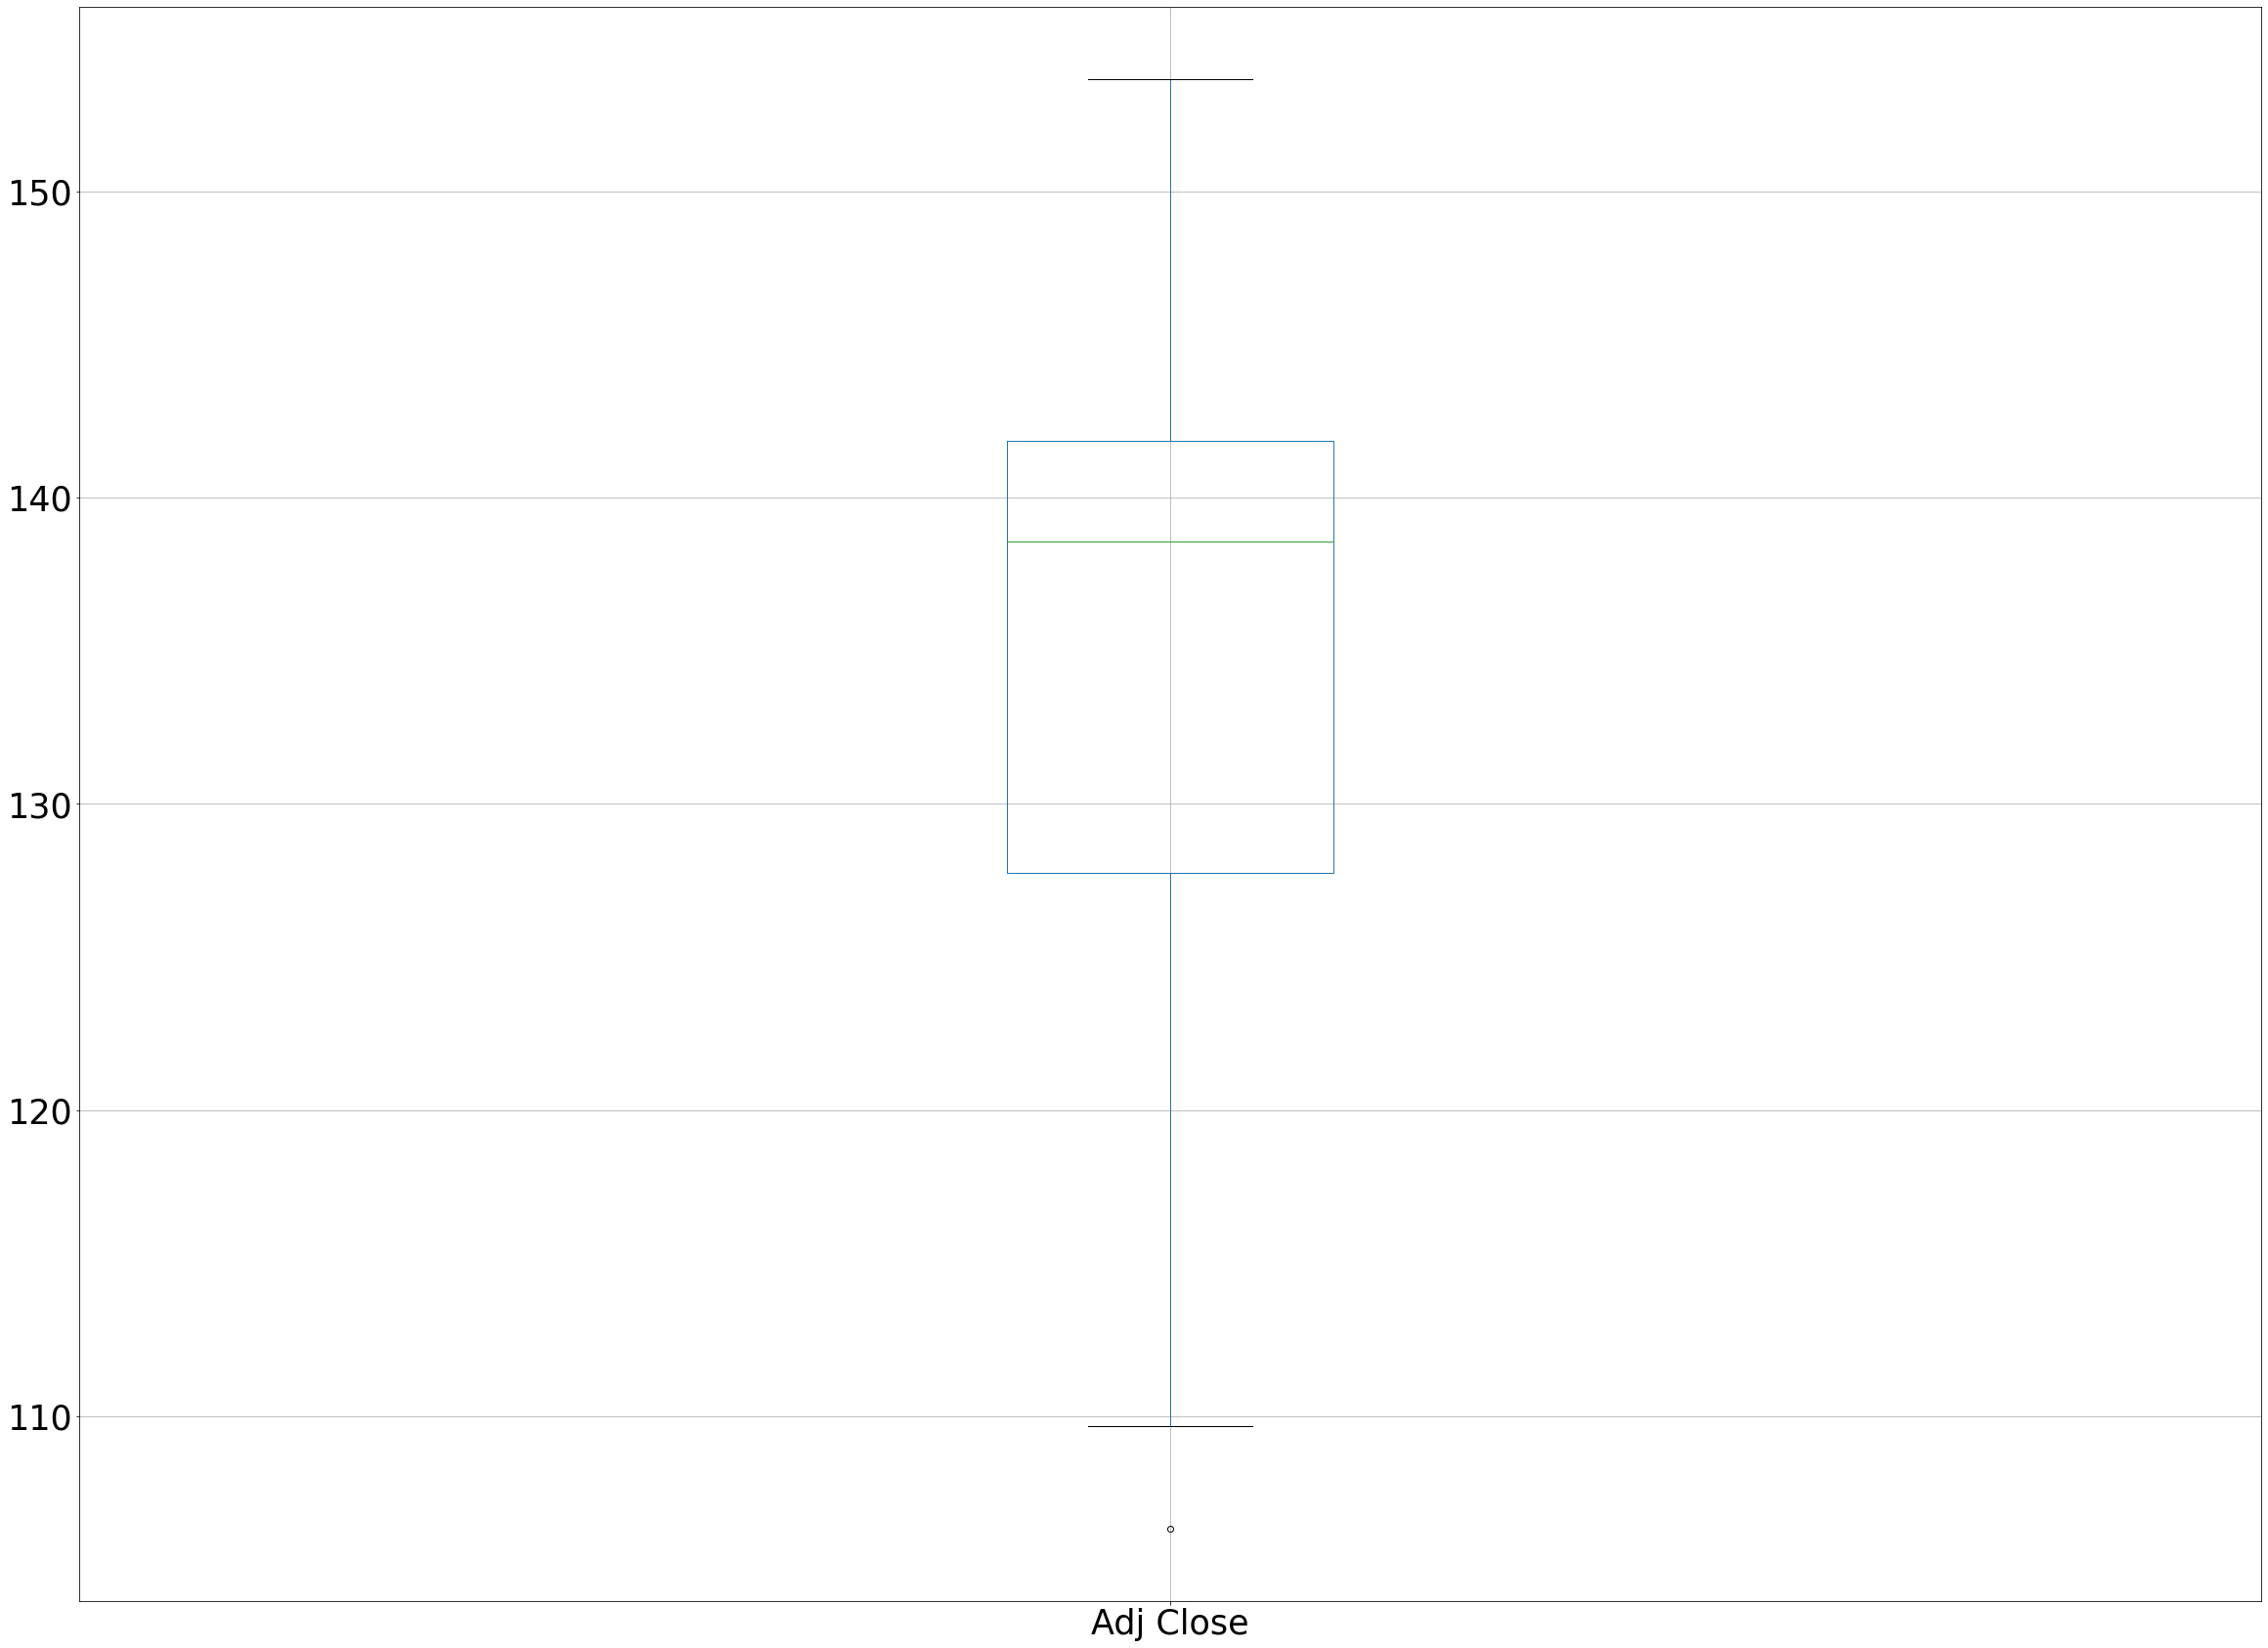

In [54]:
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})
boxplot = IBM.boxplot(column=['Adj Close']) 

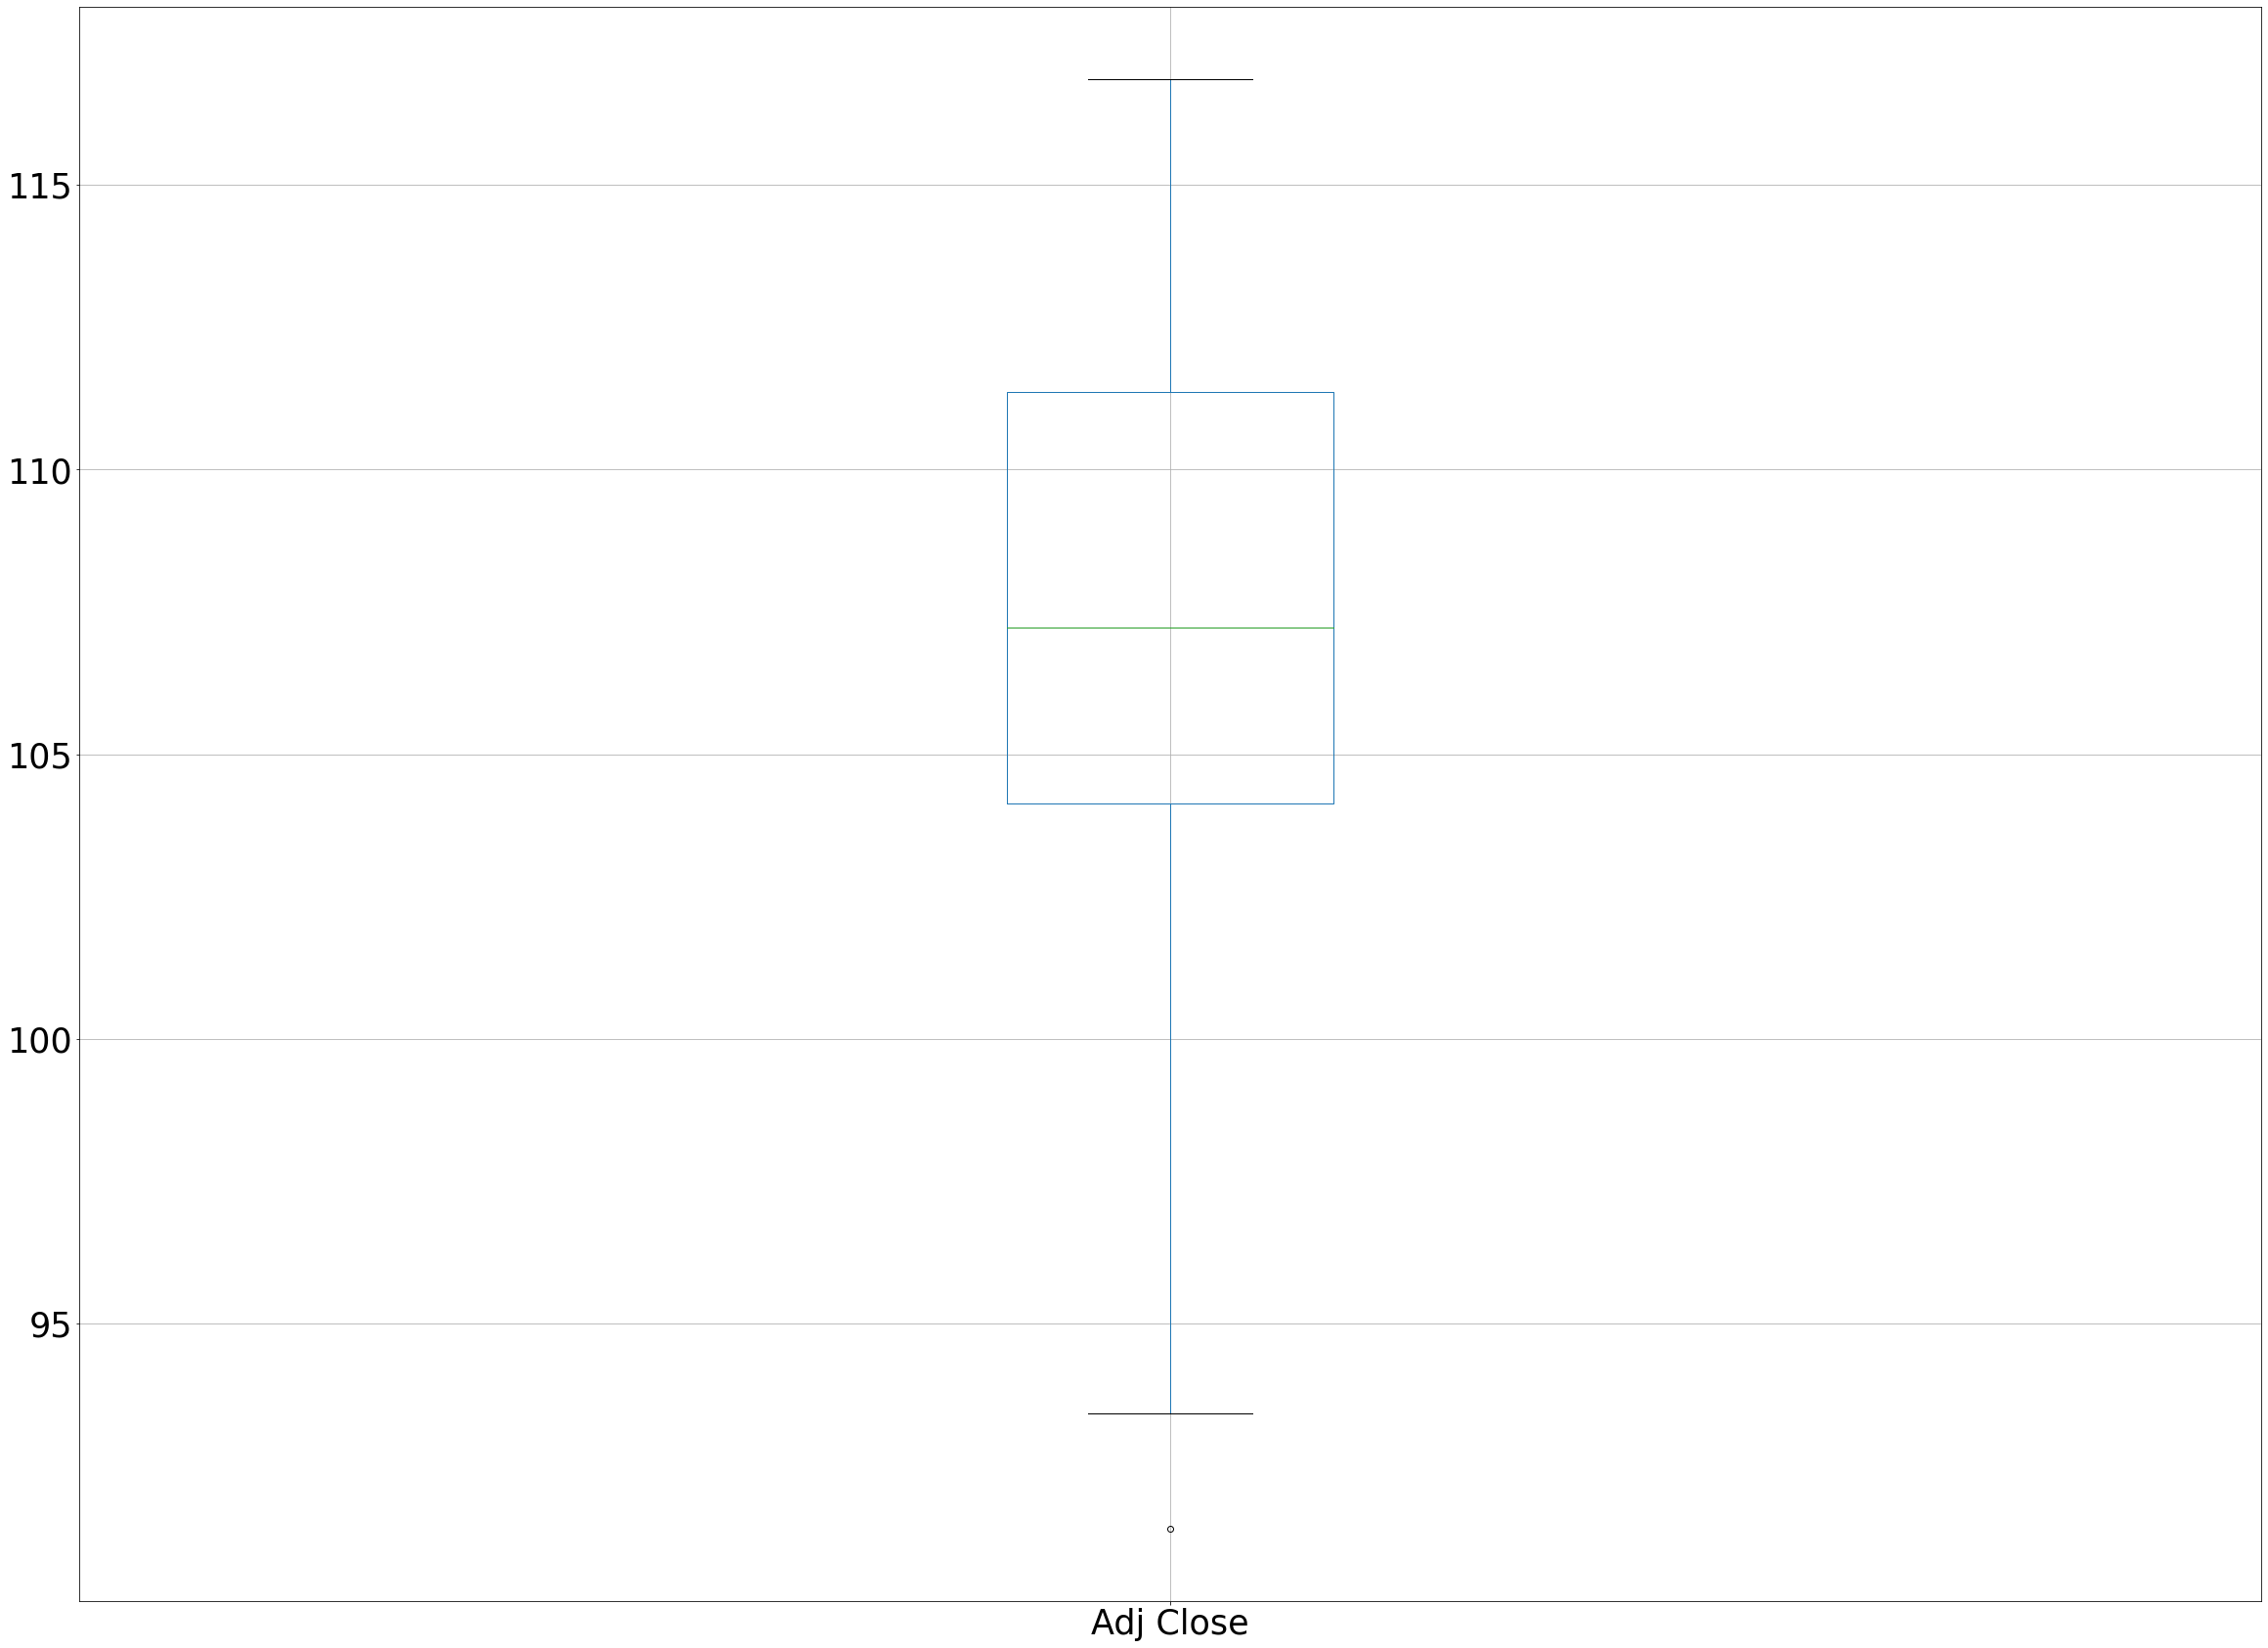

In [55]:
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})
boxplot = JPM.boxplot(column=['Adj Close']) 

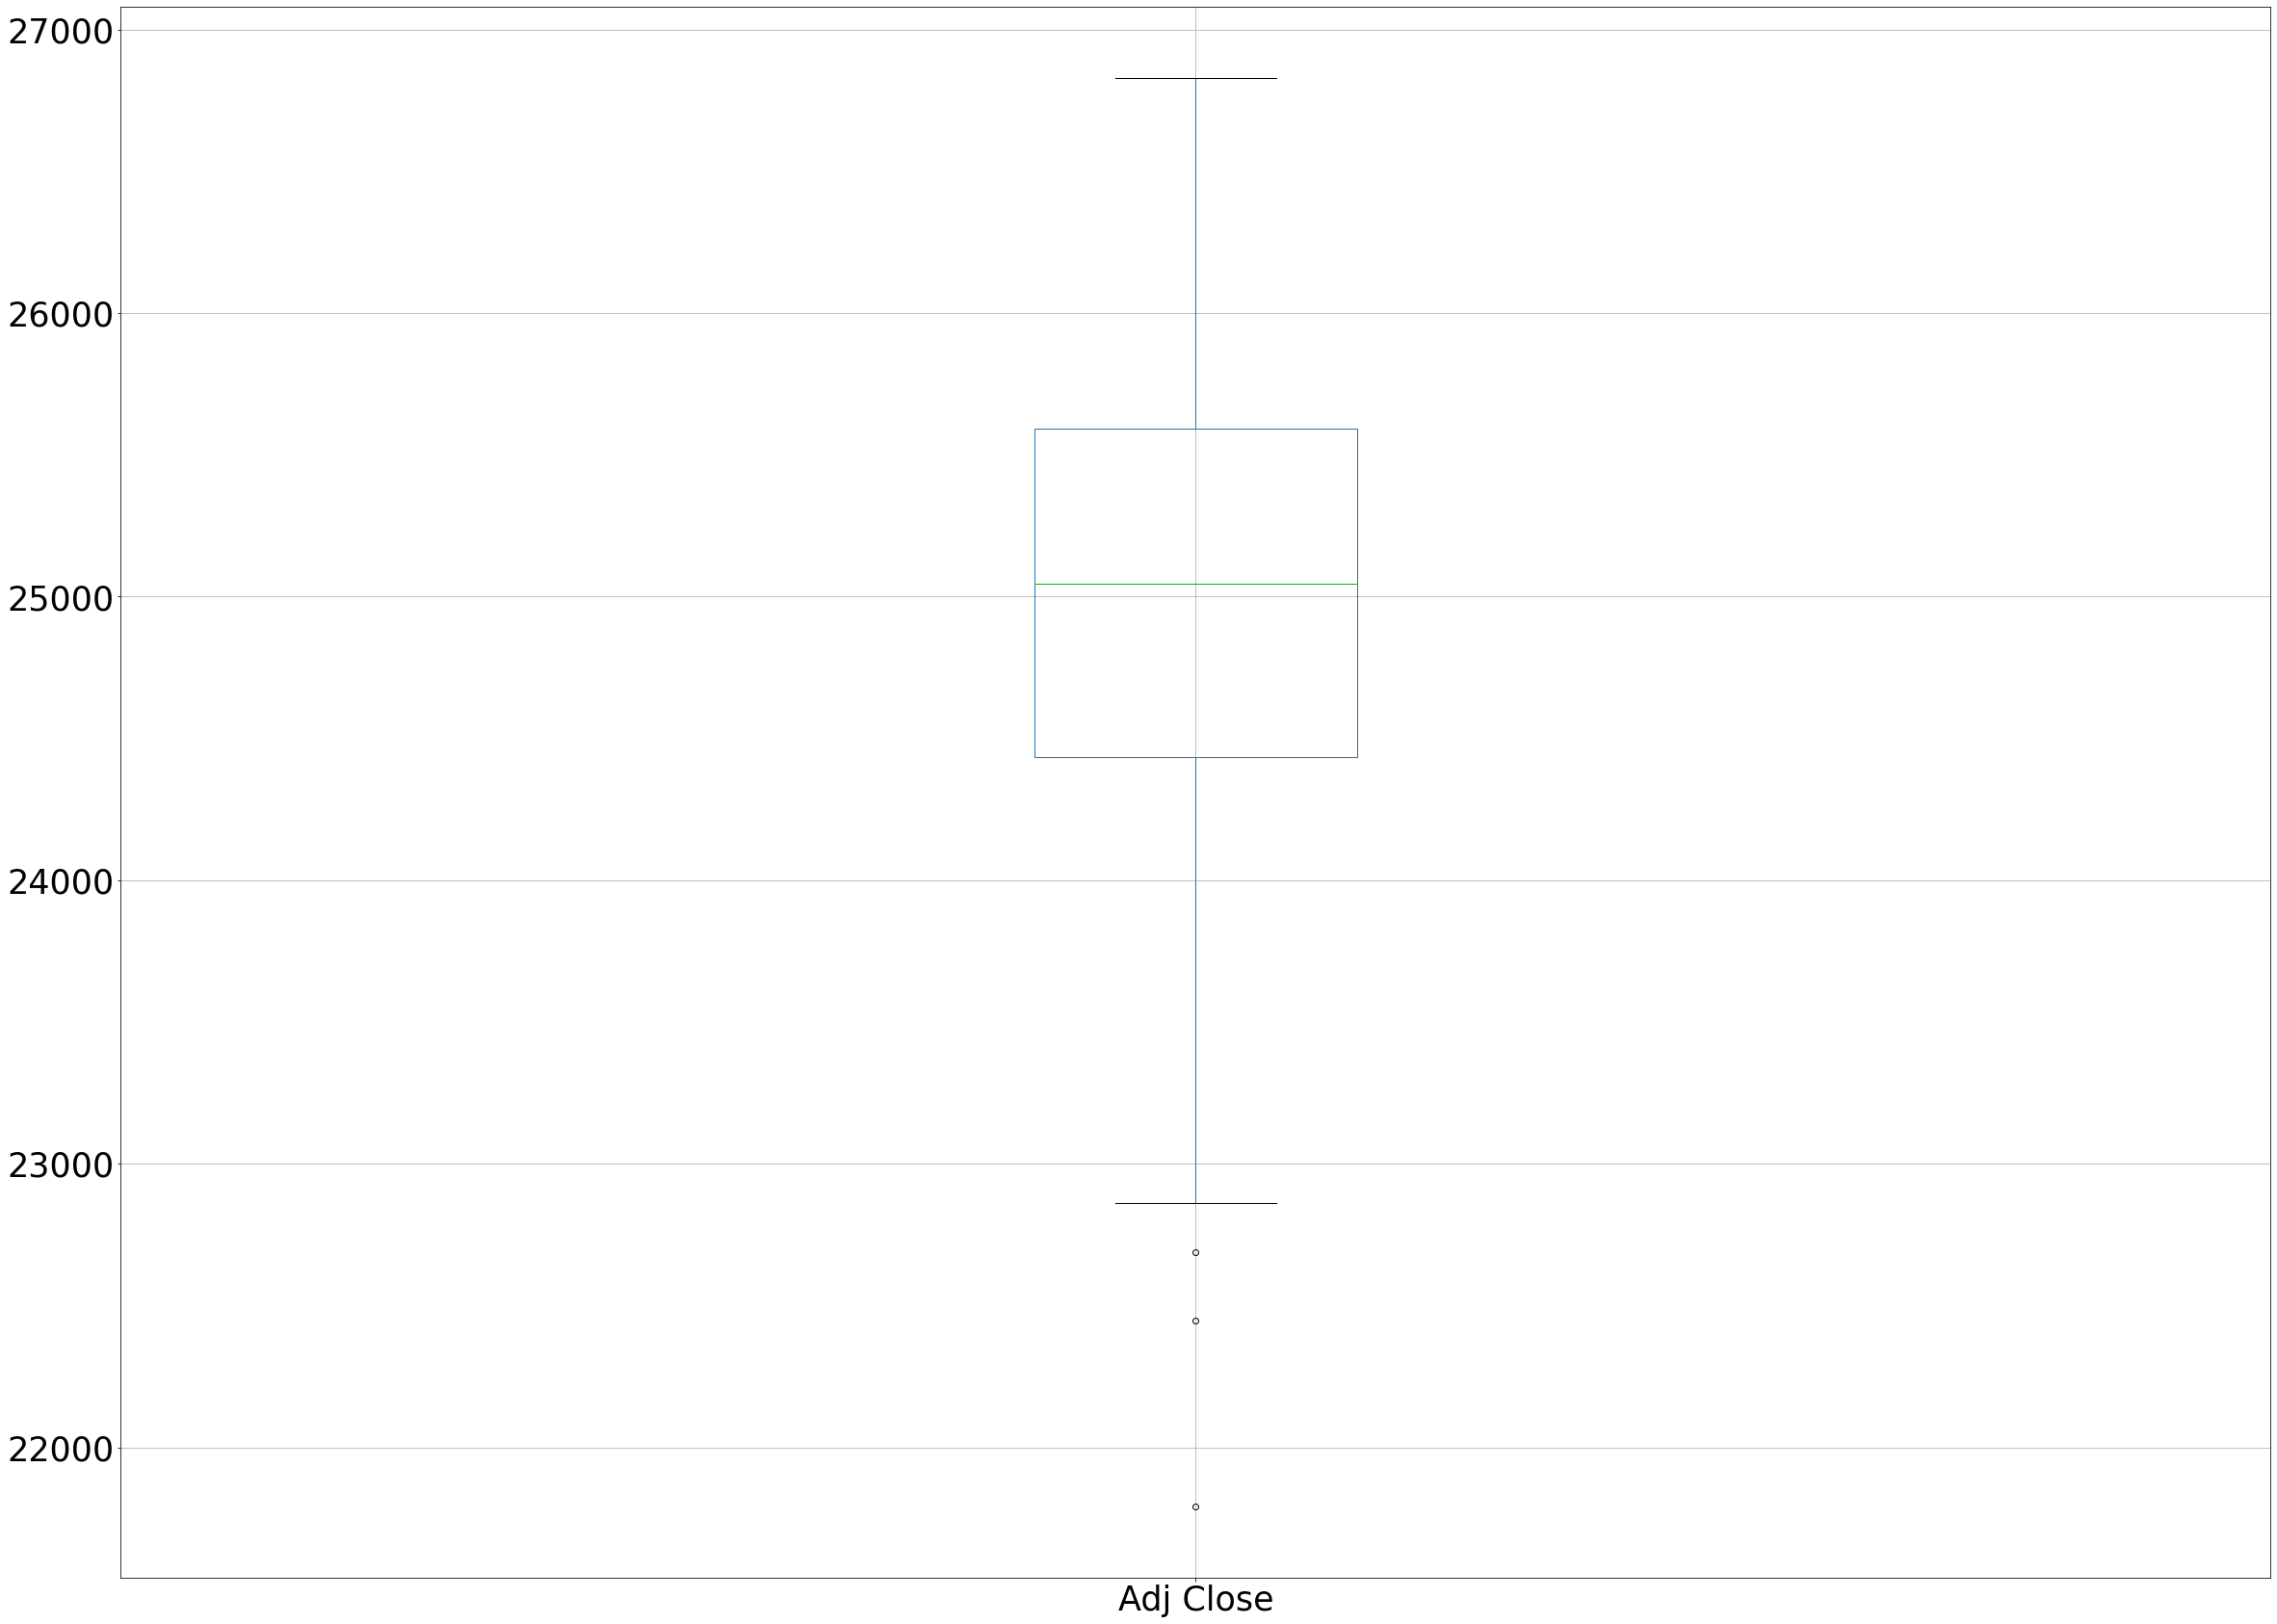

In [56]:
fig = plt.gcf()
fig.set_size_inches(40, 30)
matplotlib.rcParams.update({'font.size': 35})
boxplot = DJI.boxplot(column=['Adj Close']) 

## 4.2 Robust Estimators

### 4.2.1 Custom robust estimators

In [57]:
def i_median(data):
    data = data.sort_values() 
    if len(data) % 2 == 0:
        return data[int(len(data) / 2)]
    else:
        LB = data[int(len(data) / 2) - 1] 
        UB = data[int(len(data) / 2)]
        return (LB + UB) / 2       
def i_mad(data):
    delta = abs(data - i_median(data))
    return i_median(delta) 
def i_iqr(data):
    data = data.sort_values() 
    if len(data) % 2 == 0:
        q1 = data[int(len(data) / 4)]
        q3 = data[int(len(data) * 3 / 4)] 
        return q3 - q1
    else:
        q1_LB = data[int(len(data) / 4) - 1]
        q1_UB = data[int(len(data) / 4)]
        q3_LB = data[int(len(data) * 3 / 4) - 1] 
        q3_UB = data[int(len(data) * 3 / 4)] 
        return (q3_LB + q3_UB) / 2 - (q1_LB + q1_UB) / 2   

In [58]:
cmp = pd.DataFrame(columns = ['Built-in Median', 'Built-in IQR', 'Built-in Mad', 'Custom Median', 'Custom IQR', 'Custom Mad'], index = tickers)
adj_close_data = pd.DataFrame(columns = tickers)
for ticker in tickers:
    adj_close_data[ticker] = all_stocks[ticker]['Adj Close'].copy()
    data = adj_close_data[ticker].copy()
    cmp.loc[ticker] = [data.median(), iqr(data), robust.mad(data), i_median(data), i_iqr(data), i_mad(data)]
display(cmp)

Built-in Median Built-in IQR Built-in Mad Custom Median   Custom IQR  \
AAPL      184.549835    36.576599     23.23846    184.480469    36.676621   
IBM       138.566391    14.103938     6.662095    138.563195    14.684692   
JPM       107.219269     7.222442      5.11521    107.207867     7.287441   
DJI     25044.289063  1158.155273   875.803825  25035.679688  1171.695312   

      Custom Mad  
AAPL   15.577713  
IBM     4.467422  
JPM     3.443718  
DJI   589.875001

### 4.2.2 Complexity of custom estimators 

*See report.*

### 4.2.3 Breakdown points analysis

*See report.*

## 4.3 Huber and OLS Regression

### 4.3.1 Ordinary least squares (OLS) regression

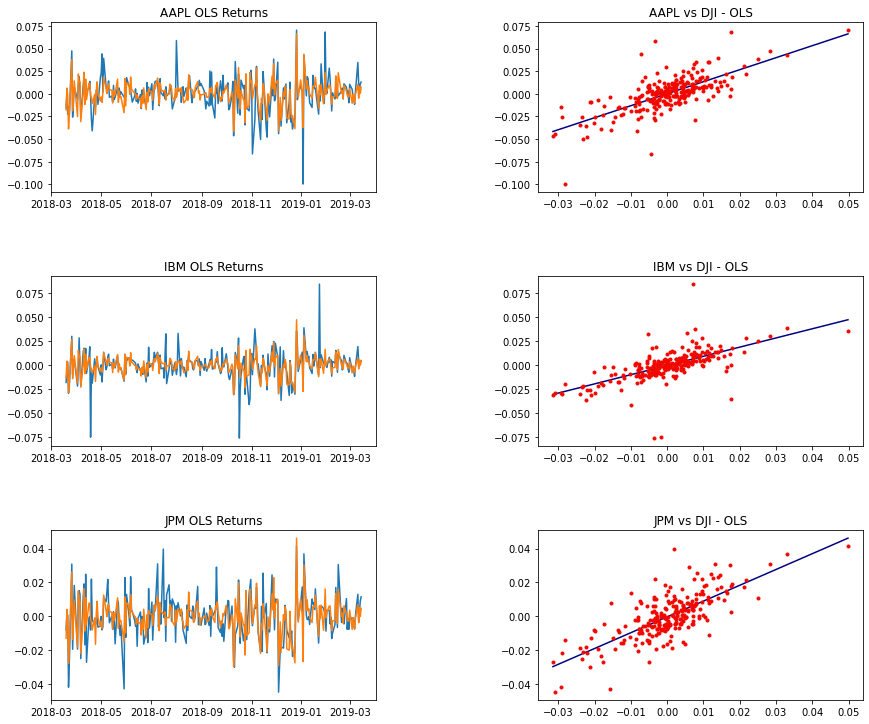

In [59]:
color1 = CMAP_OBJ(0)
color2 = CMAP_OBJ(0.9)
i = 0

returns = pd.DataFrame(columns = tickers)

for ticker in tickers:
    returns[ticker] = all_stocks[ticker]['Returns'].copy().dropna()
    
regression_model = linear_model.LinearRegression()
r = returns['DJI'].copy().values.reshape(-1,1)
linspace = np.linspace(r.min(), r.max())

matplotlib.rcParams.update({'font.size': 10})
fig, axes = subplot_init(3, 2, fig_size = (10, 12)) 
for ticker in tickers:
    y = returns[ticker].copy().values.reshape(-1, 1)
    regression_model.fit(r, y)
    if ticker != 'DJI':
        ax0 = axes[i][0]
        ax1 = axes[i][1]
        predictions = regression_model.predict(r)
        ax0.plot(returns[ticker].index, y)
        ax0.plot(returns[ticker].index, predictions)
        model = regression_model.fit(r, y.ravel())
        coefficients = model.coef_ * linspace + model.intercept_
        ax1.plot(linspace, coefficients, color = color1)
        ax1.plot(r, y, '.', color = color2)
        i += 1
        
axes[0][0].title.set_text('AAPL OLS Returns')
axes[0][1].title.set_text('AAPL vs DJI - OLS')
axes[1][0].title.set_text('IBM OLS Returns')
axes[1][1].title.set_text('IBM vs DJI - OLS')
axes[2][0].title.set_text('JPM OLS Returns')
axes[2][1].title.set_text('JPM vs DJI - OLS')

### 4.3.2 Huber (robust) regression

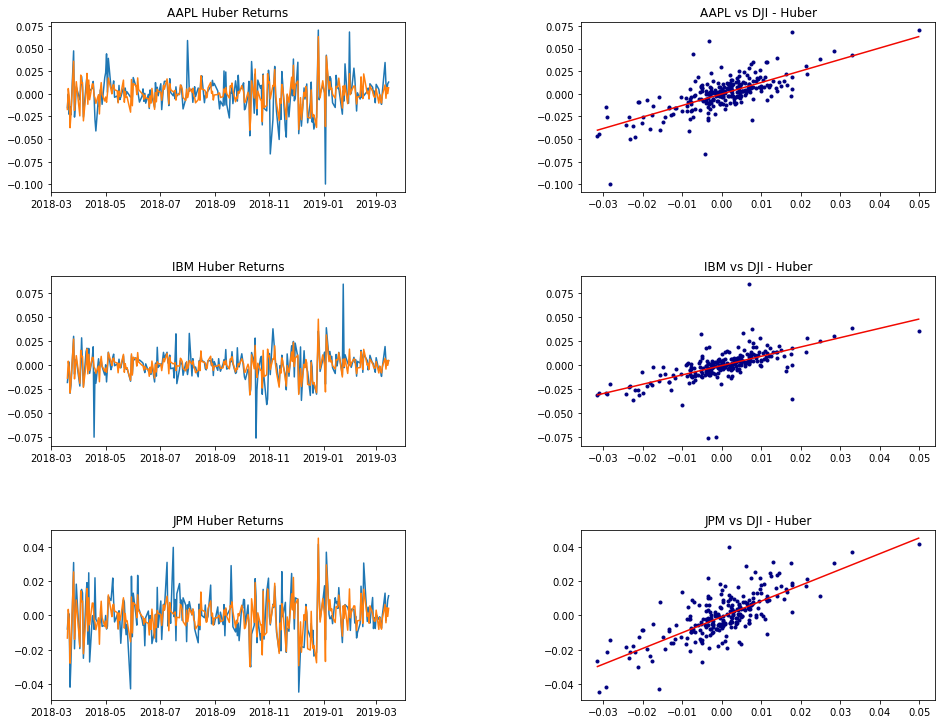

In [60]:
regression_model = linear_model.HuberRegressor()
r = returns['DJI'].copy().values.reshape(-1,1)
linspace = np.linspace(r.min(), r.max())

i = 0
fig, axes = subplot_init(3, 2, fig_size = (10, 13)) 
for ticker in tickers:
    y = returns[ticker].copy().values.reshape(-1 )
    regression_model.fit(r, y)
    if ticker != 'DJI':
        ax0 = axes[i][0]
        ax1 = axes[i][1]
        predictions = regression_model.predict(r)
        ax0.plot(returns[ticker].index, y)
        ax0.plot(returns[ticker].index, predictions)
        model = regression_model.fit(r, y.ravel())
        coefficients = model.coef_ * linspace + model.intercept_
        ax1.plot(r, y, '.', color = color1)
        ax1.plot(linspace, coefficients, color = color2)
        i += 1   
        
axes[0][0].title.set_text('AAPL Huber Returns')
axes[0][1].title.set_text('AAPL vs DJI - Huber')
axes[1][0].title.set_text('IBM Huber Returns')
axes[1][1].title.set_text('IBM vs DJI - Huber')
axes[2][0].title.set_text('JPM Huber Returns')
axes[2][1].title.set_text('JPM vs DJI - Huber')

## 4.4 Robust Trading Strategies

### 4.4.1 Moving average crossover

In [61]:
adj_close_data = pd.DataFrame(columns = tickers)
for ticker in tickers:
    adj_close_data[ticker] = all_stocks[ticker]['Adj Close'].copy()
adj_close_outliers = pd.DataFrame(columns = tickers)
for ticker in tickers:
    data = adj_close_data[ticker].copy()
    diff = data.max() - data.mean()
    for i in range(0, 250, 25):
        data[i] += float([-2,2][np.random.randint(0, 2)] * diff)
    adj_close_outliers[ticker] = data

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


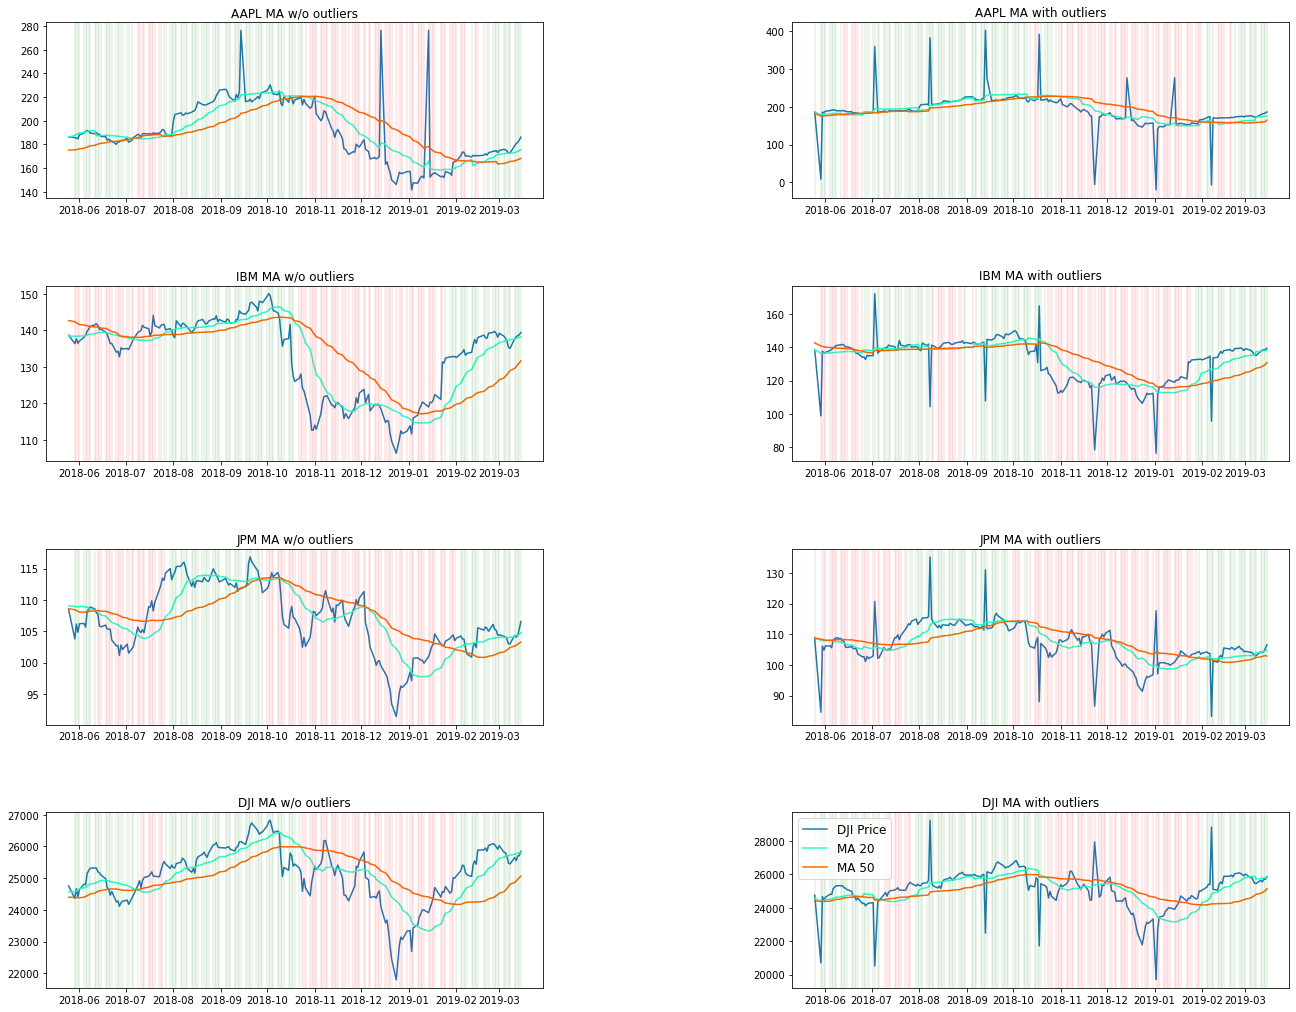

In [62]:
fig, axes = subplot_init(4, 2, fig_size = (14, 18))
row = 0
for ticker in tickers:
    ma_buy_decisions = []
    outliers_ma_buy_decisions = []
    col = 0
    previous_state = 0
    for adj_data in [adj_close_data, adj_close_outliers]:
        ax = axes[row][col]
        data = adj_data[ticker].dropna()
        ma_20 = data.rolling(20).mean()
        ma_50 = data.rolling(50).mean()
        ma_buy = np.sign((ma_20 - ma_50).dropna())        
        i = ma_buy.index[0] 
        ax.plot(data[i:], label = ticker + " Price")
        ax.plot(ma_20[i:], color = CMAP_OBJ(0.4), label = "MA 20")
        ax.plot(ma_50[i:], color = CMAP_OBJ(0.8), label = "MA 50")
        plt.legend(loc=2, prop={'size': 12})
        buy = 'Buy'
        sell = 'Sell'
        for buy_idx in ma_buy.index:
            current_state = ma_buy[buy_idx]
            if ma_buy[buy_idx] == -1:
                if previous_state != current_state:
                    sell = 'reset'
                else:
                    ax.axvline(x = buy_idx, alpha = 0.1, color = CMAP_OBJ(0.9)) 
            if  current_state == 1:
                if previous_state != current_state:
                    buy = 'reset'
                else :
                    ax.axvline(x = buy_idx, alpha = 0.1, color = 'g')
            previous_state = current_state
        col += 1
    row += 1     
axes[0][0].title.set_text('AAPL MA w/o outliers')
axes[0][1].title.set_text('AAPL MA with outliers')
axes[1][0].title.set_text('IBM MA w/o outliers')
axes[1][1].title.set_text('IBM MA with outliers')
axes[2][0].title.set_text('JPM MA w/o outliers')
axes[2][1].title.set_text('JPM MA with outliers')
axes[3][0].title.set_text('DJI MA w/o outliers')
axes[3][1].title.set_text('DJI MA with outliers')

### 4.4.2. Moving median crossover

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


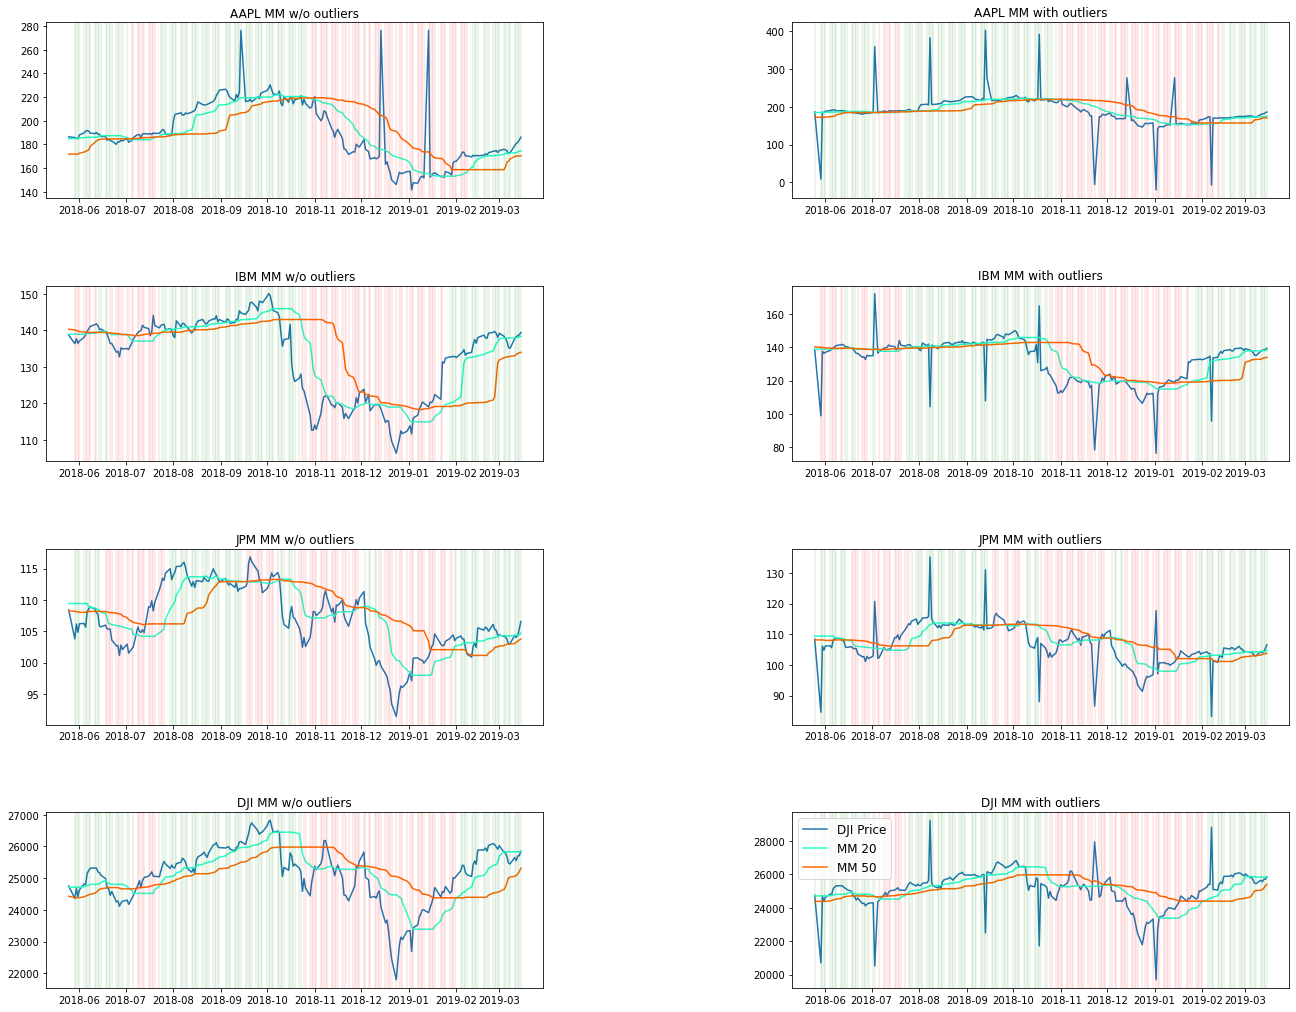

In [63]:
fig, axes = subplot_init(4, 2, fig_size = (14, 18))
row = 0
for ticker in tickers:
    mm_buy_decisions = []
    outliers_mm_buy_decisions = []
    col = 0
    previous_state = 0
    for adj_data in [adj_close_data, adj_close_outliers]:
        ax = axes[row][col]
        data = adj_data[ticker].dropna()
        mm_20 = data.rolling(20).median()
        mm_50 = data.rolling(50).median()
        mm_buy = np.sign((mm_20 - mm_50).dropna())
        i = mm_buy.index[0] 
        ax.plot(data[i:], label = ticker + " Price")
        ax.plot(mm_20[i:], color = CMAP_OBJ(0.4), label = "MM 20")
        ax.plot(mm_50[i:], color = CMAP_OBJ(0.8), label = "MM 50")
        plt.legend(loc=2, prop={'size': 12})
        buy = 'Buy'
        sell = 'Sell'
        for buy_idx in mm_buy.index:
            current_state = mm_buy[buy_idx]
            if mm_buy[buy_idx] == -1:
                if previous_state != current_state:
                    sell = 'reset'
                else:
                    ax.axvline(x = buy_idx, alpha = 0.1, color = CMAP_OBJ(0.9)) 
            if  current_state == 1:
                if previous_state != current_state: 
                    buy = 'reset'
                else :
                    ax.axvline(x = buy_idx, alpha = 0.1, color = 'g')
            previous_state = current_state
        col += 1
    row += 1 
axes[0][0].title.set_text('AAPL MM w/o outliers')
axes[0][1].title.set_text('AAPL MM with outliers')
axes[1][0].title.set_text('IBM MM w/o outliers')
axes[1][1].title.set_text('IBM MM with outliers')
axes[2][0].title.set_text('JPM MM w/o outliers')
axes[2][1].title.set_text('JPM MM with outliers')
axes[3][0].title.set_text('DJI MM w/o outliers')
axes[3][1].title.set_text('DJI MM with outliers')

# 5 Graph in Finance

In [64]:
import seaborn as sns
import networkx as nx
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

## 5.1 S&P stocks subset

In [65]:
all_stocks = pd.read_csv('snp_allstocks_2015_2019.csv', header = 0, index_col = 0)
snp_info = pd.read_csv('snp_info.csv', index_col = 0)
subset = snp_info.copy().set_index('Symbol')
subset = subset.loc[subset['GICS Sector'] == 'Information Technology']
subset = subset.sort_values('GICS Sub Industry')
subset.drop(subset.tail(58).index,inplace=True)
stocks = subset.index
returns = np.log(all_stocks[stocks]).diff(1).dropna() 
display(returns)

ADBE      SYMC      CDNS      ANSS      ORCL      ADSK  \
Date                                                                     
2015-01-05 -0.004989 -0.014168 -0.023101 -0.009600 -0.016834 -0.014722   
2015-01-06 -0.020350 -0.015578 -0.026991 -0.019986 -0.010377 -0.019973   
2015-01-07  0.008190  0.009217  0.028078  0.005661  0.000232 -0.002089   
2015-01-08  0.025135  0.018182  0.010262  0.024169  0.006007  0.024446   
2015-01-09 -0.014922 -0.006681 -0.003229 -0.011083 -0.000461 -0.009054   
...              ...       ...       ...       ...       ...       ...   
2018-12-24 -0.017587 -0.026375 -0.009383 -0.024406 -0.030225 -0.016596   
2018-12-26  0.083157  0.030164  0.055020  0.043202  0.043545  0.062333   
2018-12-27  0.009775  0.005388  0.019070  0.009129  0.008486  0.011684   
2018-12-28 -0.008968 -0.002690 -0.001614 -0.008149 -0.003341 -0.001414   
2018-12-31  0.013842  0.018153  0.003225 -0.000350  0.007336  0.010788   

                SNPS      ANET      JNPR      CSCO  
Date                                                
2015-01-05 -0.013078  0.017711 -0.011198 -0.020121  
2015-01-06 -0.008973  0.000157 -0.014062 -0.000370  
2015-01-07  0.001185  0.020629  0.022138  0.009200  
2015-01-08  0.015282  0.014933  0.028630  0.007663  
2015-01-09  0.001632  0.004527  0.000868  0.010127  
...              ...       ...       ...       ...  
2018-12-24 -0.019496 -0.022353 -0.025875 -0.038237  
2018-12-26  0.043826  0.059696  0.039883  0.052943  
2018-12-27  0.005421  0.021266  0.007491  0.010307  
2018-12-28  0.004794  0.004530 -0.001867 -0.003268  
2018-12-31  0.007148  0.023725  0.005963  0.013008  

[1005 rows x 10 columns]

## 5.2 Correlation matrix and network

In [66]:
import networkx as nx
corr = returns.corr()
means = pd.DataFrame(index = stocks)
means.loc[:, -1] = np.array(corr.mean())
means.index.name = ''
corr

ADBE      SYMC      CDNS      ANSS      ORCL      ADSK      SNPS  \
ADBE  1.000000  0.323111  0.520790  0.608936  0.469606  0.585507  0.639438   
SYMC  0.323111  1.000000  0.244177  0.266279  0.306489  0.262986  0.312253   
CDNS  0.520790  0.244177  1.000000  0.538397  0.455439  0.483961  0.738328   
ANSS  0.608936  0.266279  0.538397  1.000000  0.490934  0.565195  0.653681   
ORCL  0.469606  0.306489  0.455439  0.490934  1.000000  0.431472  0.509537   
ADSK  0.585507  0.262986  0.483961  0.565195  0.431472  1.000000  0.564625   
SNPS  0.639438  0.312253  0.738328  0.653681  0.509537  0.564625  1.000000   
ANET  0.418239  0.260253  0.364709  0.402653  0.299024  0.435934  0.430105   
JNPR  0.339378  0.213437  0.310065  0.372216  0.332971  0.329632  0.350982   
CSCO  0.520615  0.329291  0.440652  0.516908  0.512660  0.464823  0.561879   

          ANET      JNPR      CSCO  
ADBE  0.418239  0.339378  0.520615  
SYMC  0.260253  0.213437  0.329291  
CDNS  0.364709  0.310065  0.440652  
ANSS  0.402653  0.372216  0.516908  
ORCL  0.299024  0.332971  0.512660  
ADSK  0.435934  0.329632  0.464823  
SNPS  0.430105  0.350982  0.561879  
ANET  1.000000  0.354597  0.387159  
JNPR  0.354597  1.000000  0.493581  
CSCO  0.387159  0.493581  1.000000

In [67]:
def graph_func(links, mean_corrs = None, cmap = plt.cm.Reds, node_color = '#00b4d9', with_labels = True, font_size = 14, width = 3, ax = None, mean = 0.4, std = 0.2, fact = 3000):
    if ax is None:
        ax = plt.gca()
    G = nx.from_pandas_edgelist(links, 'x', 'y')
    edges = G.edges
    weights = []
    for var1, var2 in edges:
        indexes_var1 = links.index[links['x'] == var1].tolist()
        indexes_var2 = links.index[links['y'] == var2].tolist()
        row = list(set(indexes_var1).intersection(indexes_var2))
        if len(row) == 0:
            weights.append(0)
        else:
            weights.append(links.loc[row[0]].value)
    weights = tuple(weights)
    if mean_corrs is None:
        node_size = 1500
    else:
        nodes = nx.nodes(G)
        node_size = np.array([])
        for n in nodes:
            node_size = np.append(node_size, mean_corrs.loc[n].values[0])
        node_size = ((node_size - mean)/ std) * fact
    nx.draw(G, with_labels = with_labels, edge_cmap = cmap, 
            node_color = node_color, node_size = node_size, edge_list = G.edges,
            edge_color = weights, width = width, font_size = font_size, ax = ax)
    

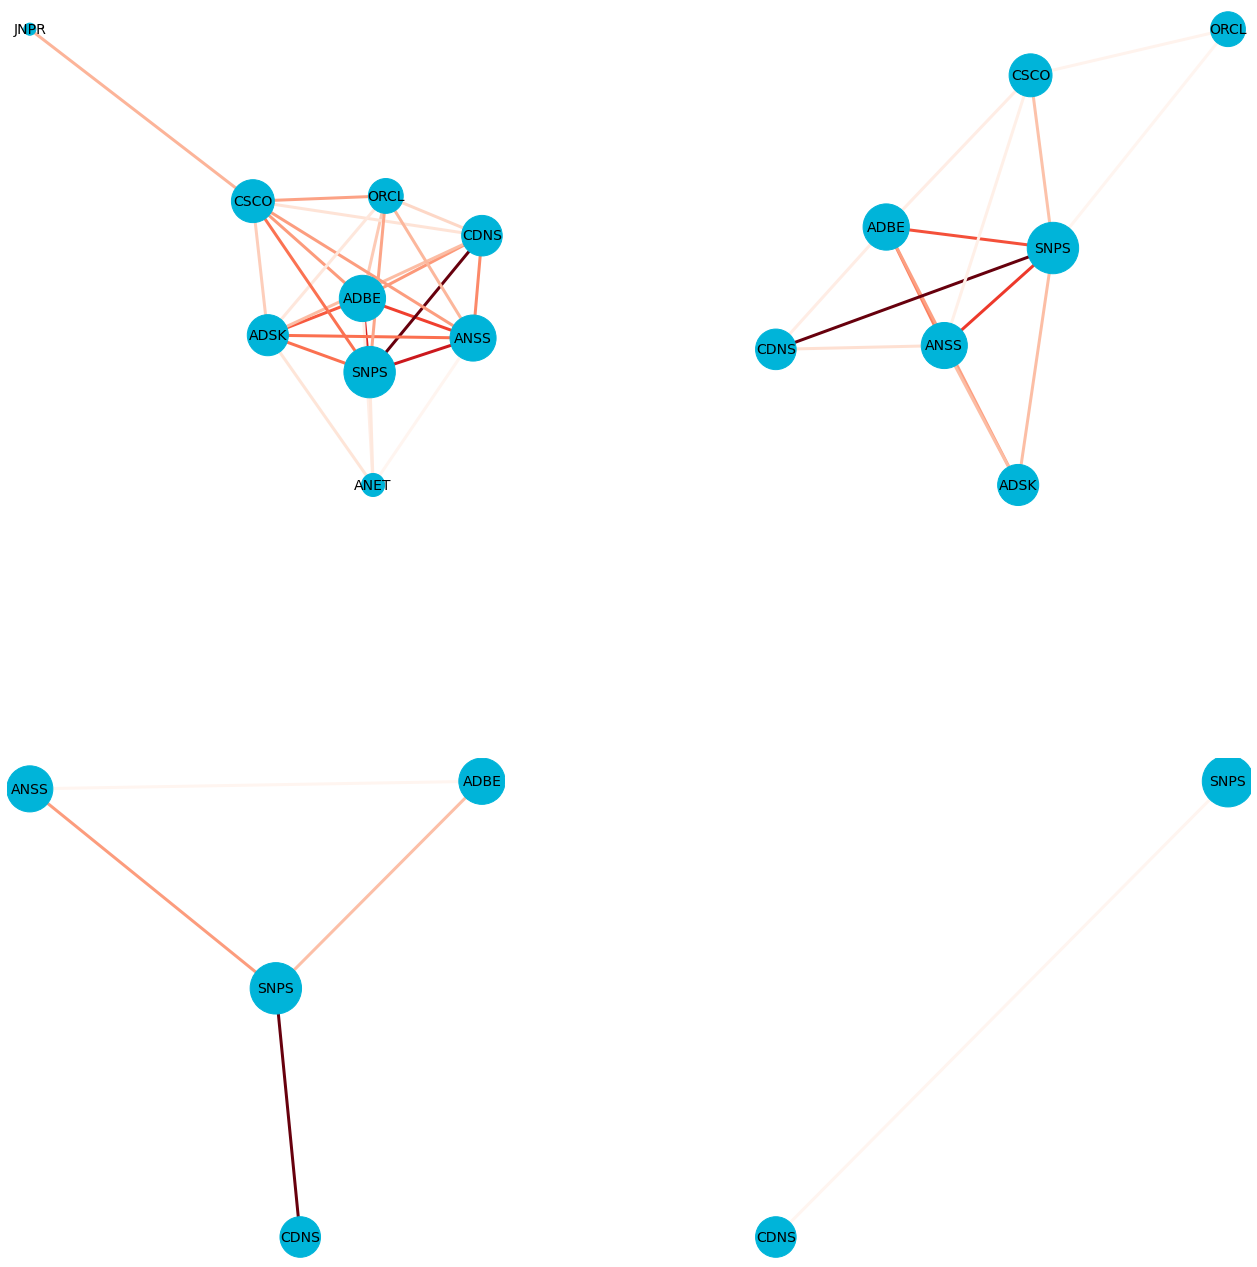

In [68]:
links = corr.stack().reset_index()
links.columns = ['x', 'y','value']
corrs = [0.4, 0.5, 0.6, 0.7]
fig, axes = subplot_init(2, 2, fig_size = (18, 18))
i = 0
for c in corrs:
    ax = axes[int(i > 1)][int(i % 2)]
    links_ = links.loc[ abs(links['value'] > c) & (links['x'] != links['y']) ]
    graph_func(links_, ax = ax, mean_corrs = means)
    i += 1   

## 5.3 Correlation network analysis

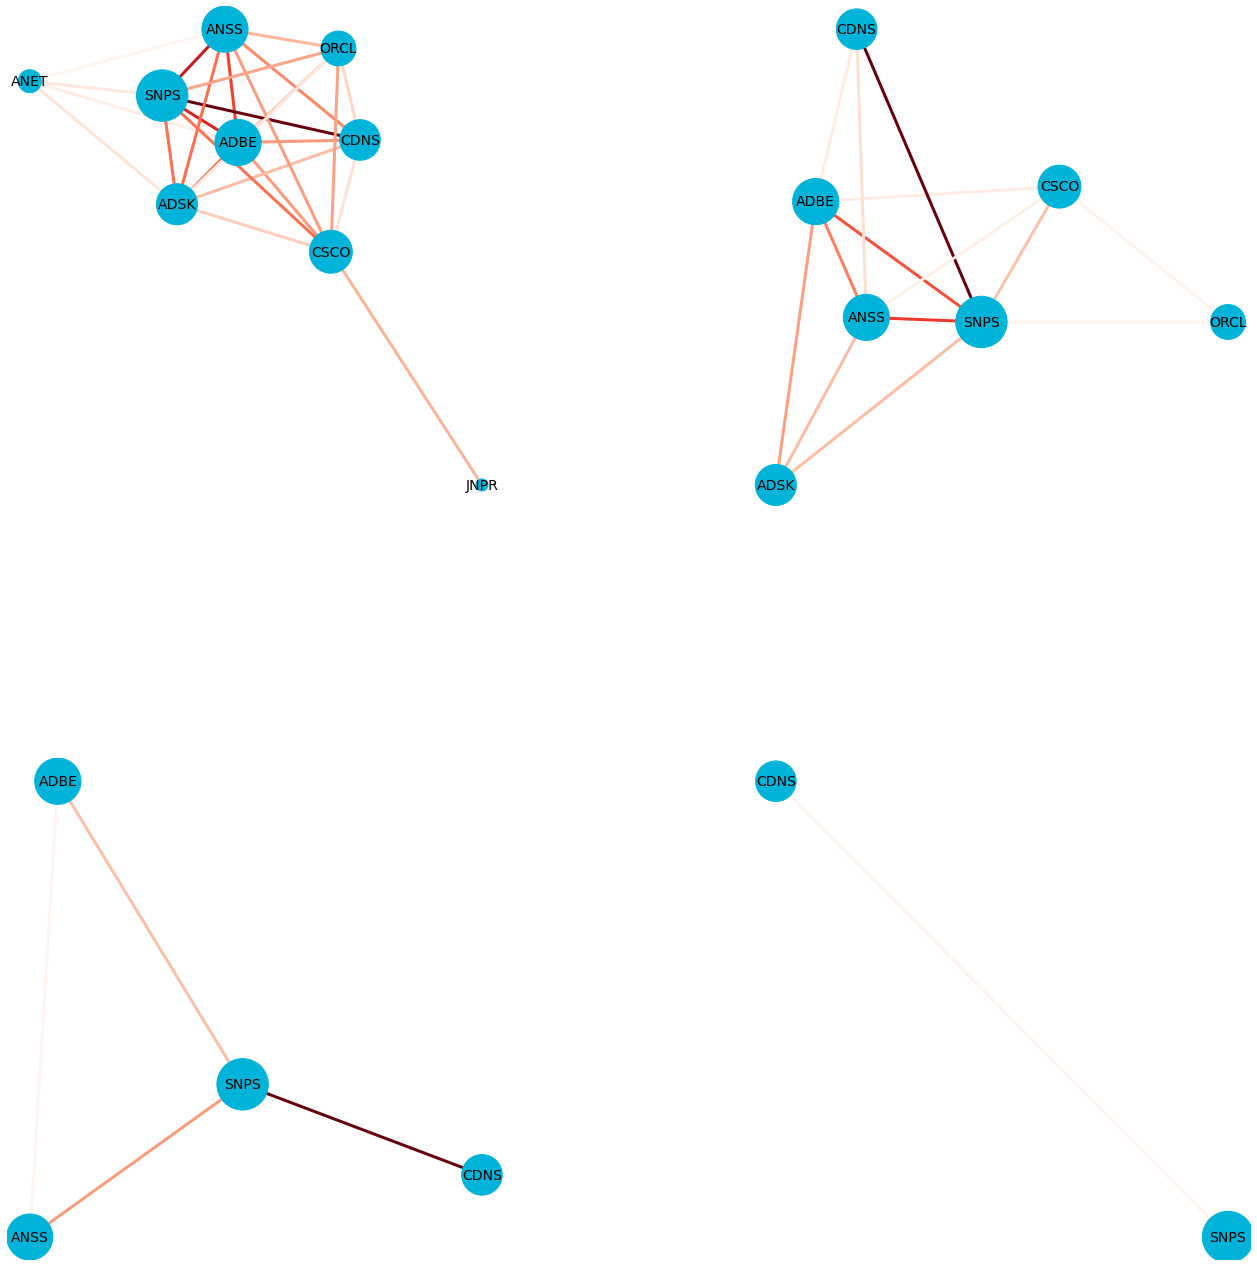

In [69]:
corr = returns.sample(frac=1, axis=0).corr()
links = corr.stack().reset_index()
links.columns = ['x', 'y','value']
fig, axes = subplot_init(2, 2, fig_size = (18, 18))
i = 0
for c in corrs:
    ax = axes[int(i > 1)][int(i % 2)]
    links_ = links.loc[ abs(links['value'] > c) & (links['x'] != links['y'])]
    graph_func(links_, ax = ax, mean_corrs = means)
    i += 1    

## 5.4 Dynamic time warping distance matrix and network

In [70]:
dtw = corr
for i in returns.columns:
    for j in returns.columns:
        distance, path = fastdtw(returns[i], returns[j], dist=euclidean)
        dtw[i][j] = distance      

In [71]:
dtw

ADBE       SYMC       CDNS       ANSS       ORCL       ADSK  \
ADBE   0.000000  12.162418   9.897292   8.317122   9.763907  13.037738   
SYMC  12.365702   0.000000  11.823130  11.312223  10.435950  13.877393   
CDNS  11.188856  11.518767   0.000000   8.916750   8.807967  12.206735   
ANSS   8.447351  11.236521   8.119588   0.000000   9.256041  11.946410   
ORCL   9.990182  10.561081   9.148041  10.138356   0.000000  11.619378   
ADSK  13.077168  13.848894  12.305807  12.692828  11.374146   0.000000   
SNPS  10.784721  10.876139   6.229760   7.464425   7.303032  11.049765   
ANET  15.672227  16.115587  15.265238  15.534910  15.829363  16.859246   
JNPR  11.763939  12.695395  10.365608  10.190047  10.331194  12.672589   
CSCO   9.729094  12.291025   8.958596   8.786090   7.892582  11.707725   

           SNPS       ANET       JNPR       CSCO  
ADBE   9.533603  15.863066  12.163915   8.853051  
SYMC  11.161722  15.892998  12.957623  12.279661  
CDNS   6.461427  15.148051  10.332253   9.554798  
ANSS   6.787663  15.072475  10.303676   8.807738  
ORCL   9.293458  15.632015  11.162792   9.320196  
ADSK  10.602321  15.572194  13.230747  12.099449  
SNPS   0.000000  14.030707   9.474402   8.669945  
ANET  13.838141   0.000000  16.106844  15.703949  
JNPR  10.014214  17.051936   0.000000  10.008548  
CSCO   8.527948  16.069243  10.123861   0.000000

## 5.5 Disadvantages of considering raw prices

*See report.*